# Bert - Roberta

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/GCP 2')

In [ ]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [ ]:
!pip install transformers

     |████████████████████████████████| 778kB 8.0MB/s 
     |████████████████████████████████| 1.1MB 23.2MB/s 
     |████████████████████████████████| 890kB 28.5MB/s 
     |████████████████████████████████| 3.0MB 49.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=47db65e0242d23f68a186a4feda8d732c3cc26895a338974532202038b0a3fbd
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 8, 8
plt.rcParams['figure.dpi'] = 300

import pandas as pd


import numpy as np

import json

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# BERT - RoBERTa - Defining Functions

In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [ ]:
from transformers import  RobertaTokenizer
from transformers import BertTokenizer


### CALCULATE MAX LENGTH
def get_max_length(df):

    tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=True, add_special_tokens=True, pad_to_max_length=True)

    sentences = df.sentences.values
    max_len = 0

    # For every sentence...
    for sent in sentences:

        # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
        input_ids = tokenizer.encode(sent, add_special_tokens=True)

        # Update the maximum sentence length.
        max_len_bert = max(max_len, len(input_ids))


    #ROBERTA
    tokenizer = RobertaTokenizer.from_pretrained('roberta-base', do_lower_case=True, add_special_tokens=True,  pad_to_max_length=True)

    sentences = df.sentences.values
    max_len = 0
    
    # For every sentence...
    for sent in sentences:

        # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
        input_ids = tokenizer.encode(sent, add_special_tokens=True)

        # Update the maximum sentence length.
        max_len_roberta = max(max_len, len(input_ids))
        
    
    print('BERT Max sentence length: ', max_len_bert)
    print('RoBERTa Max sentence length: ', max_len_roberta)

In [ ]:
### CALCULATE MAX LENGTH

from transformers import BertTokenizer
from transformers import  RobertaTokenizer



def get_max_length(df):
    
    tokenizer_bert = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=True, add_special_tokens=True, pad_to_max_length=True)

    sentences = df.sentences.values
    max_len_bert = 0

    # For every sentence...
    for sent in sentences:

        # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
        input_ids = tokenizer_bert.encode(sent, add_special_tokens=True)

        # Update the maximum sentence length.
        max_len_bert = max(max_len_bert, len(input_ids))

    tokenizer_roberta = RobertaTokenizer.from_pretrained('roberta-base', do_lower_case=True, add_special_tokens=True,  pad_to_max_length=True)

    sentences = df.sentences.values
    max_len_roberta = 0

    # For every sentence...
    for sent in sentences:

        # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
        input_ids = tokenizer_roberta.encode(sent, add_special_tokens=True)

        # Update the maximum sentence length.
        max_len_roberta = max(max_len_roberta, len(input_ids))
        
    print('Max sentence length BERT: ', max_len_bert)

    print('Max sentence length roBERTa: ', max_len_roberta)


    

In [ ]:
from torch.utils.data import TensorDataset
from transformers import BertTokenizer
from transformers import  RobertaTokenizer




In [ ]:
#HELPER FUNCTIONS
import numpy as np
import time
import datetime
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from torch.utils.data import TensorDataset
from transformers import AutoTokenizer

    
# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)


def to_tokenised_Tensor(df, model, m_len):
    
    split = df.SPLIT.iloc[0]
    sentences = df.sentences.values
    labels = df.label.values
    
    if model=='bert-base-cased':
        tokenizer = AutoTokenizer.from_pretrained('bert-base-cased', add_special_tokens=True,  pad_to_max_length=True)
    elif model=='bert-large-cased':
        tokenizer= AutoTokenizer.from_pretrained('bert-large-cased', add_special_tokens=True,  pad_to_max_length=True)
    elif model=='roberta-base':
        tokenizer = AutoTokenizer.from_pretrained('roberta-base',  add_special_tokens=True,  pad_to_max_length=True)
    elif model=='roberta-large':
        tokenizer = AutoTokenizer.from_pretrained('roberta-large',  add_special_tokens=True,  pad_to_max_length=True)    
    else:
        raise Exception("Model not defined")
        
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in sentences:
        encoded_dict = tokenizer.encode_plus(
                            sent,                      # Sentence to encode.
                            add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                            max_length = m_len,           # Pad & truncate all sentences.
                            pad_to_max_length = True,
                            return_attention_mask = True,   # Construct attn. masks.
                            #do_lower_case=True
                            return_tensors = 'pt',
                            truncation=True # Return pytorch tensors.
                       )
        
        # Add the encoded sentence to the list.    
        input_ids.append(encoded_dict['input_ids'])

        # And its attention mask (simply differentiates padding from non-padding).
        attention_masks.append(encoded_dict['attention_mask'])

    # Convert the lists into tensors.
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    labels = torch.tensor(labels)

    print("Tensor's length:", len(input_ids), "of", split)
    dataset = TensorDataset(input_ids, attention_masks, labels)
    return dataset


# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def print_epochs(df_stats): 
    # Plot the learning curve.
    plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
    plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

    # Label the plot.
    plt.title("Training & Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.xticks([1, 2, 3, 4])

    plt.show()
    
    
def full_results (train_stats, probs, predicted_labels, true_labels):
    print(train_stats)
    print_epochs(train_stats)
    print(classification_report( predicted_labels, true_labels))
    evaluate_roc(probs, true_labels)    

In [ ]:
from torch.utils.data import random_split
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
import gc
from transformers import get_linear_schedule_with_warmup
import random
import numpy as np
import torch.nn.functional as F
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers import AutoModelWithLMHead



# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.

# args.learning_rate - default is 5e-5, our notebook had 2e-5
# args.adam_epsilon  - default is 1e-8.
# Number of training epochs. The BERT authors recommend between 2 and 4. 


def bert_trainer_validator(bert_train, bert_test, train_model='bert-base-cased', m_len=50, batch_size=32 , lr_par=5e-5, eps_par=1e-8, epochs=4, seed_val=42, proce='gpu'):

    bert_dataset = to_tokenised_Tensor(bert_train, model=train_model, m_len=m_len)
    predict = to_tokenised_Tensor(bert_test, model=train_model, m_len=m_len)
    
     # Divide the dataset by randomly selecting samples.
    train_size = int(0.9 * len(bert_dataset))
    val_size = len(bert_dataset) - train_size
    train_dataset, val_dataset = random_split(bert_dataset, [train_size, val_size] )
    

    # Create the DataLoaders for our training and validation sets.
    # We'll take training samples in random order. 
    train_dataloader = DataLoader(
                train_dataset,  # The training samples.
                sampler = RandomSampler(train_dataset), # Select batches randomly
                batch_size = batch_size # Trains with this batch size.
            )

    # For validation the order doesn't matter, so we'll just read them sequentially.
    validation_dataloader = DataLoader(
                val_dataset, # The validation samples.
                sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
                batch_size = batch_size # Evaluate with this batch size.
            )
    

    torch.cuda.empty_cache()
    gc.collect()

    if train_model== "bert-base-cased" :                         
        model = BertForSequenceClassification.from_pretrained(
            "bert-base-cased", # Use the 12-layer BERT model, with an uncased vocab.
            num_labels = 2, # The number of output labels--2 for binary classification.
                            # You can increase this for multi-class tasks.   
            output_attentions = False, # Whether the model returns attentions weights.
            output_hidden_states = False, # Whether the model returns all hidden-states.
        )
    if train_model== "bert-large-cased":
        model = BertForSequenceClassification.from_pretrained(
            "bert-large-cased", # Use the 12-layer BERT model, with an uncased vocab.
            num_labels = 2, # The number of output labels--2 for binary classification.
                            # You can increase this for multi-class tasks.   
            output_attentions = False, # Whether the model returns attentions weights.
            output_hidden_states = False, # Whether the model returns all hidden-states.
        )
        
    if train_model=="roberta-base":
        model = RobertaForSequenceClassification.from_pretrained(
            'roberta-base', # Use the 12-layer BERT model, with an uncased vocab.
            num_labels = 2, # The number of output labels--2 for binary classification.
                            # You can increase this for multi-class tasks.   
            output_attentions = False, # Whether the model returns attentions weights.
            output_hidden_states = False, # Whether the model returns all hidden-states.
        )
        
    if train_model== "roberta-large":
        model = RobertaForSequenceClassification.from_pretrained(
            'roberta-large', # Use the 12-layer BERT model, with an uncased vocab.
            num_labels = 2, # The number of output labels--2 for binary classification.
                            # You can increase this for multi-class tasks.   
            output_attentions = False, # Whether the model returns attentions weights.
            output_hidden_states = False, # Whether the model returns all hidden-states.
        )
        

    # Tell pytorch to run this model on the GPU.
    if proce == 'gpu':
      model.cuda()

    # Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
    # I believe the 'W' stands for 'Weight Decay fix"
    optimizer = AdamW(model.parameters(),
                      lr = lr_par, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                      eps = eps_par # args.adam_epsilon  - default is 1e-8.
                    )

    # Total number of training steps is [number of batches] x [number of epochs]. 
    # (Note that this is not the same as the number of training samples).
    total_steps = len(train_dataloader) * epochs

    # Create the learning rate scheduler.
    scheduler = get_linear_schedule_with_warmup(optimizer, 
                                                num_warmup_steps = 0, # Default value in run_glue.py
                                                num_training_steps = total_steps)


    # This training code is based on the `run_glue.py` script here:
    # https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

    # Set the seed value all over the place to make this reproducible.
    random.seed(seed_val)
    np.random.seed(seed_val)
    torch.manual_seed(seed_val)
    torch.cuda.manual_seed_all(seed_val)

    # We'll store a number of quantities such as training and validation loss, 
    # validation accuracy, and timings.
    training_stats = []

    # Measure the total training time for the whole run.
    total_t0 = time.time()

    # For each epoch...
    for epoch_i in range(0, epochs):

        # ========================================
        #               Training
        # ========================================

        # Perform one full pass over the training set.

        print("")
        print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
        print('Training...')

        # Measure how long the training epoch takes.
        t0 = time.time()

        # Reset the total loss for this epoch.
        total_train_loss = 0

        # Put the model into training mode. Don't be mislead--the call to 
        # `train` just changes the *mode*, it doesn't *perform* the training.
        # `dropout` and `batchnorm` layers behave differently during training
        # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):

            # Progress update every 40 batches.
            if step % 40 == 0 and not step == 0:
                # Calculate elapsed time in minutes.
                elapsed = format_time(time.time() - t0)

                # Report progress.
                print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

            # Unpack this training batch from our dataloader. 
            #
            # As we unpack the batch, we'll also copy each tensor to the GPU using the 
            # `to` method.
            #
            # `batch` contains three pytorch tensors:
            #   [0]: input ids 
            #   [1]: attention masks
            #   [2]: labels 
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)

            # Always clear any previously calculated gradients before performing a
            # backward pass. PyTorch doesn't do this automatically because 
            # accumulating the gradients is "convenient while training RNNs". 
            # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
            model.zero_grad()        

            # Perform a forward pass (evaluate the model on this training batch).
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # It returns different numbers of parameters depending on what arguments
            # arge given and what flags are set. For our useage here, it returns
            # the loss (because we provided labels) and the "logits"--the model
            # outputs prior to activation.
            loss, logits = model(b_input_ids, 
                                 token_type_ids=None, 
                                 attention_mask=b_input_mask, 
                                 labels=b_labels)

            # Accumulate the training loss over all of the batches so that we can
            # calculate the average loss at the end. `loss` is a Tensor containing a
            # single value; the `.item()` function just returns the Python value 
            # from the tensor.
            total_train_loss += loss.item()

            # Perform a backward pass to calculate the gradients.
            loss.backward()

            # Clip the norm of the gradients to 1.0.
            # This is to help prevent the "exploding gradients" problem.
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and take a step using the computed gradient.
            # The optimizer dictates the "update rule"--how the parameters are
            # modified based on their gradients, the learning rate, etc.
            optimizer.step()

            # Update the learning rate.
            scheduler.step()

        # Calculate the average loss over all of the batches.
        avg_train_loss = total_train_loss / len(train_dataloader)            

        # Measure how long this epoch took.
        training_time = format_time(time.time() - t0)

        print("")
        print("  Average training loss: {0:.2f}".format(avg_train_loss))
        print("  Training epcoh took: {:}".format(training_time))

        # ========================================
        #               Validation
        # ========================================
        # After the completion of each training epoch, measure our performance on
        # our validation set.

        print("")
        print("Running Validation...")

        t0 = time.time()

        # Put the model in evaluation mode--the dropout layers behave differently
        # during evaluation.
        model.eval()

        # Tracking variables 
        total_eval_accuracy = 0
        total_eval_loss = 0
        nb_eval_steps = 0

        # Evaluate data for one epoch
        for batch in validation_dataloader:

            # Unpack this training batch from our dataloader. 
            #
            # As we unpack the batch, we'll also copy each tensor to the GPU using 
            # the `to` method.
            #
            # `batch` contains three pytorch tensors:
            #   [0]: input ids 
            #   [1]: attention masks
            #   [2]: labels 
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)

            # Tell pytorch not to bother with constructing the compute graph during
            # the forward pass, since this is only needed for backprop (training).
            with torch.no_grad():        

                # Forward pass, calculate logit predictions.
                # token_type_ids is the same as the "segment ids", which 
                # differentiates sentence 1 and 2 in 2-sentence tasks.
                # The documentation for this `model` function is here: 
                # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
                # Get the "logits" output by the model. The "logits" are the output
                # values prior to applying an activation function like the softmax.
                (loss, logits) = model(b_input_ids, 
                                       token_type_ids=None, 
                                       attention_mask=b_input_mask,
                                       labels=b_labels)

            # Accumulate the validation loss.
            total_eval_loss += loss.item()

            # Move logits and labels to CPU
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            # Calculate the accuracy for this batch of test sentences, and
            # accumulate it over all batches.
            total_eval_accuracy += flat_accuracy(logits, label_ids)


        # Report the final accuracy for this validation run.
        avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
        print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

        # Calculate the average loss over all of the batches.
        avg_val_loss = total_eval_loss / len(validation_dataloader)

        # Measure how long the validation run took.
        validation_time = format_time(time.time() - t0)

        print("  Validation Loss: {0:.2f}".format(avg_val_loss))
        print("  Validation took: {:}".format(validation_time))

        # Record all statistics from this epoch.
        training_stats.append(
            {
                'epoch': epoch_i + 1,
                'Training Loss': avg_train_loss,
                'Valid. Loss': avg_val_loss,
                'Valid. Accur.': avg_val_accuracy,
                'Training Time': training_time,
                'Validation Time': validation_time
            }
        )

    print("")
    print("Training complete!")
    print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))
    
    ##################
    ## CALCULATE TRAINING METRICS
    ##################

    # Create a DataFrame from our training statistics.
    df_stats = pd.DataFrame(data=training_stats)

    # Use the 'epoch' as the row index.
    df_stats = df_stats.set_index('epoch')


    ######################
    #PREDICT
    ##########
    
    prediction_sampler = SequentialSampler(predict)
    prediction_dataloader = DataLoader(predict, sampler=prediction_sampler, batch_size=batch_size)
    
    # Prediction on test set
    #print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

    # Put model in evaluation mode
    model.eval()

    # Tracking variables 
    predictions , true_labels = [], []

    all_logits = []

    # Predict 
    for batch in prediction_dataloader:
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
      # Telling the model not to compute or store gradients, saving memory and 
      # speeding up prediction
        with torch.no_grad():
            # Forward pass, calculate logit predictions
            outputs = model(b_input_ids, b_input_mask, token_type_ids=None)

            all_logits.append(outputs)

        logits_pred = outputs[0]

        # Move logits and labels to CPU
        logits_pred = logits_pred.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Store predictions and true labels
        predictions.append(np.argmax(logits_pred, axis=1).flatten())
        predicted_labels = predictions
        true_labels.append(label_ids)


    print(' PREDICTION DONE.')
    
    
    #final declarations
    train_stats = df_stats
    
    all_logits = [item for sublist in all_logits for item in sublist]

    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()
    
    predicted_labels = np.concatenate(predicted_labels).ravel()
    predicted_labels = list(predicted_labels)
    
    true_labels = np.concatenate(true_labels).ravel()
    true_labels = list(true_labels )


    return  train_stats, probs, predicted_labels, true_labels
#     #probabilities
#     probs
    
#     # Display the table.
#     df_stats


# Train - Evaluation
## Targeted - Short Descriptions

In [ ]:
bert_train = pd.read_csv('./data_files/bert_train.csv')
bert_test = pd.read_csv('./data_files/bert_test.csv')

In [ ]:
bert_train = bert_train.loc[:,['ID', 'SPLIT', 'description', 'tar_train_label']]
bert_train.columns = ['ID', 'SPLIT', 'sentences', 'label']
bert_train['label'] = bert_train['label'].astype(int)
bert_train.shape

(1569, 4)

In [ ]:
bert_train.SPLIT.value_counts()

Train    1569
Name: SPLIT, dtype: int64

In [ ]:
bert_train.label.value_counts()

0    849
1    720
Name: label, dtype: int64

In [ ]:
bert_test = bert_test.loc[:,['ID', 'SPLIT', 'description', 'golden_tar']]
bert_test.columns = ['ID', 'SPLIT', 'sentences', 'label']
bert_test['label'] = bert_test['label'].astype(int)
bert_test.shape

(237, 4)

In [ ]:
bert_test.SPLIT.value_counts()

TEST_short    237
Name: SPLIT, dtype: int64

In [ ]:
bert_test.label.value_counts()

1    124
0    113
Name: label, dtype: int64

In [ ]:
get_max_length(bert_train)
get_max_length(bert_test)


Max sentence length BERT:  263
Max sentence length roBERTa:  251
Max sentence length BERT:  257
Max sentence length roBERTa:  233


In [ ]:
# # args.learning_rate - default is 5e-5, our notebook had 2e-5
# # args.adam_epsilon  - default is 1e-8.
# # Number of training epochs. The BERT authors recommend between 2 and 4. 

# #bert-base-cased, bert-large-cased, roberta-base, roberta-large, 

# train_stats, probs, predicted_labels, true_labels = bert_trainer_validator(bert_train, bert_test,
#                                                                            train_model='bert-base-case',
#                                                                            m_len=200, batch_size=32, 
#                                                                            lr_par=5e-5, eps_par=1e-8, 
#                                                                            epochs=2, seed_val=42)


Tensor's length: 1569 of Train
Tensor's length: 237 of TEST_short


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b


======== Epoch 1 / 4 ========
Training...
  Batch    40  of     45.    Elapsed: 0:00:33.

  Average training loss: 0.45
  Training epcoh took: 0:00:37

Running Validation...
  Accuracy: 0.95
  Validation Loss: 0.16
  Validation took: 0:00:01

======== Epoch 2 / 4 ========
Training...
  Batch    40  of     45.    Elapsed: 0:00:33.

  Average training loss: 0.12
  Training epcoh took: 0:00:36

Running Validation...
  Accuracy: 0.98
  Validation Loss: 0.07
  Validation took: 0:00:01

======== Epoch 3 / 4 ========
Training...
  Batch    40  of     45.    Elapsed: 0:00:33.

  Average training loss: 0.04
  Training epcoh took: 0:00:36

Running Validation...
  Accuracy: 0.97
  Validation Loss: 0.11
  Validation took: 0:00:01

======== Epoch 4 / 4 ========
Training...
  Batch    40  of     45.    Elapsed: 0:00:33.

  Average training loss: 0.01
  Training epcoh took: 0:00:36

Running Validation...
  Accuracy: 0.96
  Validation Loss: 0.14
  Validation took: 0:00:01

Training complete!
Total tr

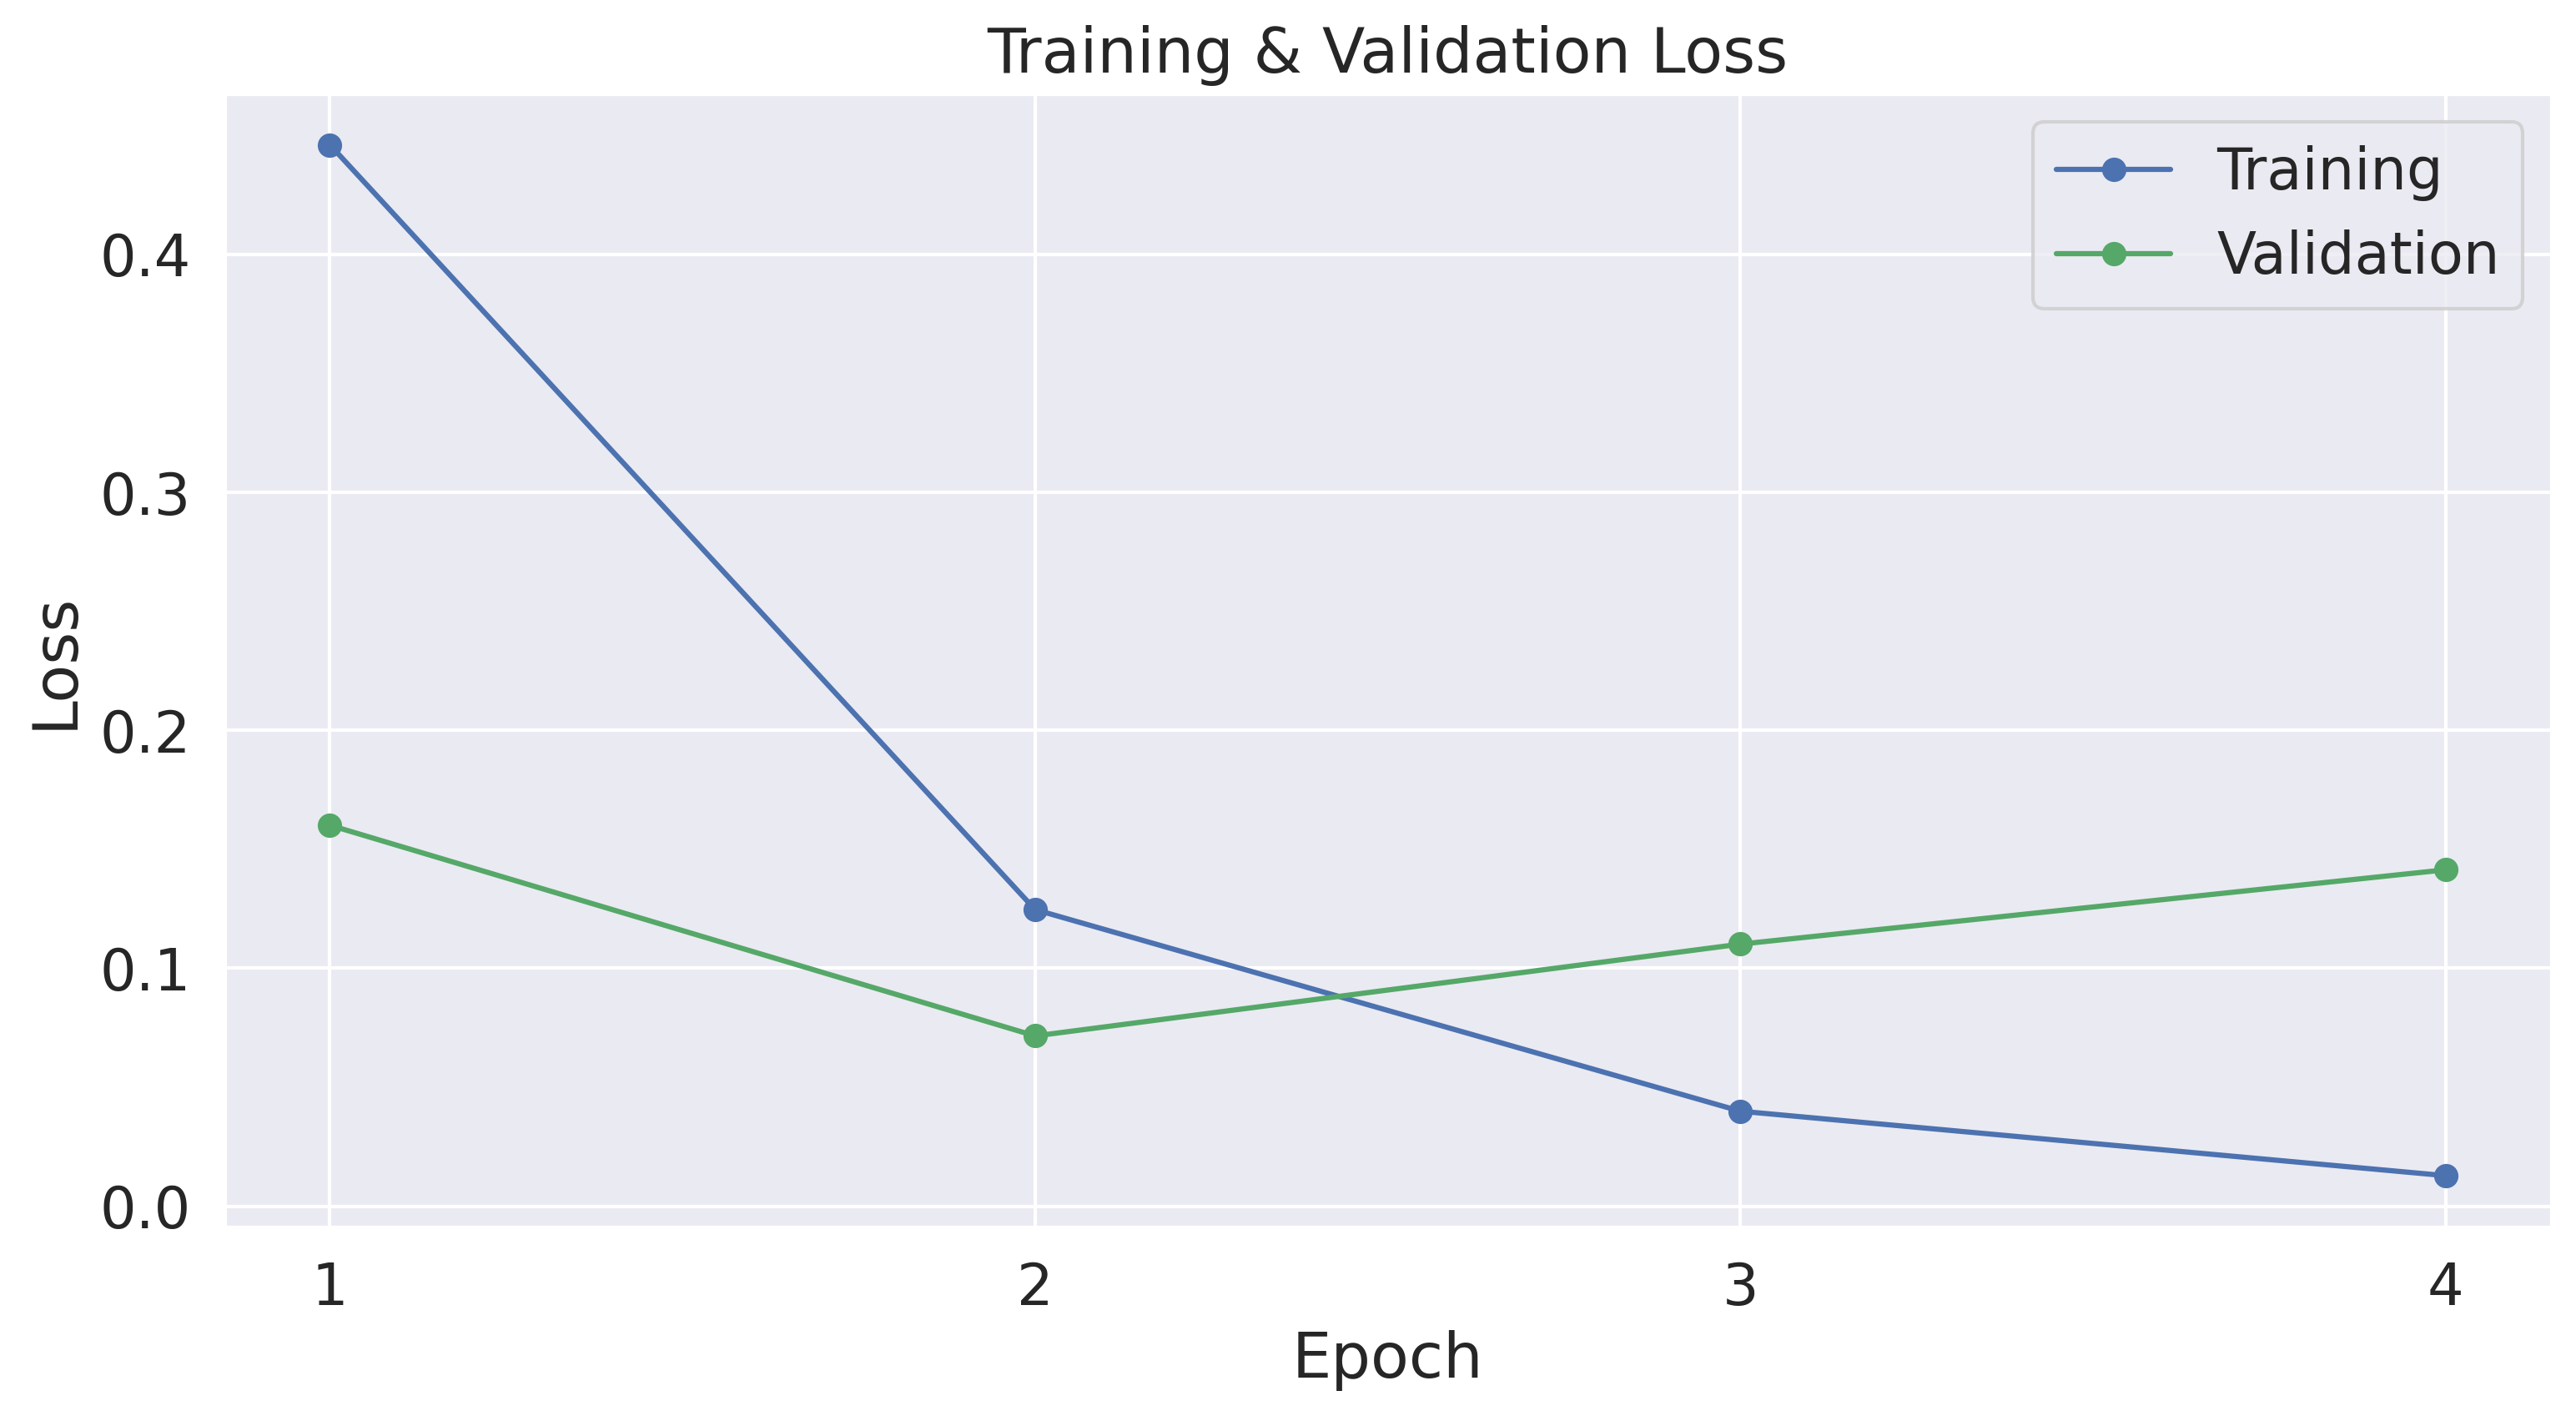

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       126
           1       0.75      0.84      0.79       111

    accuracy                           0.79       237
   macro avg       0.80      0.80      0.79       237
weighted avg       0.80      0.79      0.79       237

AUC: 0.8504
Accuracy: 79.32%


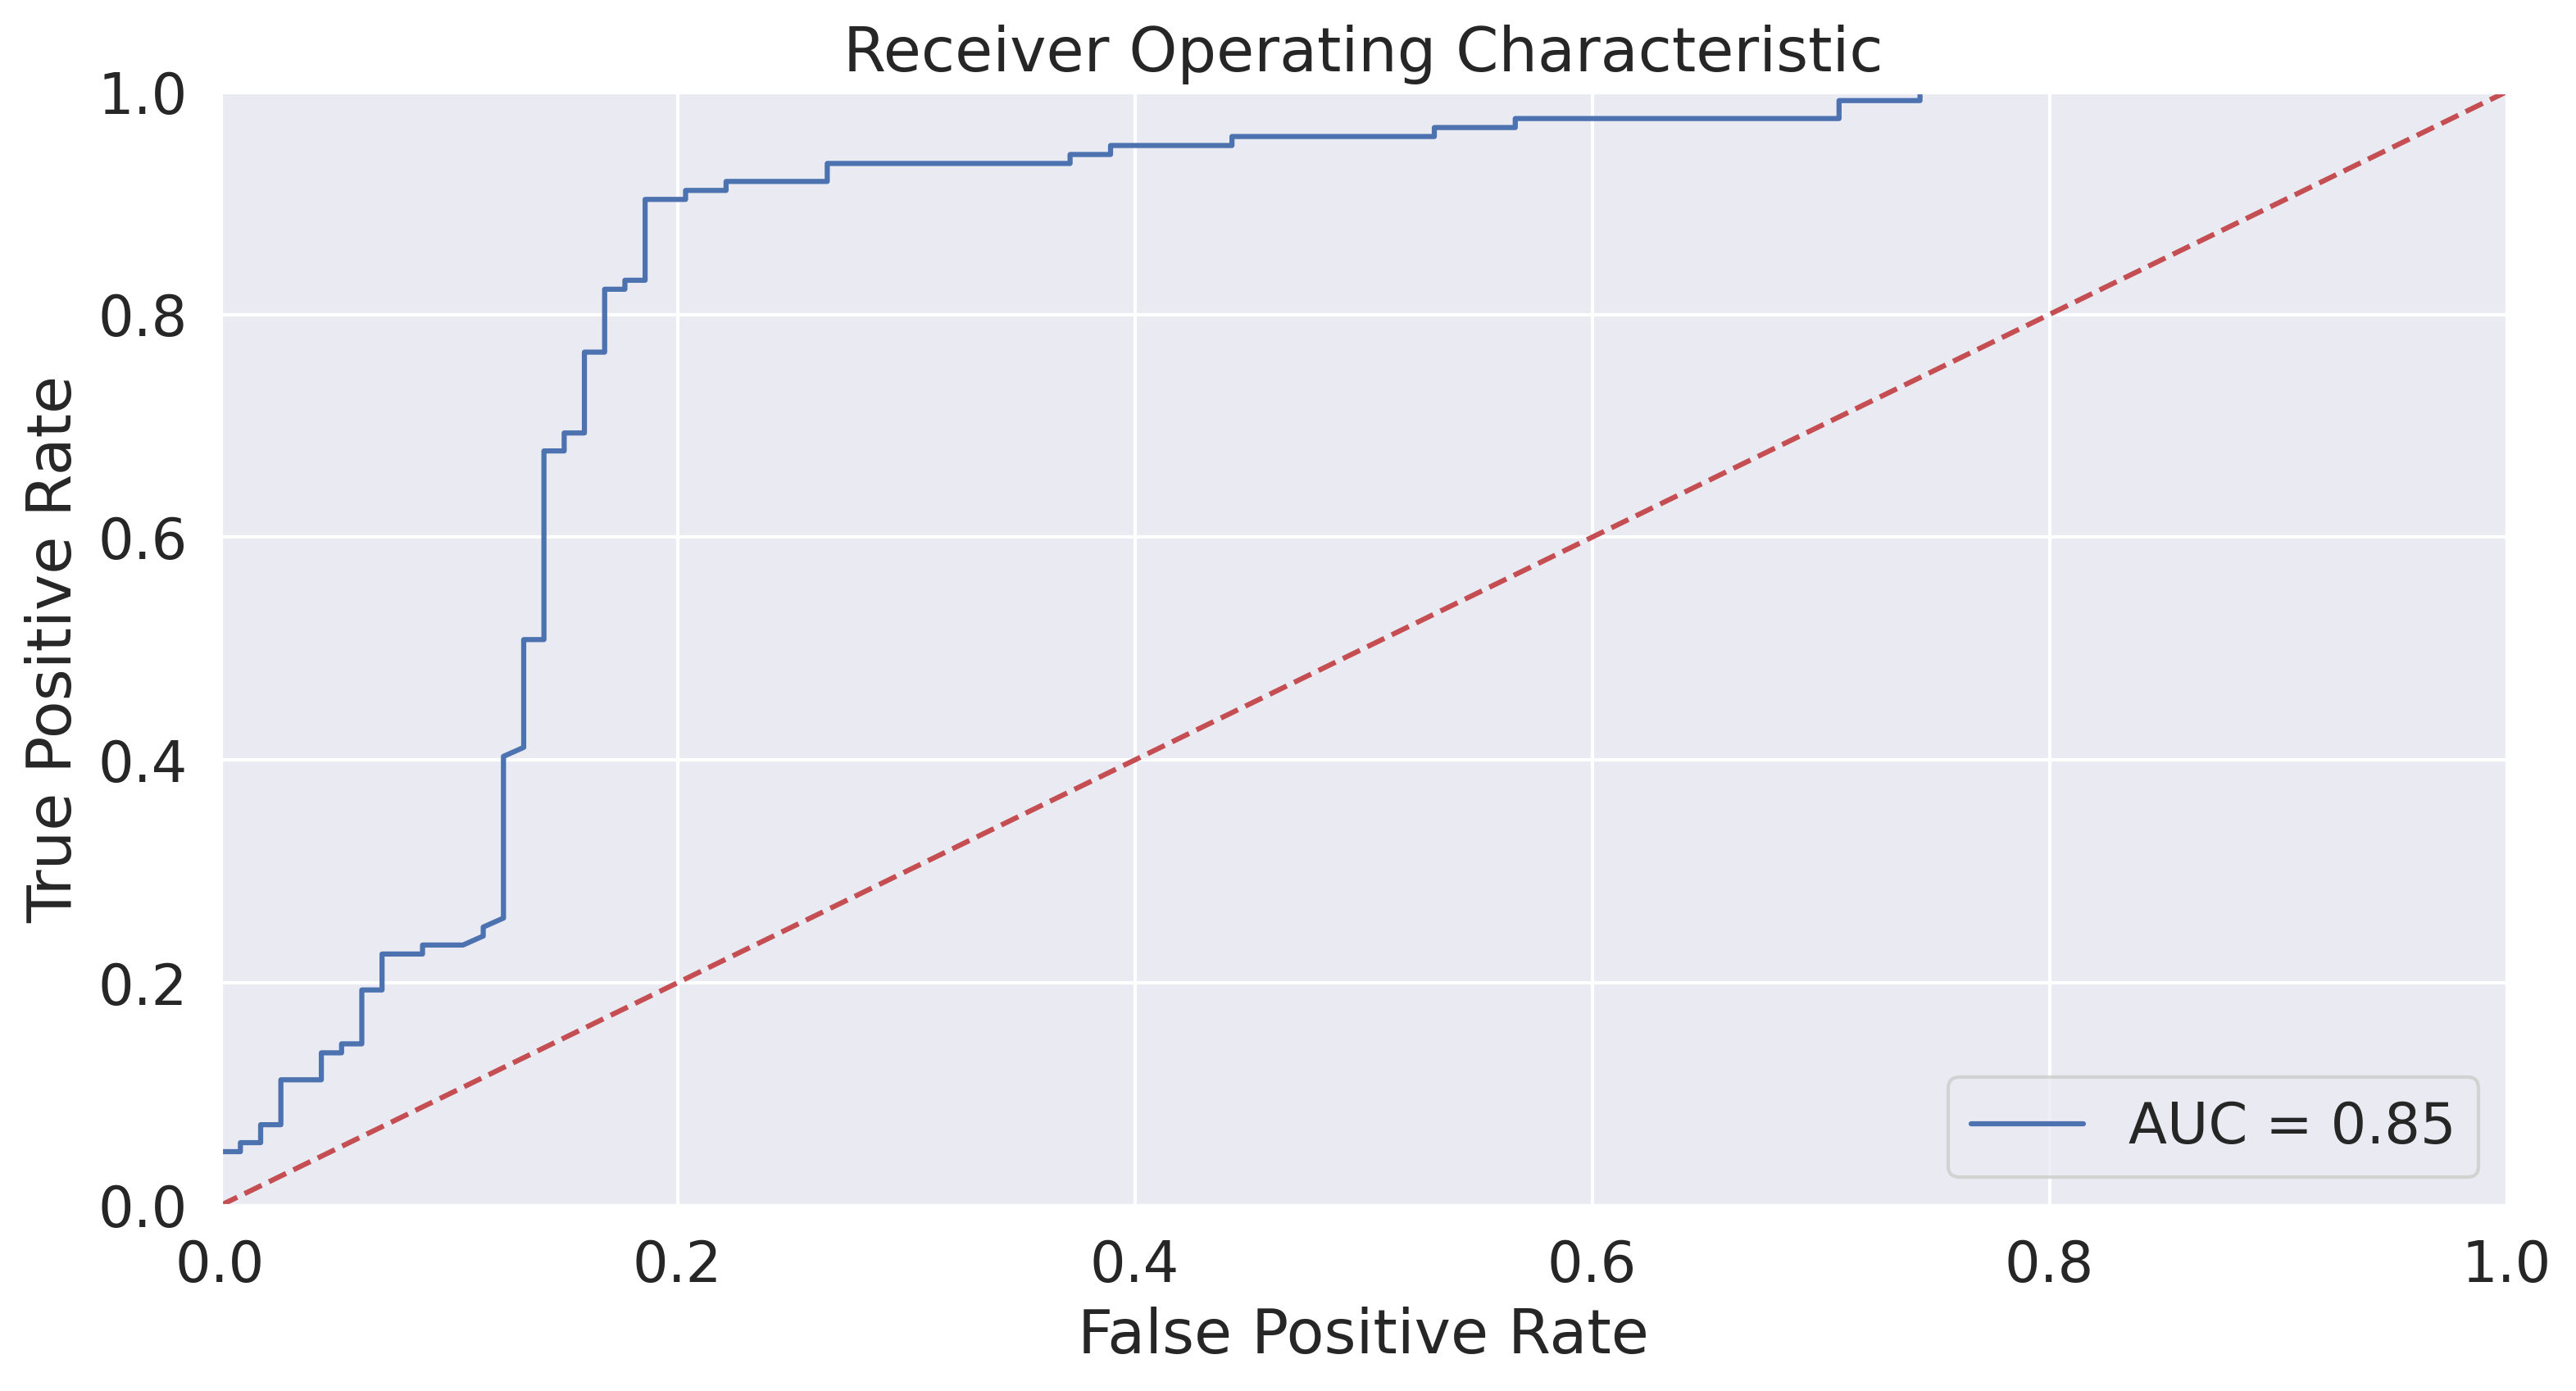

In [ ]:
#bert-base-cased, bert-large-cased, roberta-base, roberta-large, 

bert_base_train_stats, bert_base_probs, bert_base_predicted_labels, bert_base_true_labels = bert_trainer_validator(
                                                                            bert_train, bert_test,
                                                                           train_model='bert-base-cased',
                                                                           m_len=265, batch_size=32, 
                                                                           lr_par=5e-5, eps_par=1e-8, 
                                                                           epochs=4, seed_val=42,
                                                                            proce='gpu'  )

#bert-base-cased
full_results(bert_base_train_stats, bert_base_probs, bert_base_predicted_labels, bert_base_true_labels)

Tensor's length: 1569 of Train
Tensor's length: 237 of TEST_short


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b


======== Epoch 1 / 2 ========
Training...
  Batch    40  of     45.    Elapsed: 0:00:33.

  Average training loss: 0.50
  Training epcoh took: 0:00:36

Running Validation...
  Accuracy: 0.92
  Validation Loss: 0.23
  Validation took: 0:00:01

======== Epoch 2 / 2 ========
Training...
  Batch    40  of     45.    Elapsed: 0:00:33.

  Average training loss: 0.15
  Training epcoh took: 0:00:36

Running Validation...
  Accuracy: 0.94
  Validation Loss: 0.20
  Validation took: 0:00:01

Training complete!
Total training took 0:01:16 (h:mm:ss)
 PREDICTION DONE.
       Training Loss  Valid. Loss  Valid. Accur. Training Time Validation Time
epoch                                                                         
1           0.497702     0.228286       0.917457       0:00:36         0:00:01
2           0.151754     0.197303       0.936207       0:00:36         0:00:01


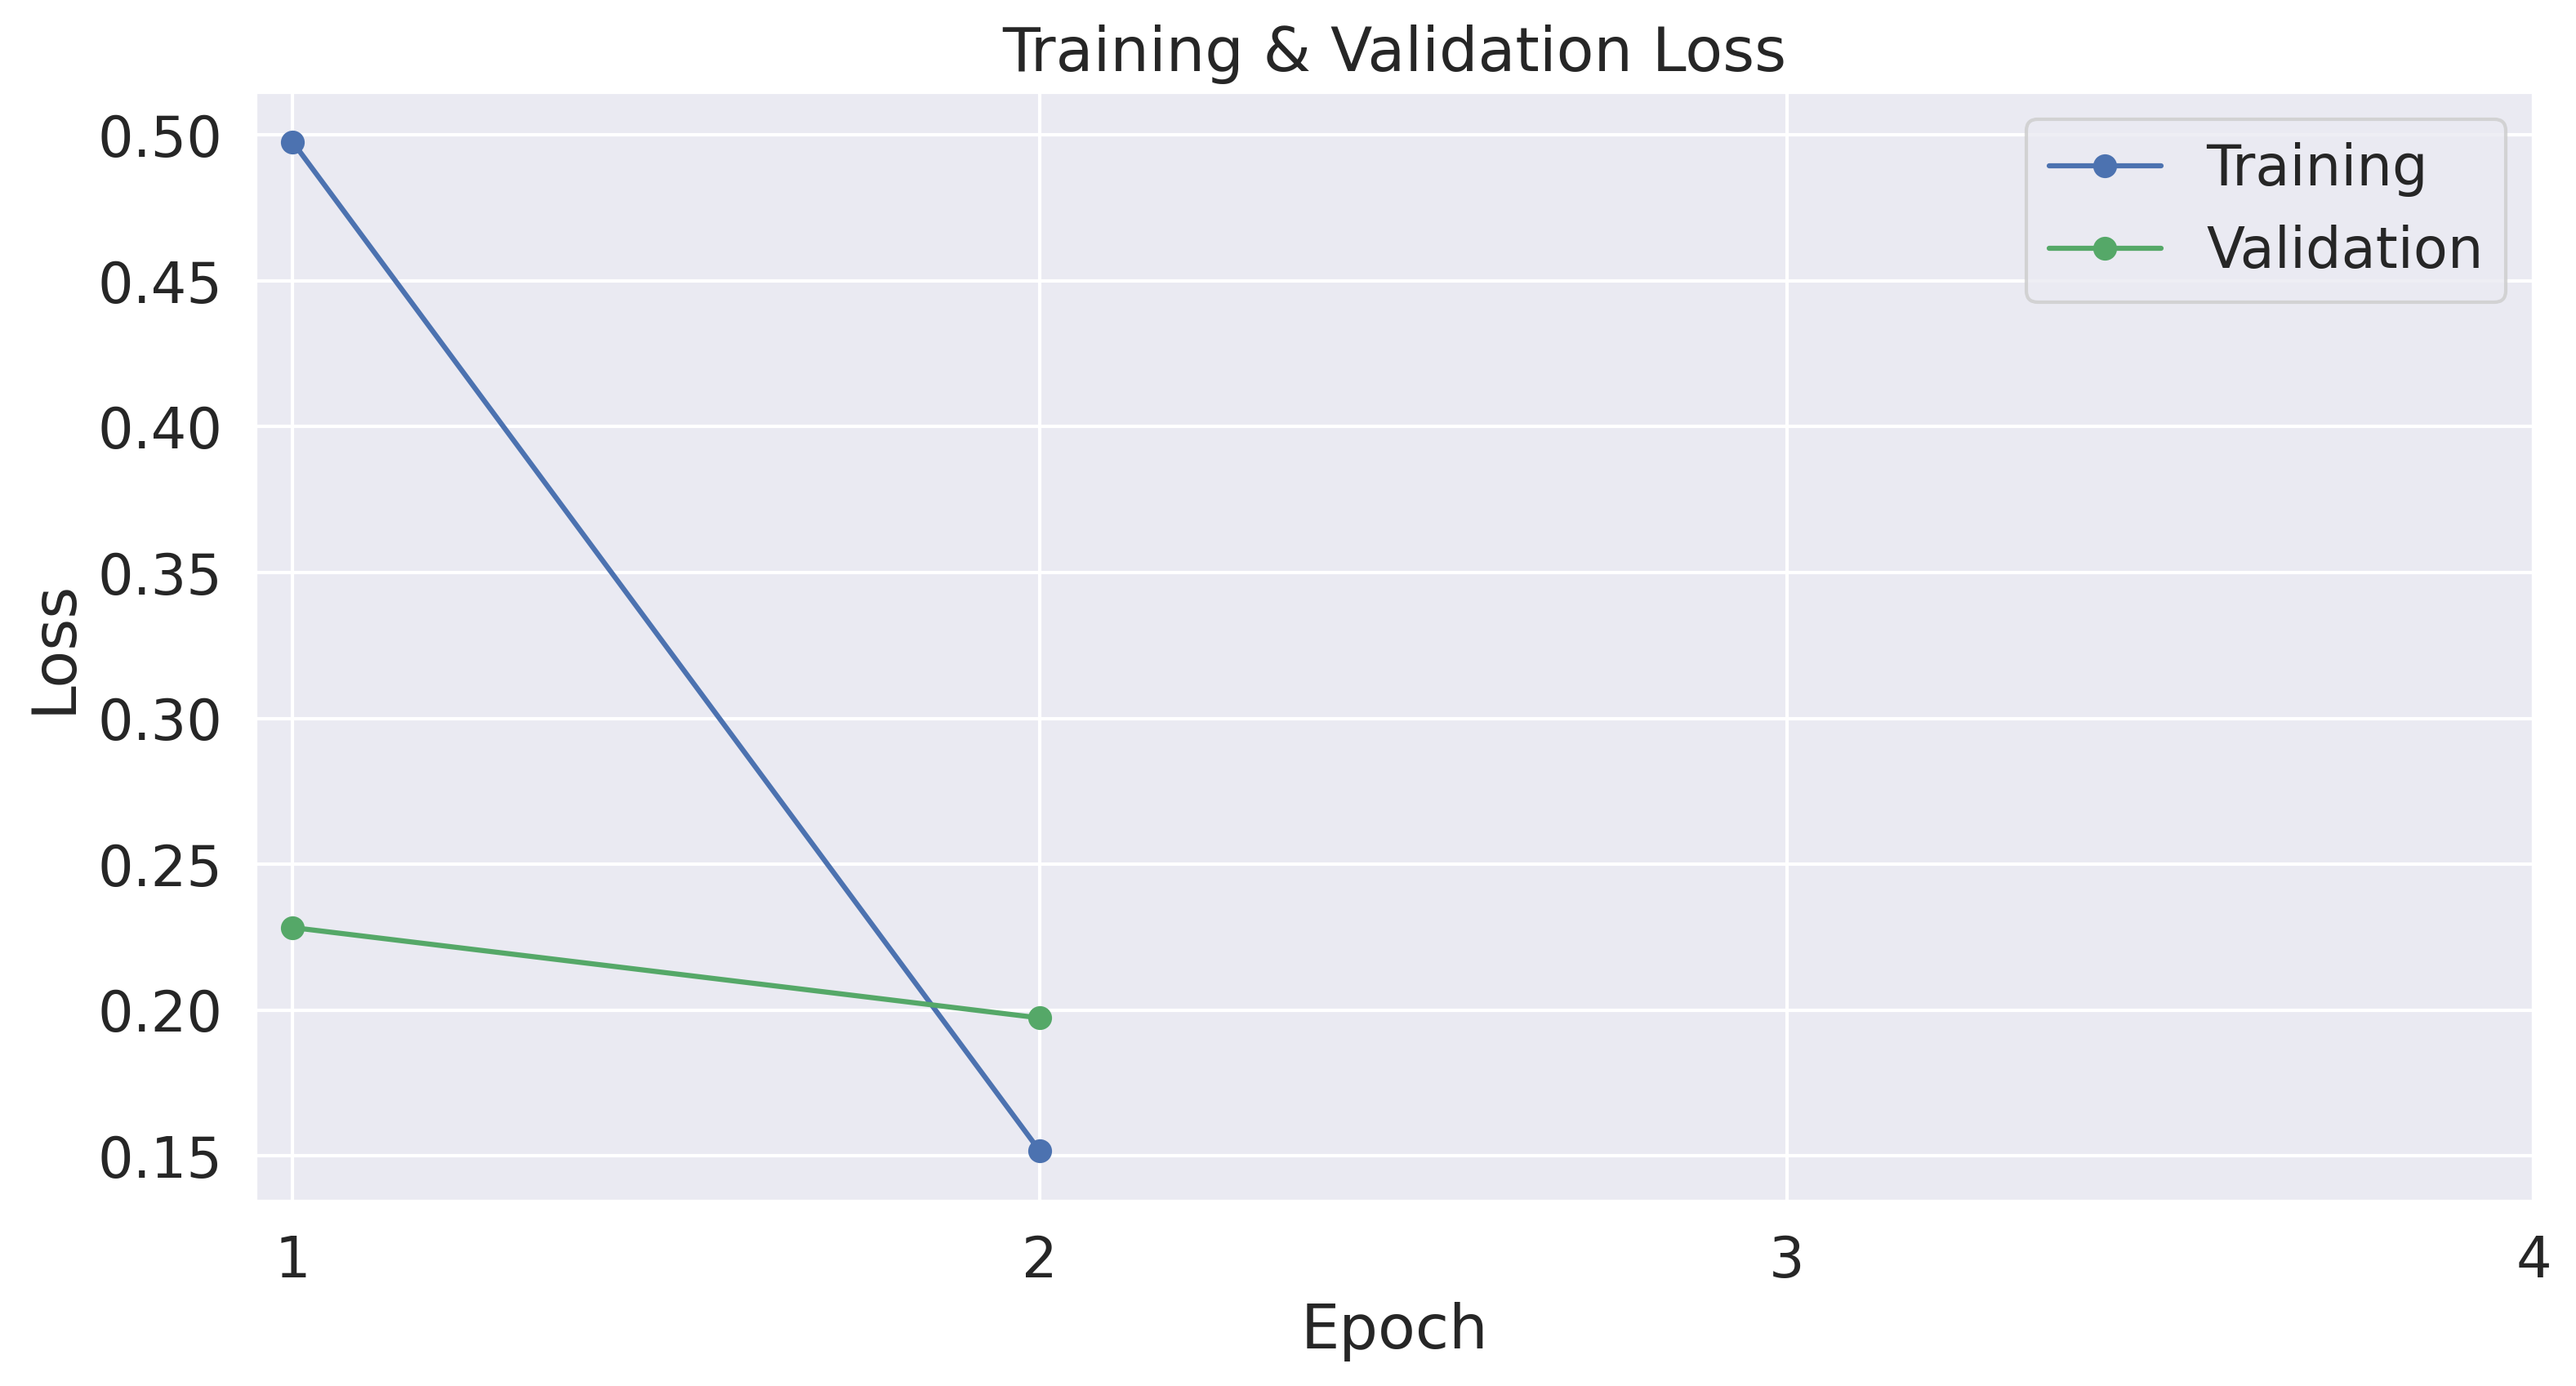

              precision    recall  f1-score   support

           0       0.86      0.74      0.80       131
           1       0.73      0.85      0.78       106

    accuracy                           0.79       237
   macro avg       0.79      0.79      0.79       237
weighted avg       0.80      0.79      0.79       237

AUC: 0.8473
Accuracy: 78.90%


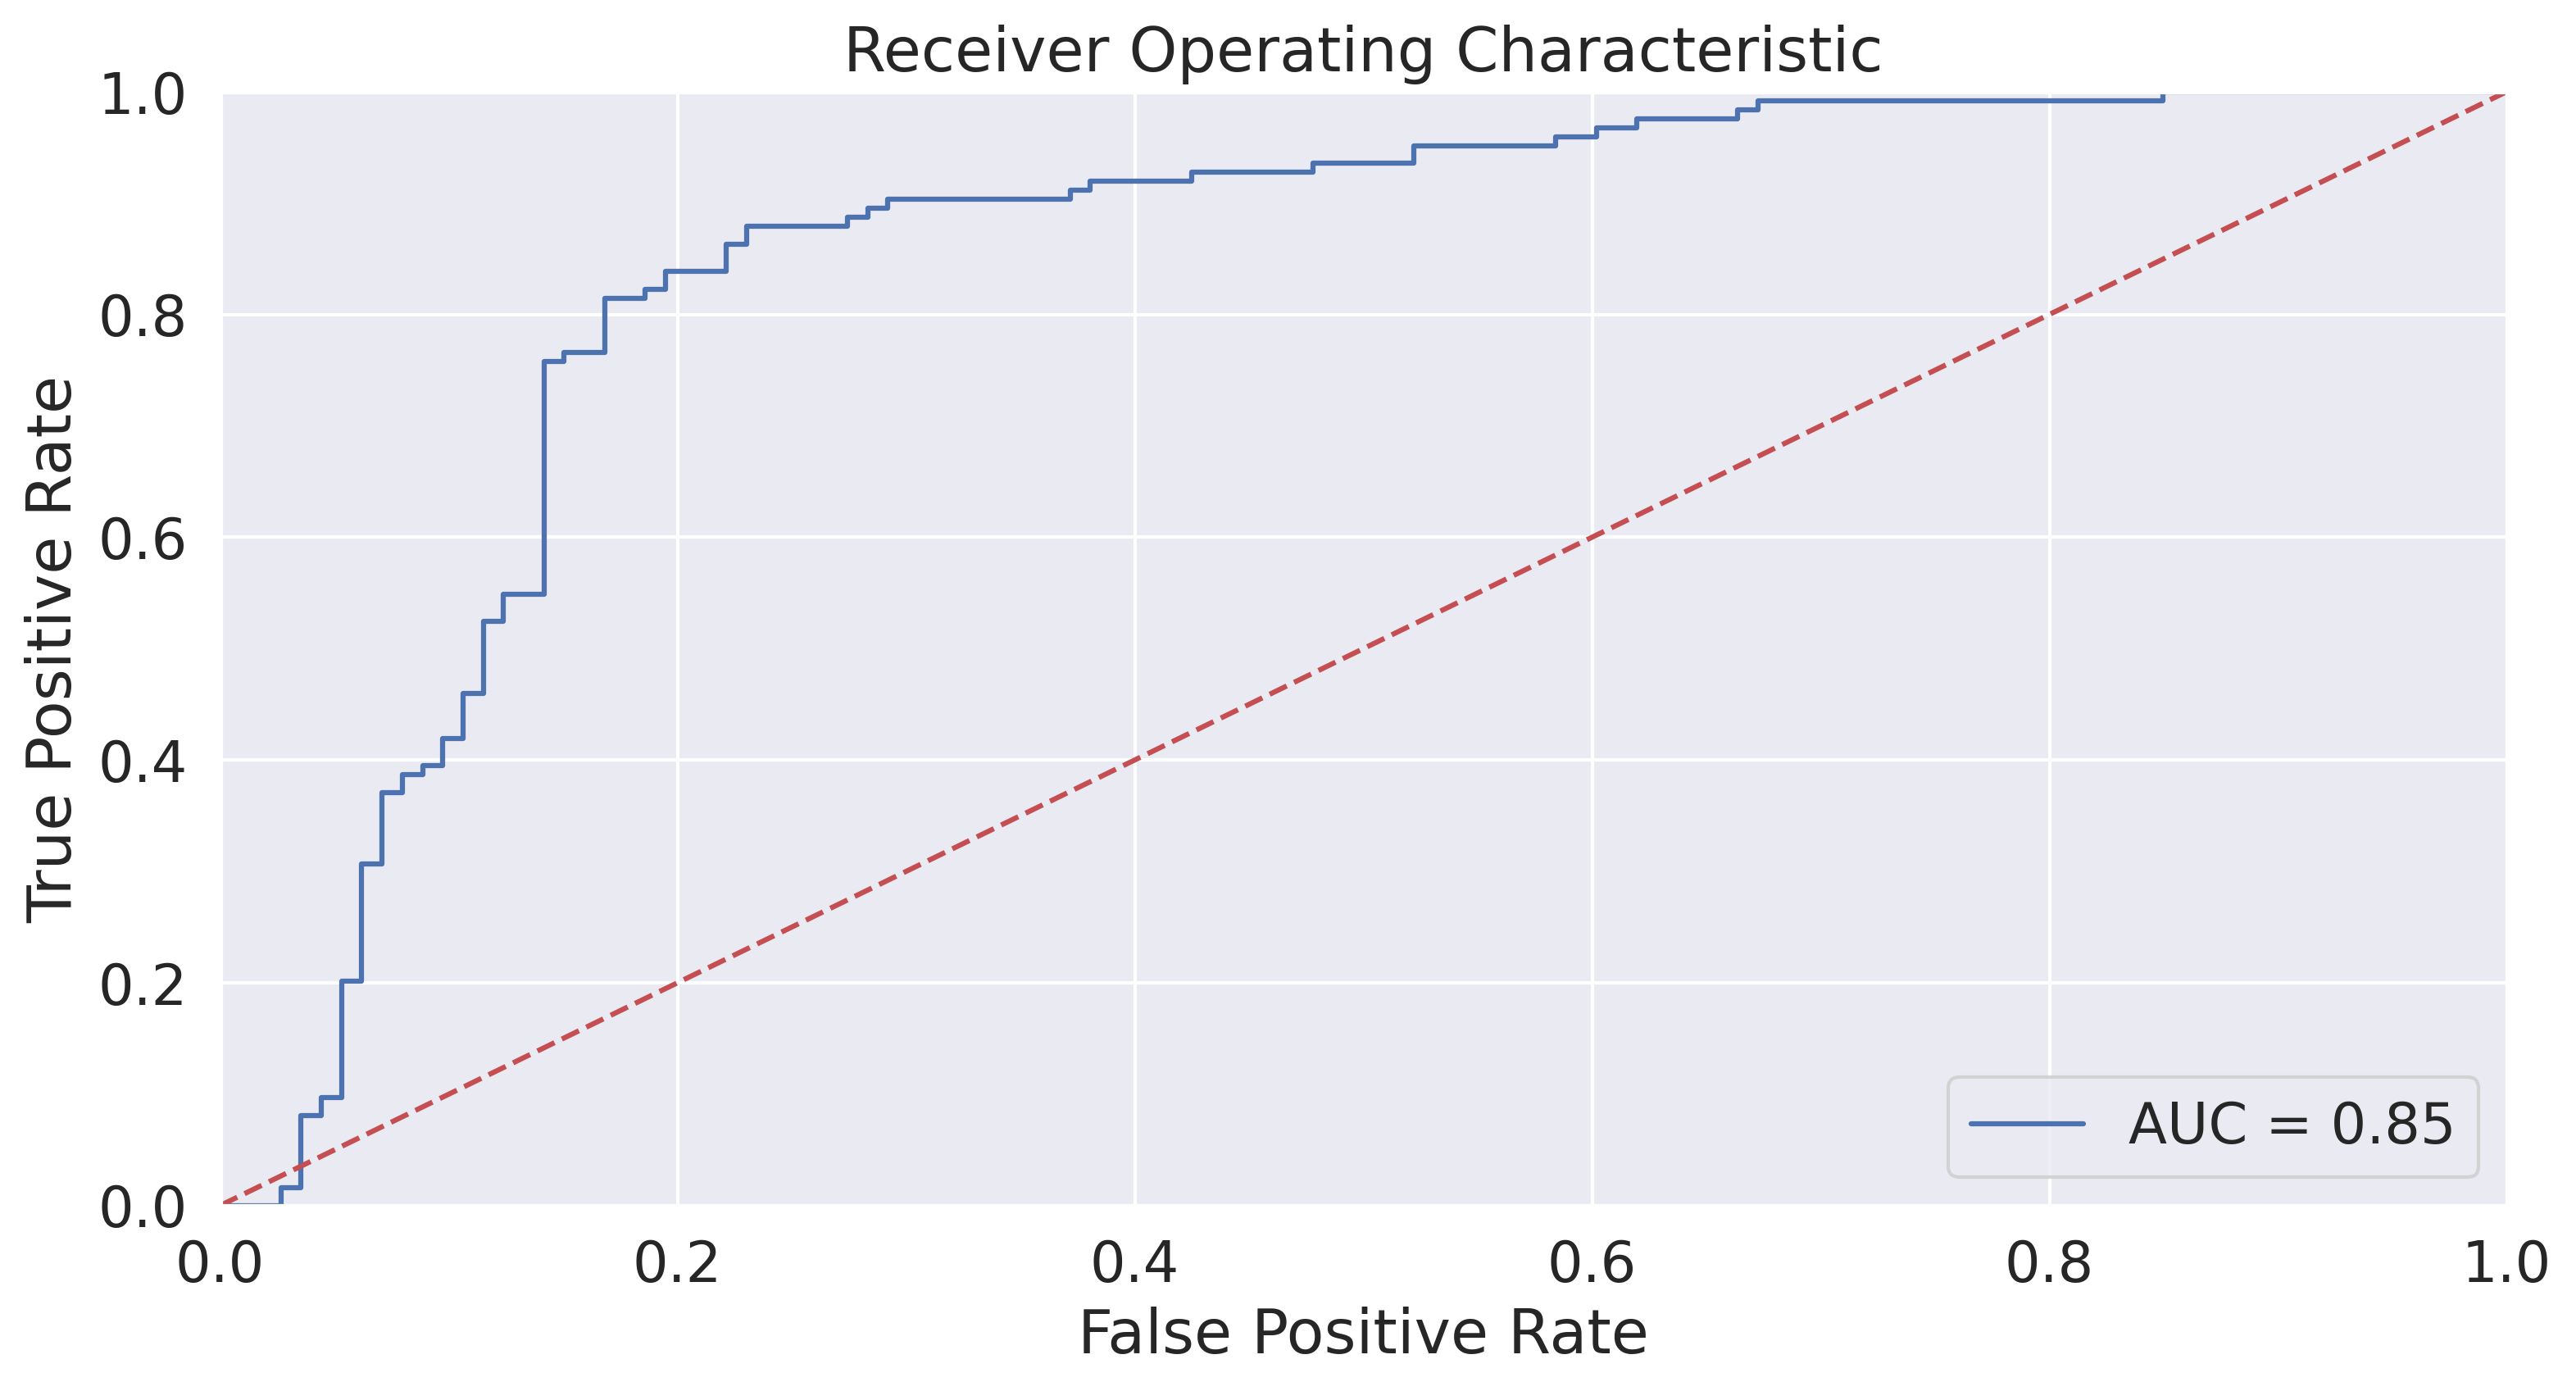

In [ ]:
#BEST EPOCH 2 - RERUN
#bert-base-cased, bert-large-cased, roberta-base, roberta-large, 

bert_base_train_stats, bert_base_probs, bert_base_predicted_labels, bert_base_true_labels = bert_trainer_validator(
                                                                            bert_train, bert_test,
                                                                           train_model='bert-base-cased',
                                                                           m_len=265, batch_size=32, 
                                                                           lr_par=5e-5, eps_par=1e-8, 
                                                                           epochs=2, seed_val=42,
                                                                            proce='gpu'  )

#bert-base-cased
full_results(bert_base_train_stats, bert_base_probs, bert_base_predicted_labels, bert_base_true_labels)

Tensor's length: 1569 of Train
Tensor's length: 237 of TEST_short


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out


======== Epoch 1 / 4 ========
Training...
  Batch    40  of     45.    Elapsed: 0:00:32.

  Average training loss: 0.46
  Training epcoh took: 0:00:36

Running Validation...
  Accuracy: 0.94
  Validation Loss: 0.20
  Validation took: 0:00:01

======== Epoch 2 / 4 ========
Training...
  Batch    40  of     45.    Elapsed: 0:00:32.

  Average training loss: 0.14
  Training epcoh took: 0:00:36

Running Validation...
  Accuracy: 0.96
  Validation Loss: 0.14
  Validation took: 0:00:01

======== Epoch 3 / 4 ========
Training...
  Batch    40  of     45.    Elapsed: 0:00:32.

  Average training loss: 0.08
  Training epcoh took: 0:00:36

Running Validation...
  Accuracy: 0.94
  Validation Loss: 0.24
  Validation took: 0:00:01

======== Epoch 4 / 4 ========
Training...
  Batch    40  of     45.    Elapsed: 0:00:32.

  Average training loss: 0.06
  Training epcoh took: 0:00:36

Running Validation...
  Accuracy: 0.96
  Validation Loss: 0.18
  Validation took: 0:00:01

Training complete!
Total tr

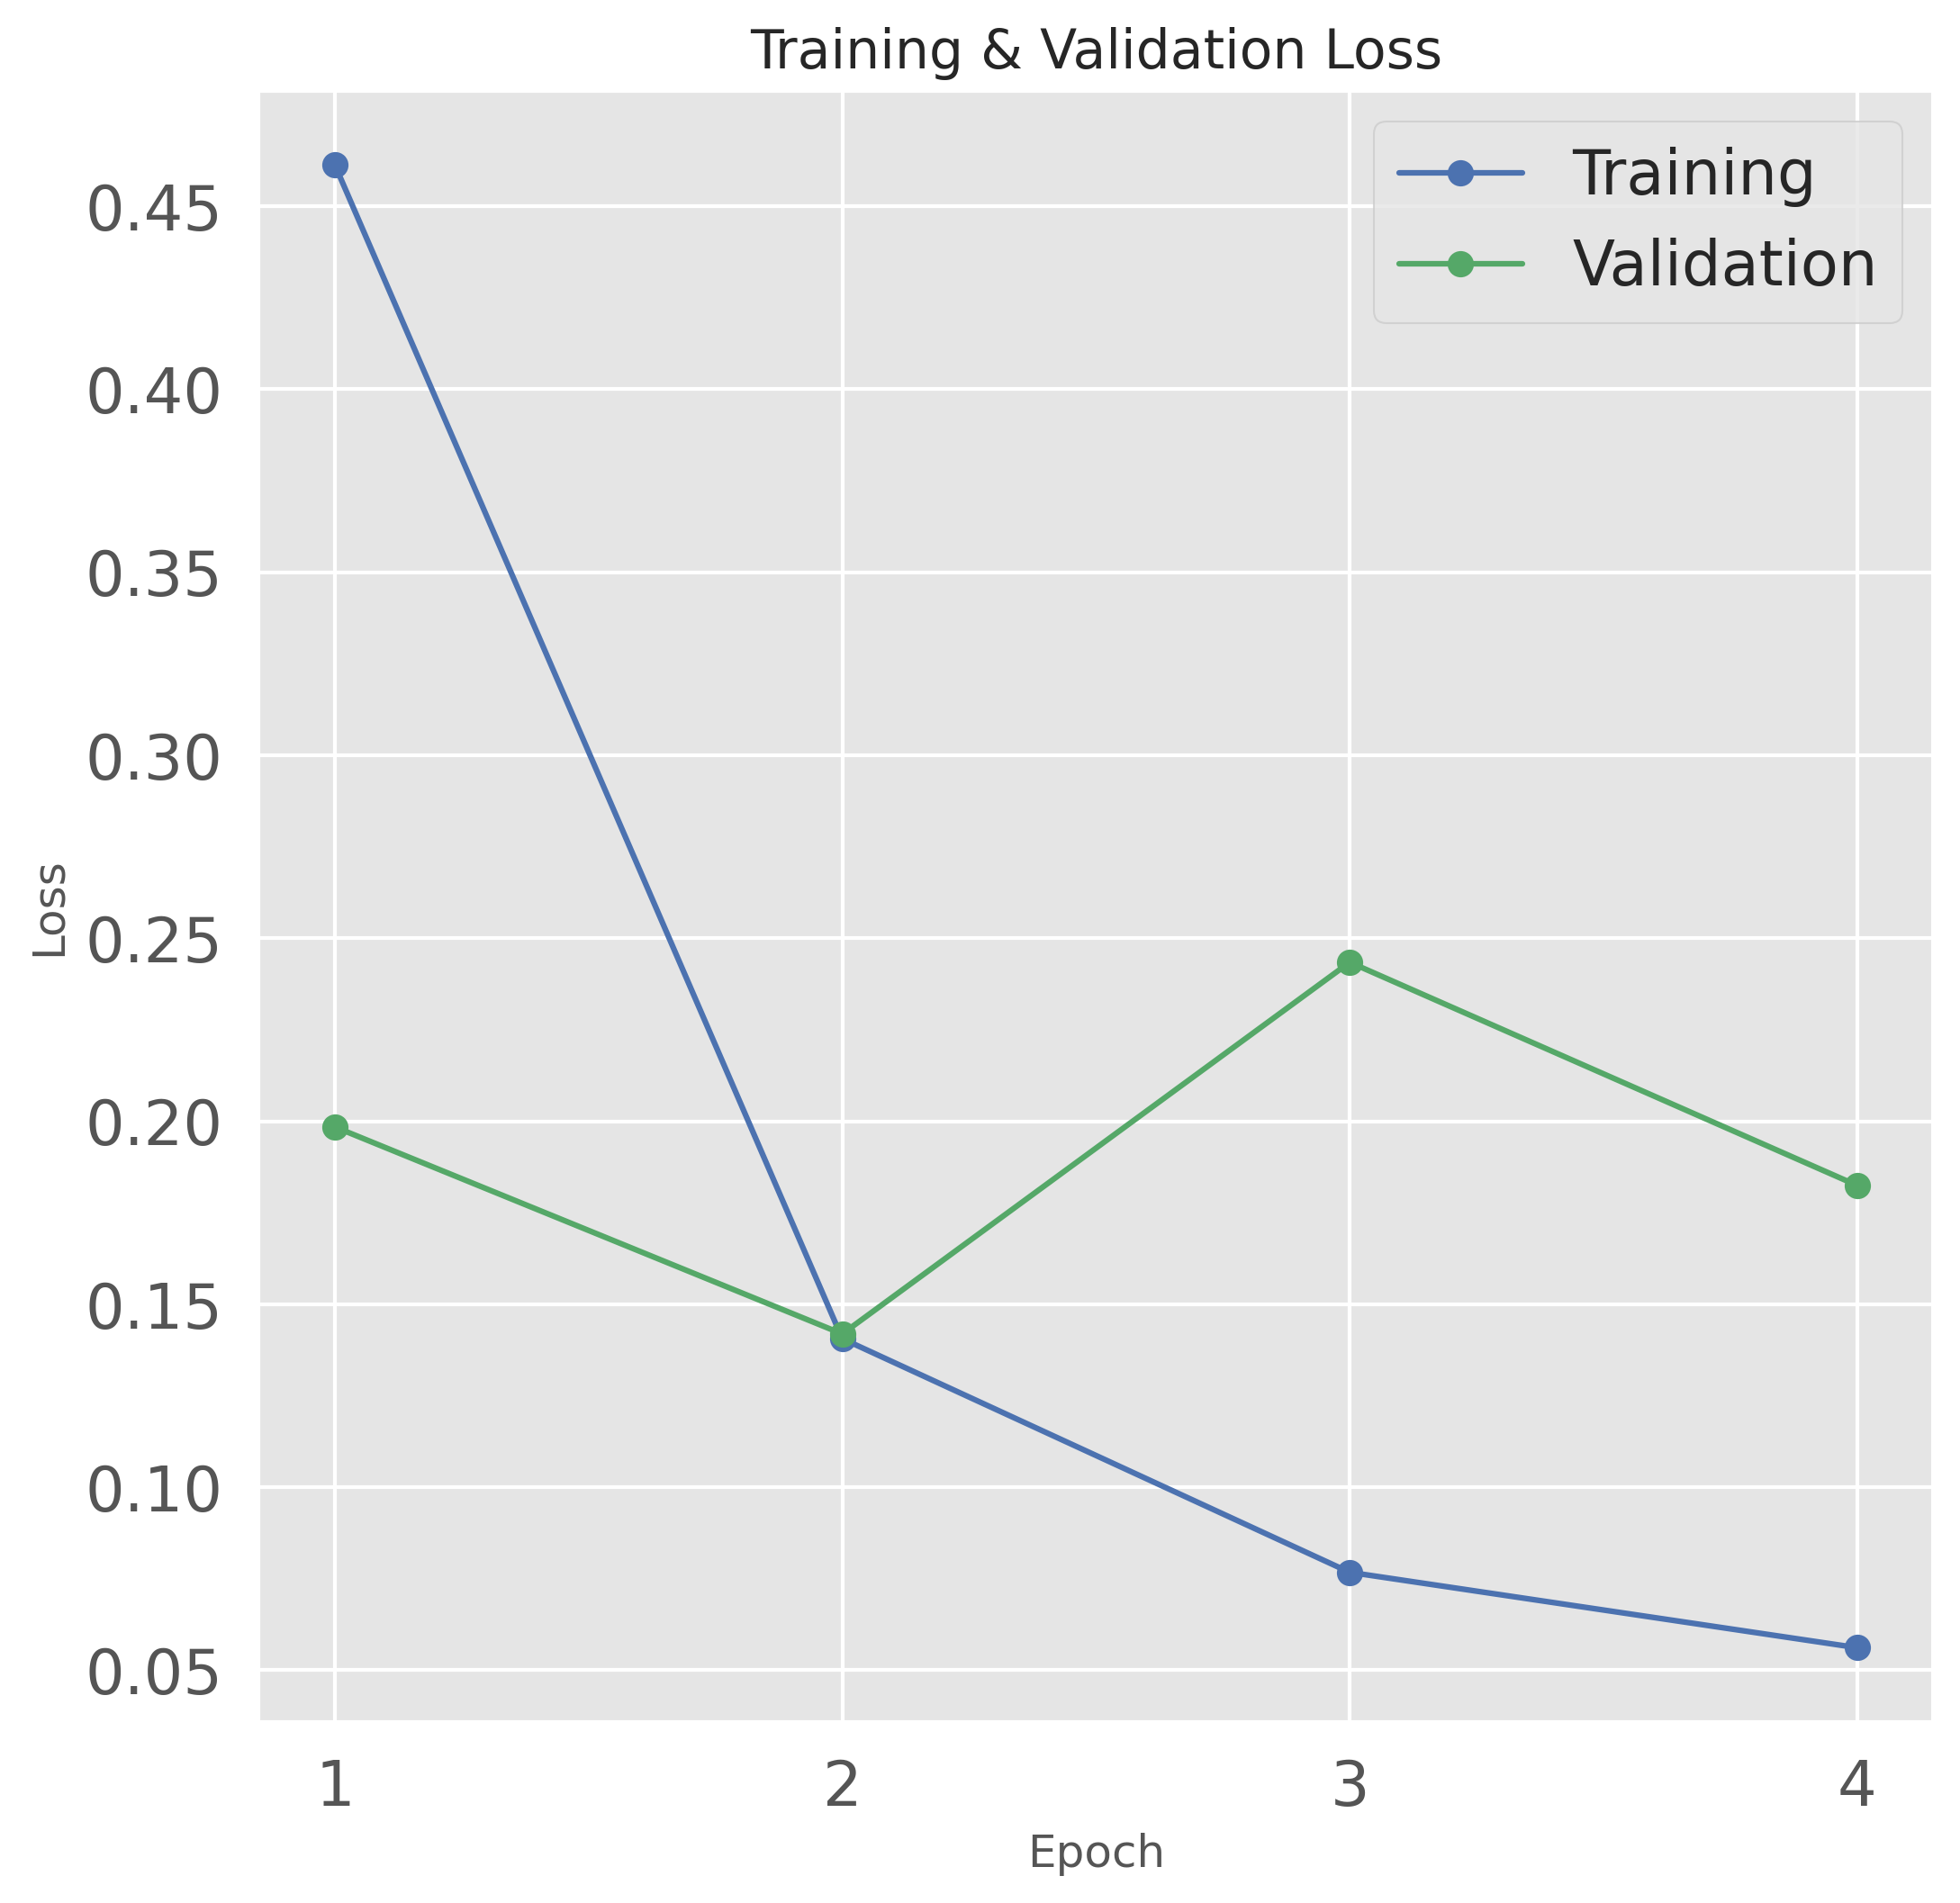

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       134
           1       0.69      0.83      0.76       103

    accuracy                           0.77       237
   macro avg       0.77      0.78      0.77       237
weighted avg       0.78      0.77      0.77       237

AUC: 0.8627
Accuracy: 76.79%


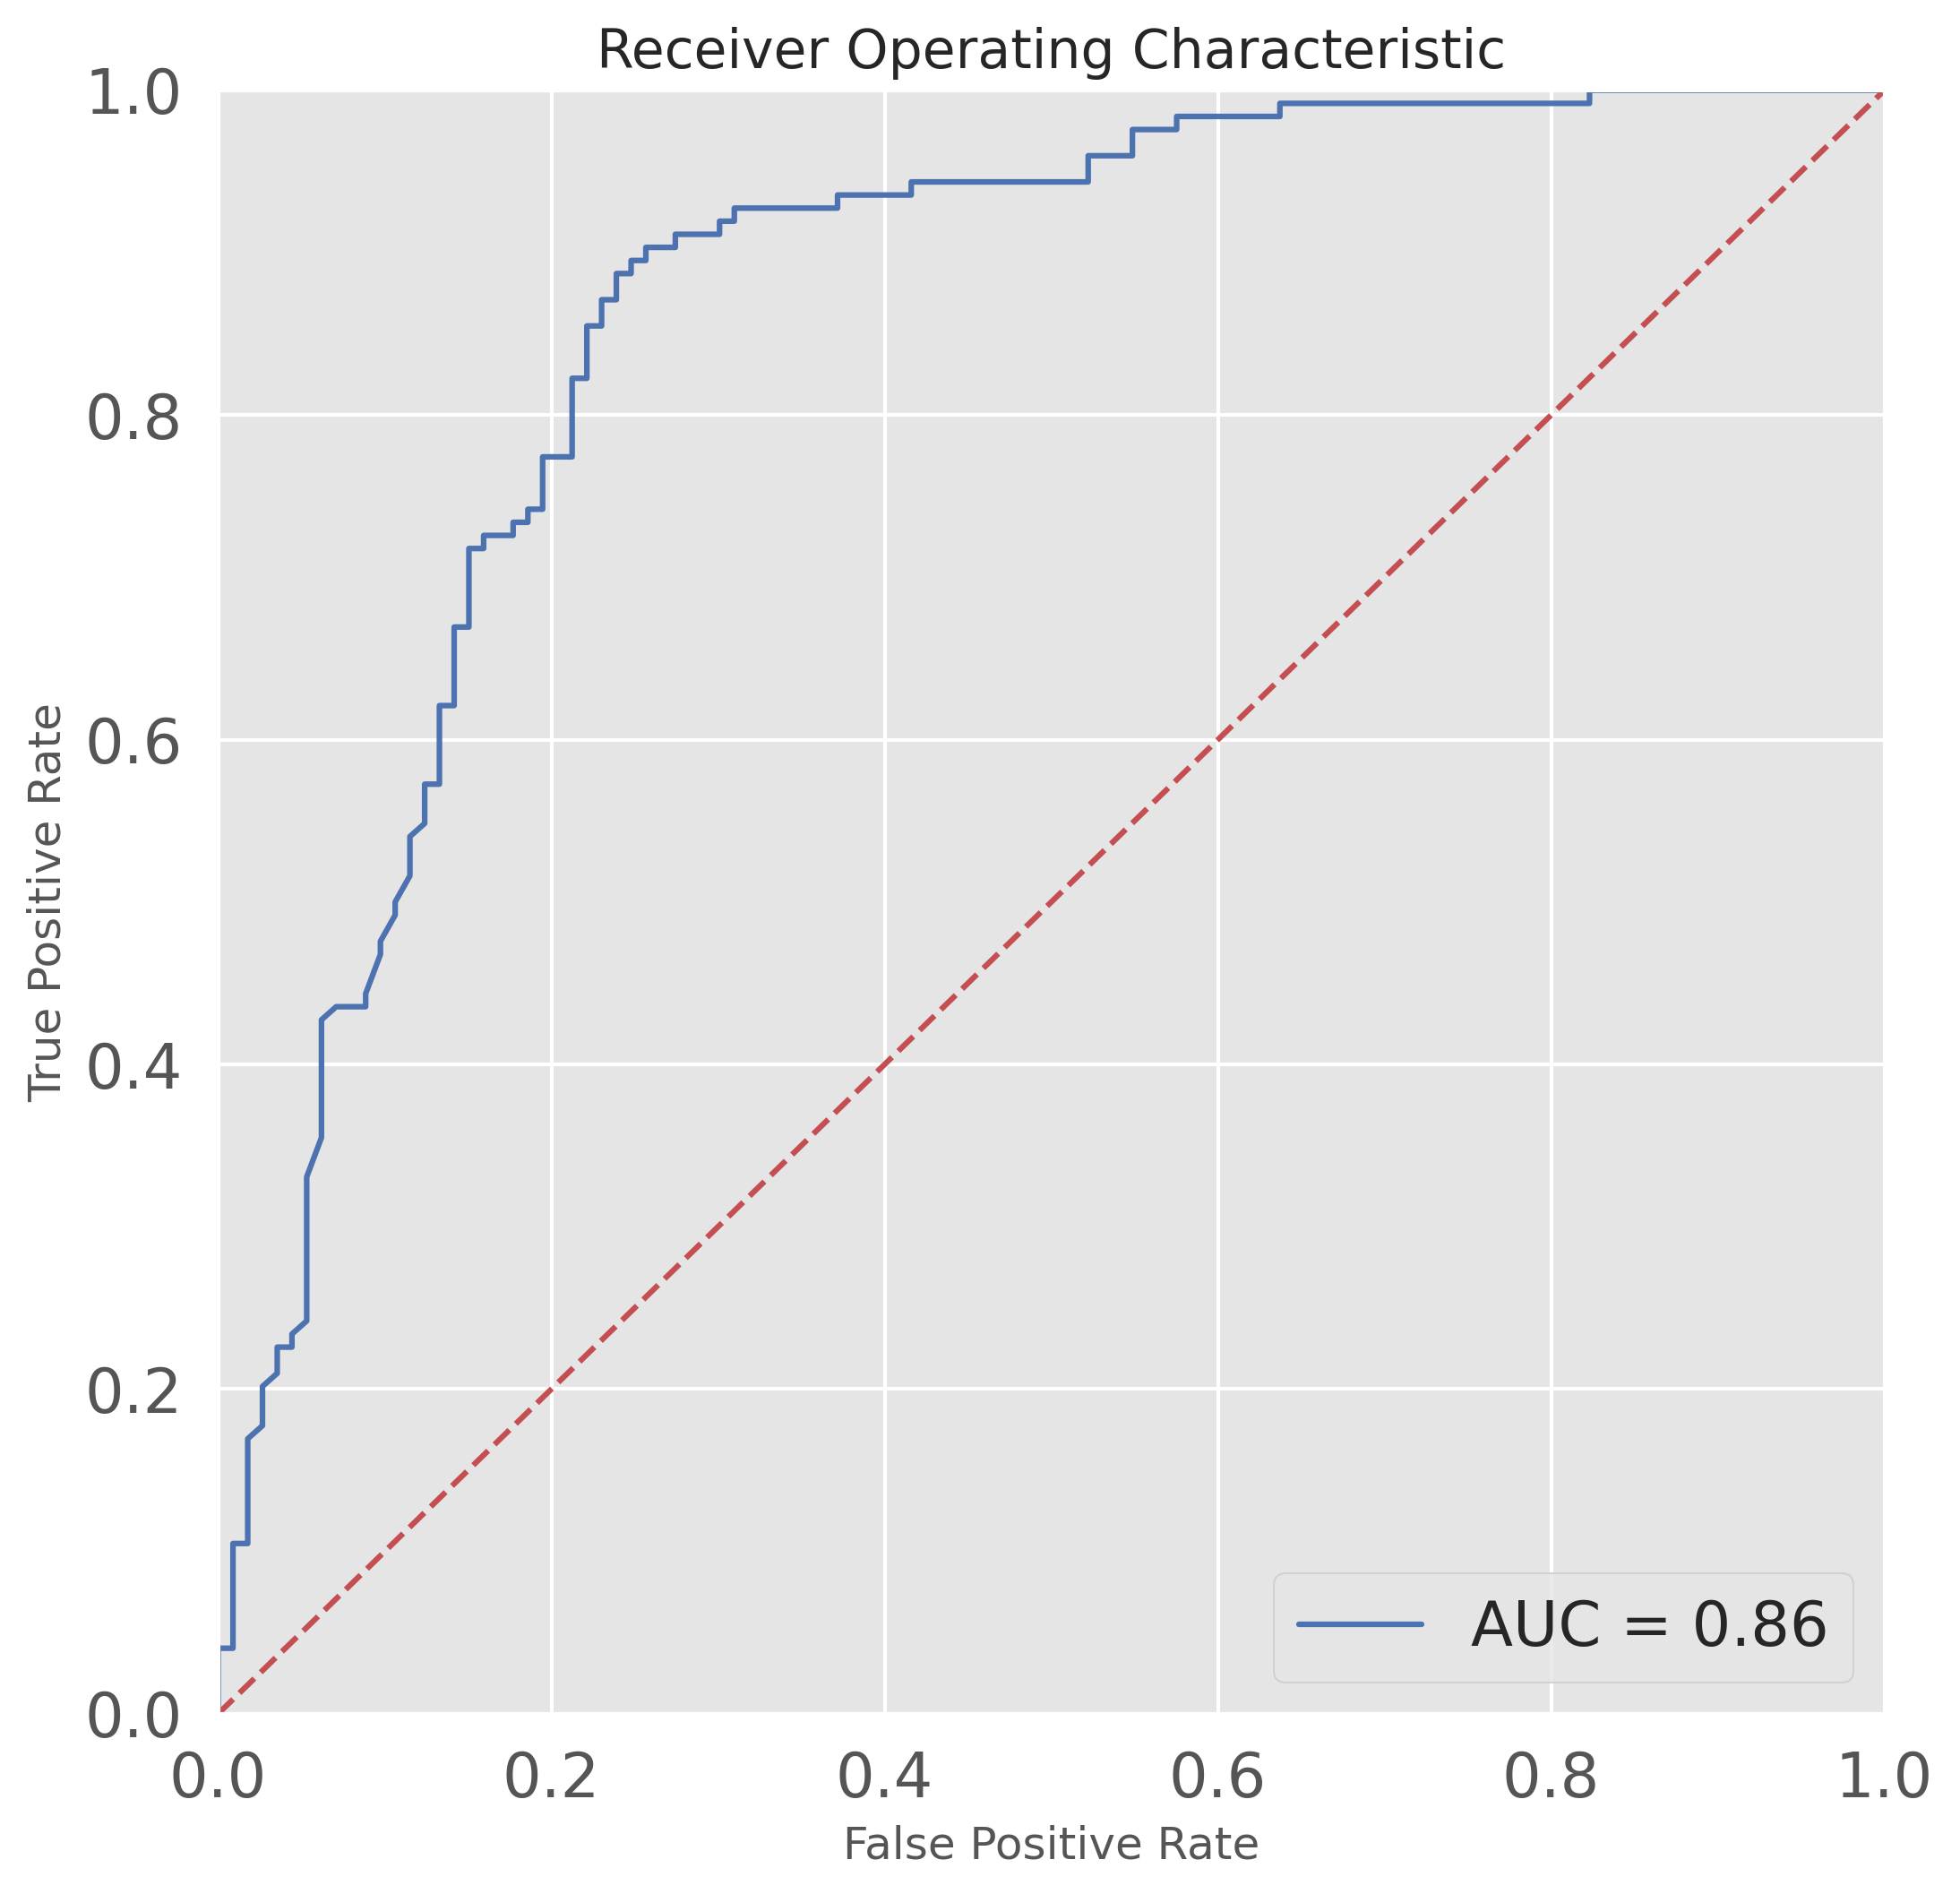

In [26]:
#bert-base-cased, bert-large-cased, roberta-base, roberta-large, 


roberta_base_train_stats, roberta_base_probs, roberta_base_predicted_labels, roberta_base_true_labels = bert_trainer_validator(bert_train, bert_test,
                                                                           train_model='roberta-base',
                                                                           m_len=260, batch_size=32, 
                                                                           lr_par=5e-5, eps_par=1e-8, 
                                                                           epochs=4, seed_val=42,
                                                                            proce='gpu')

#roberta-base
full_results(roberta_base_train_stats, roberta_base_probs, roberta_base_predicted_labels, roberta_base_true_labels )

Tensor's length: 1569 of Train
Tensor's length: 237 of TEST_short


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out


======== Epoch 1 / 2 ========
Training...
  Batch    40  of     45.    Elapsed: 0:00:32.

  Average training loss: 0.55
  Training epcoh took: 0:00:36

Running Validation...
  Accuracy: 0.94
  Validation Loss: 0.18
  Validation took: 0:00:01

======== Epoch 2 / 2 ========
Training...
  Batch    40  of     45.    Elapsed: 0:00:32.

  Average training loss: 0.14
  Training epcoh took: 0:00:36

Running Validation...
  Accuracy: 0.96
  Validation Loss: 0.16
  Validation took: 0:00:01

Training complete!
Total training took 0:01:14 (h:mm:ss)
 PREDICTION DONE.
       Training Loss  Valid. Loss  Valid. Accur. Training Time Validation Time
epoch                                                                         
1           0.551891     0.176226       0.936853       0:00:36         0:00:01
2           0.138086     0.156253       0.961853       0:00:36         0:00:01


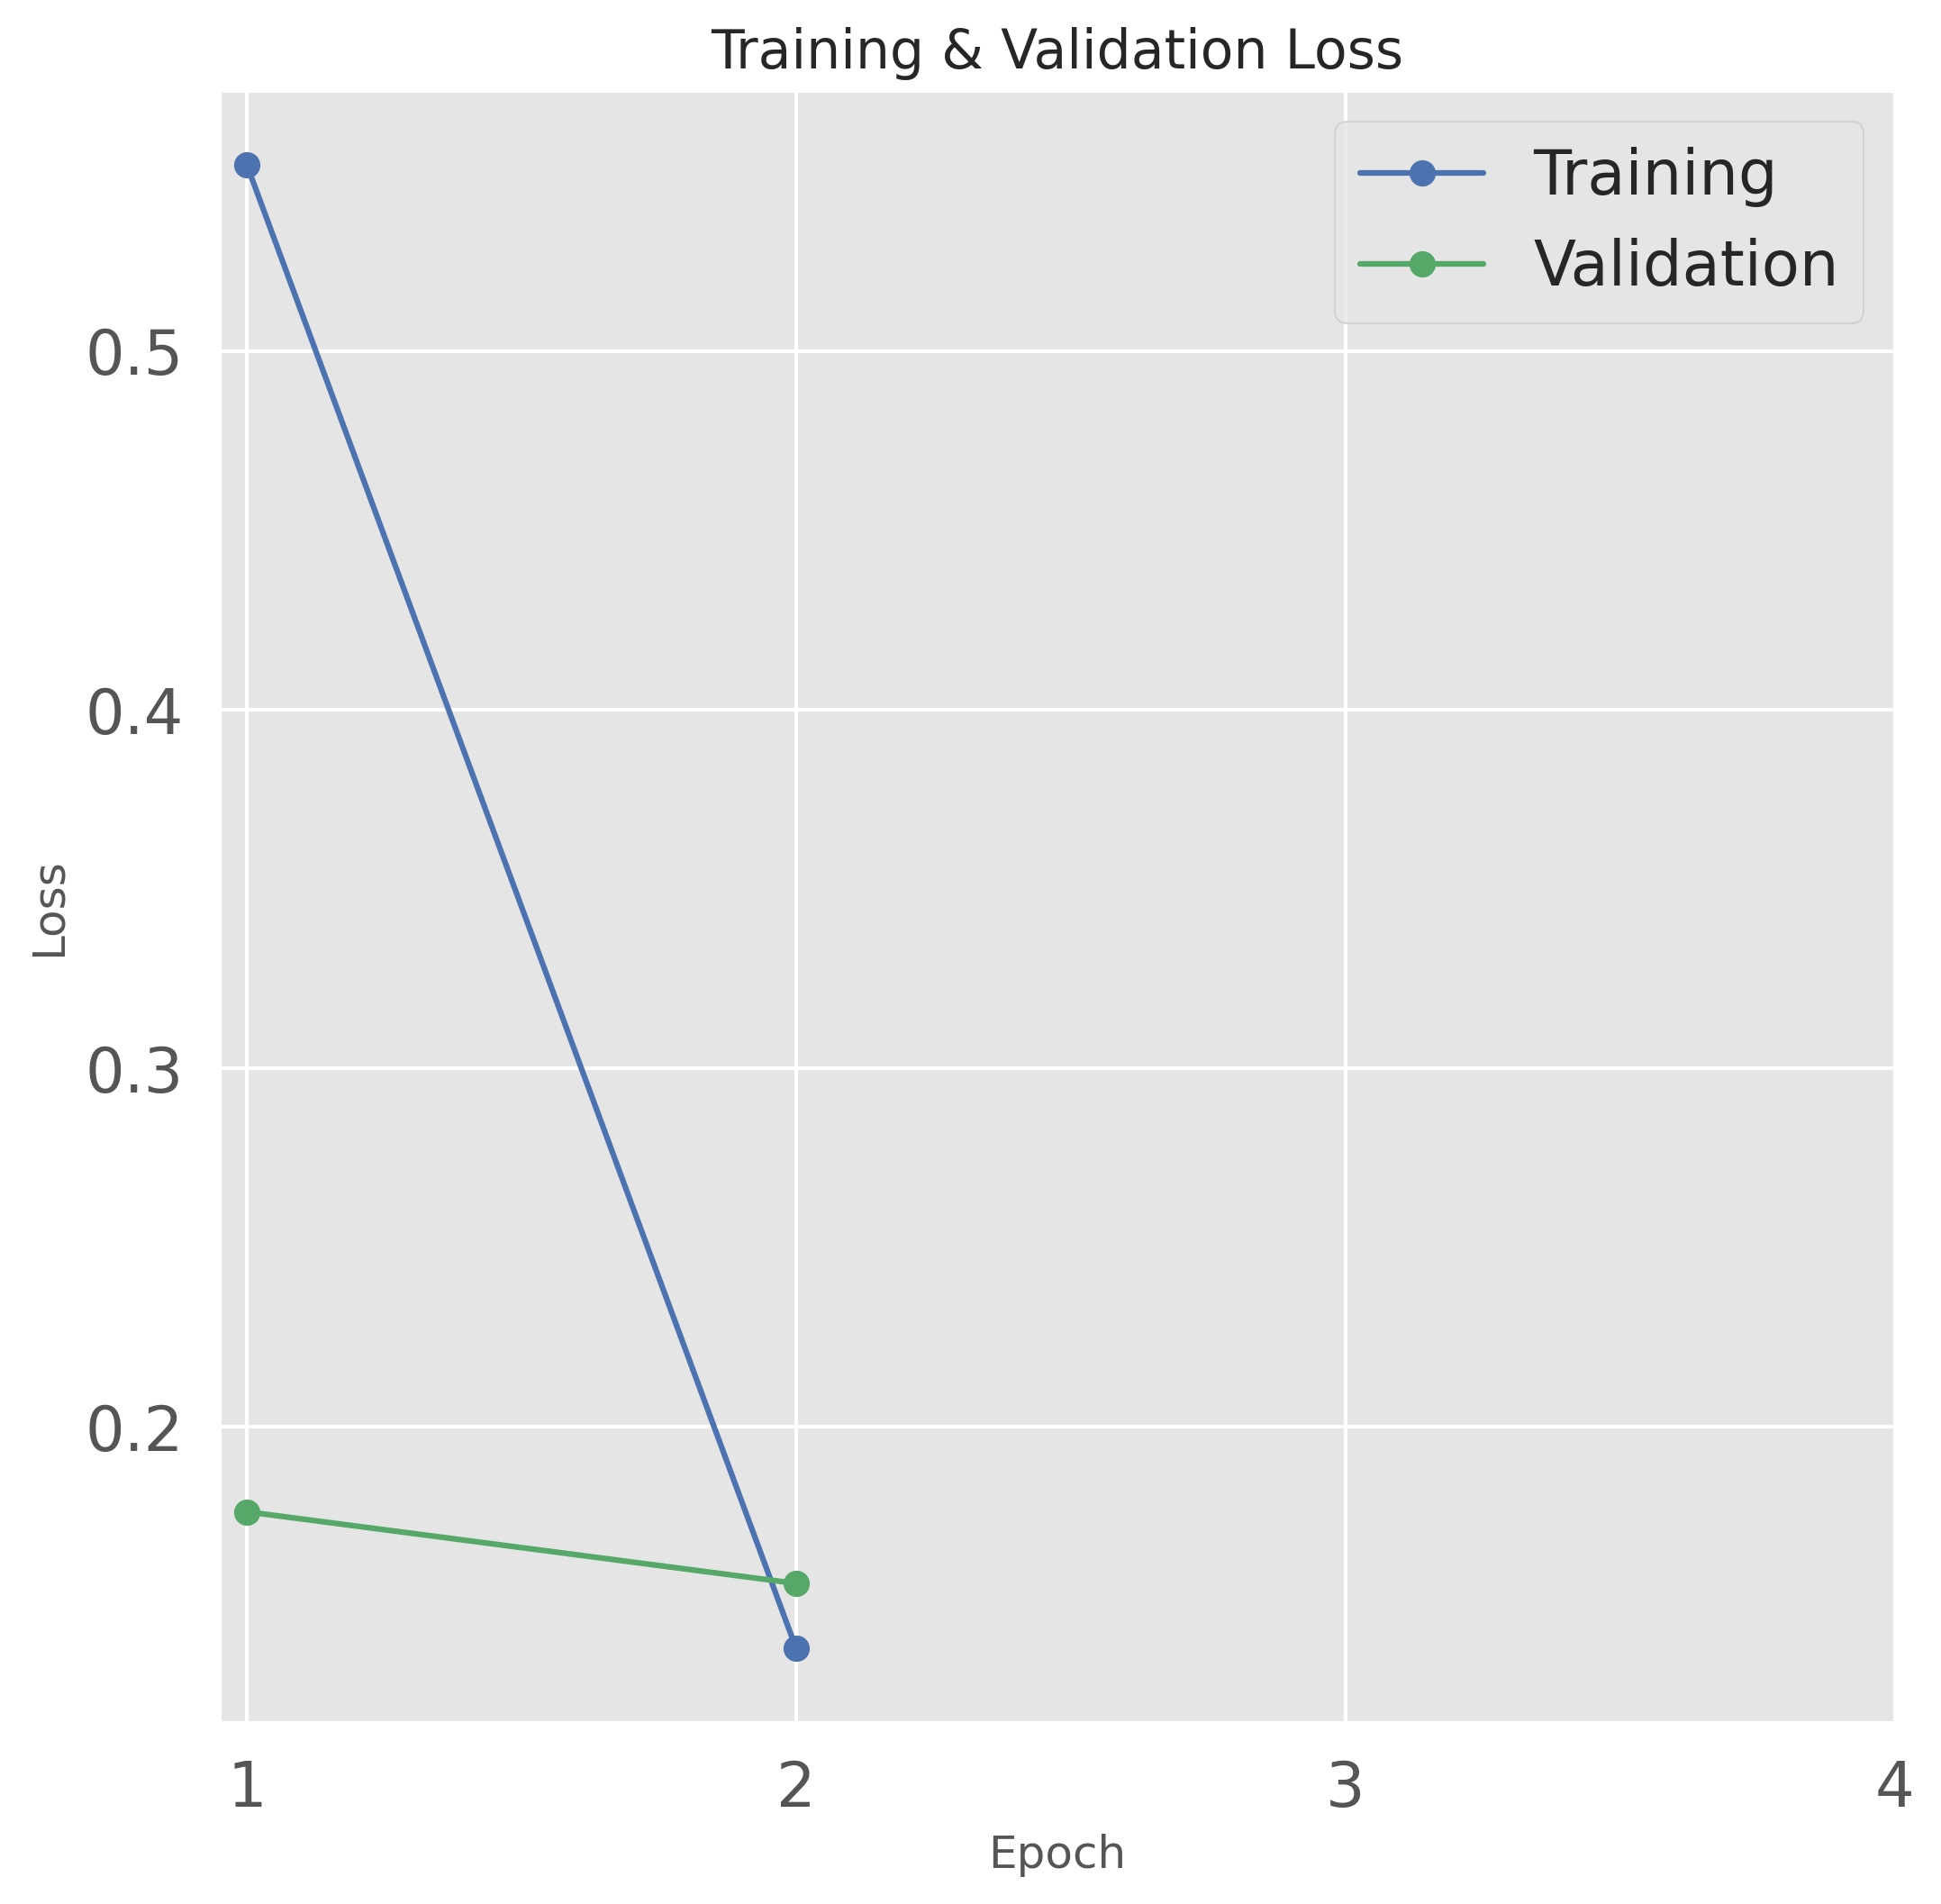

              precision    recall  f1-score   support

           0       0.85      0.71      0.77       135
           1       0.69      0.83      0.75       102

    accuracy                           0.76       237
   macro avg       0.77      0.77      0.76       237
weighted avg       0.78      0.76      0.76       237

AUC: 0.8776
Accuracy: 76.37%


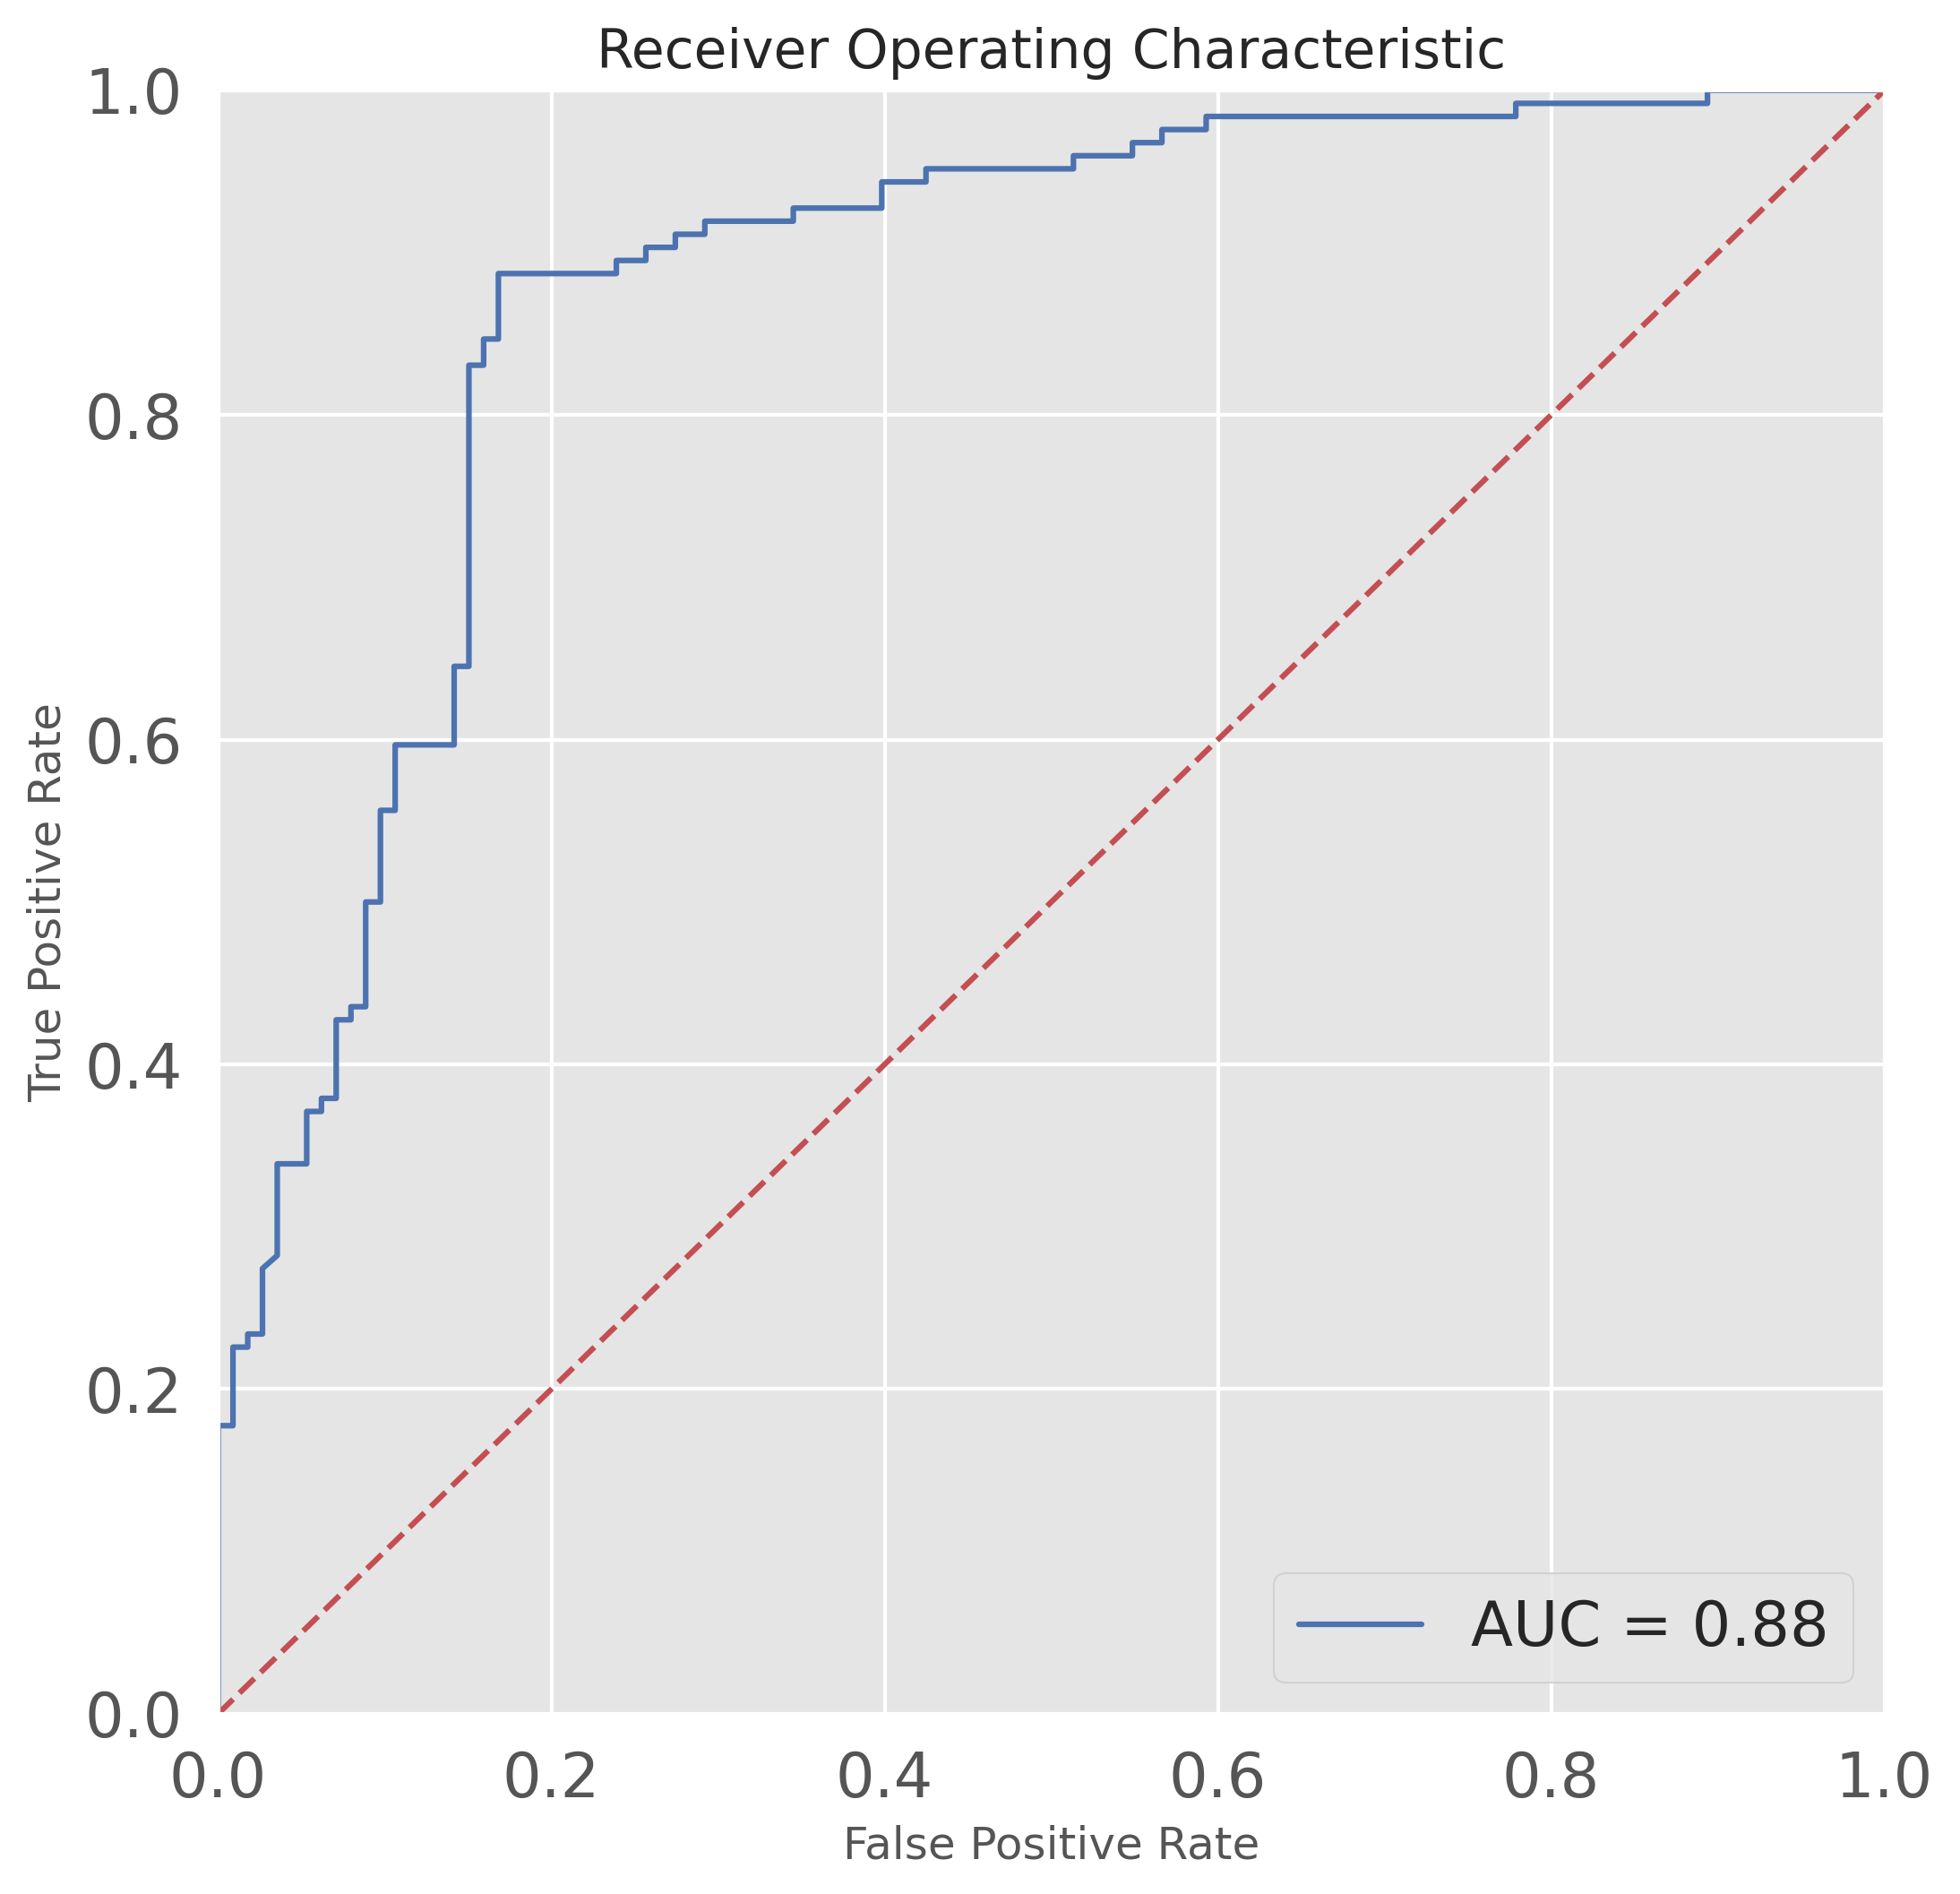

In [27]:
#RERUN FOR EPOCH 2
#bert-base-cased, bert-large-cased, roberta-base, roberta-large, 


roberta_base_train_stats, roberta_base_probs, roberta_base_predicted_labels, roberta_base_true_labels = bert_trainer_validator(bert_train, bert_test,
                                                                           train_model='roberta-base',
                                                                           m_len=260, batch_size=32, 
                                                                           lr_par=5e-5, eps_par=1e-8, 
                                                                           epochs=2, seed_val=42,
                                                                            proce='gpu')

#roberta-base
full_results(roberta_base_train_stats, roberta_base_probs, roberta_base_predicted_labels, roberta_base_true_labels )

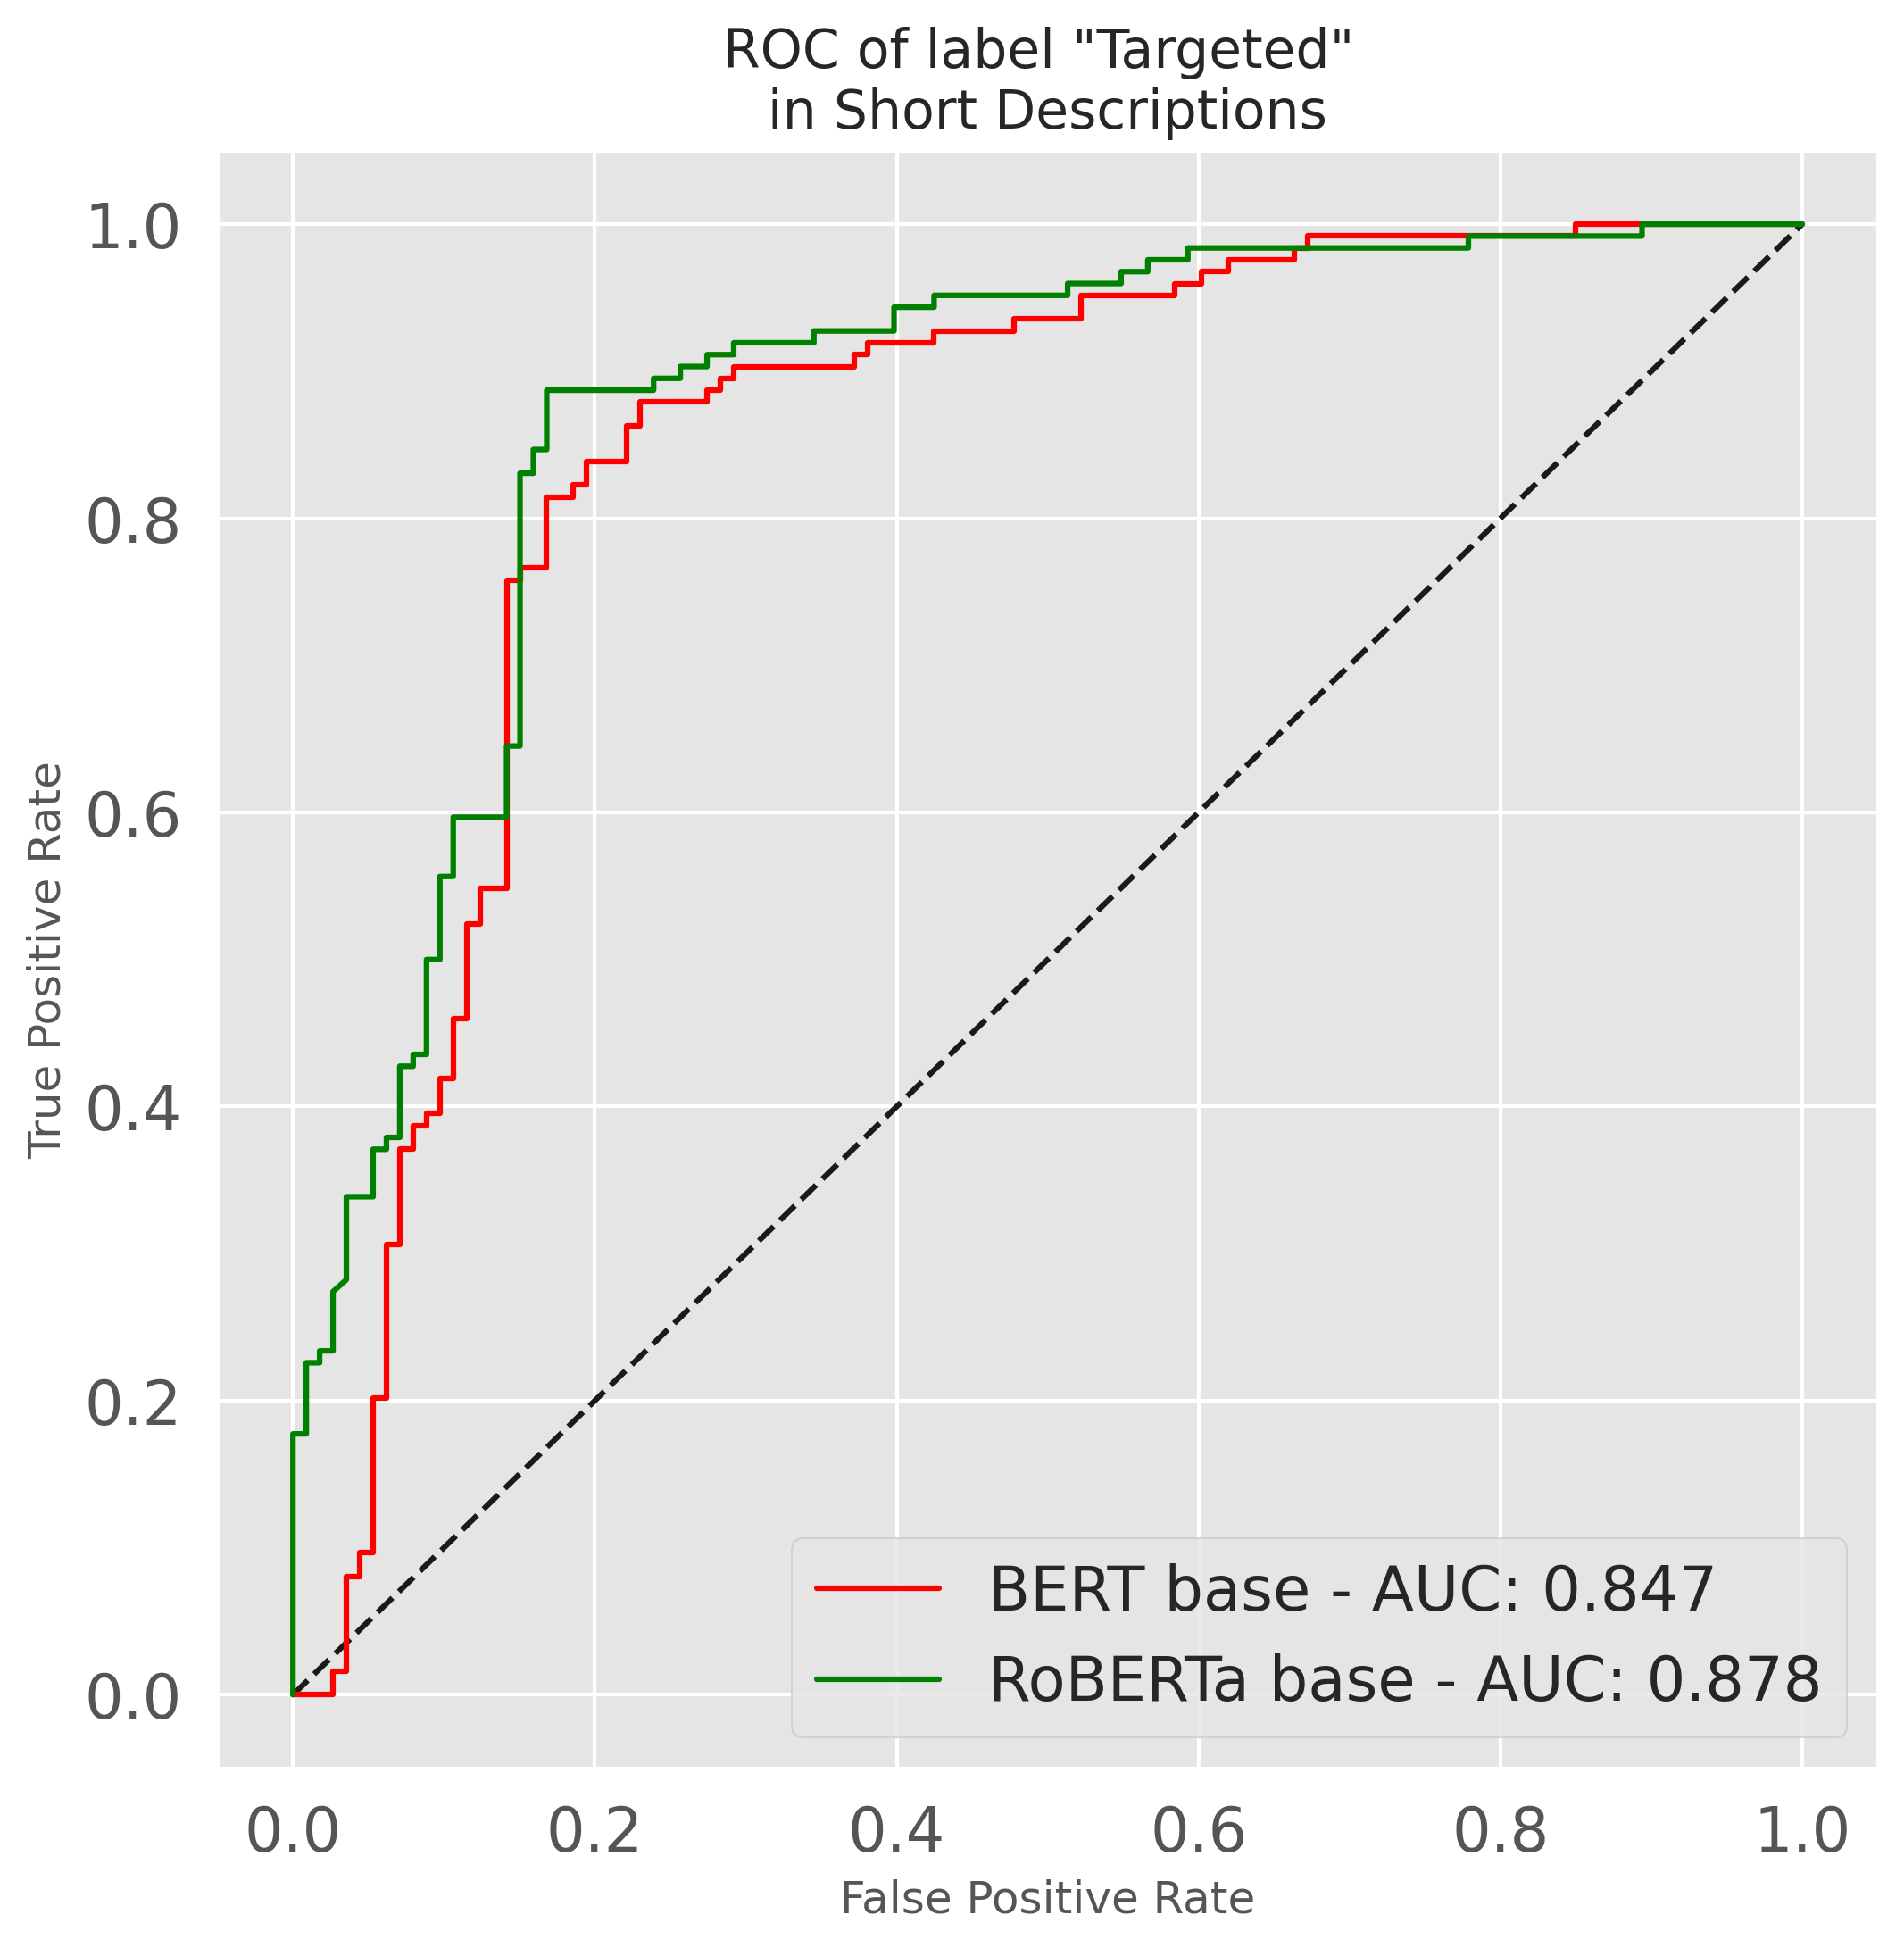

In [28]:
from sklearn import metrics

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 8, 8
plt.rcParams['figure.dpi'] = 300

Y_test =bert_base_true_labels

y_pred_prob1 = bert_base_probs[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(Y_test, y_pred_prob1)
auc1 = round(metrics.roc_auc_score(Y_test, y_pred_prob1), 3)

# y_pred_prob2 = bert_large_probs[:,1]
# fpr2 , tpr2, thresholds2 = roc_curve(Y_test, y_pred_prob2)
# auc2 = round(metrics.roc_auc_score(Y_test, y_pred_prob2), 3)


y_pred_prob3 = roberta_base_probs[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(Y_test, y_pred_prob3)
auc3 = round(metrics.roc_auc_score(Y_test, y_pred_prob3), 3)

# y_pred_prob4 = roberta_large_probs[:,1]
# fpr4 , tpr4, thresholds4 = roc_curve(Y_test, y_pred_prob4)
# auc4 = round(metrics.roc_auc_score(Y_test, y_pred_prob4), 3)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, color='red', label= str("BERT base - AUC: " + str(auc1)))
# plt.plot(fpr2, tpr2, color='blue', label= str("BERT large - AUC: " + str(auc2)))
plt.plot(fpr3, tpr3, color='green' , label= str("RoBERTa base - AUC: " + str(auc3)))
# plt.plot(fpr4, tpr4, color='orange', label= str("RoBERTa large - AUC: " + str(auc4)))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC of label "Targeted" \nin Short Descriptions')
plt.show()

## Targeted - Web Pages

In [29]:
bert_train = pd.read_csv('./data_files/long_tar_train.csv')
bert_test = pd.read_csv('./data_files/long_tar_test.csv')

In [30]:
bert_train = bert_train.loc[:,['ID', 'SPLIT', 'description', 'long_tar_train_label']]
bert_train.columns = ['ID', 'SPLIT', 'sentences', 'label']
bert_train['label'] = bert_train['label'].astype(int)
bert_train.shape

(1105, 4)

In [31]:
bert_train.SPLIT.value_counts()

Long_Train    1105
Name: SPLIT, dtype: int64

In [32]:
bert_train.label.value_counts()

0    808
1    297
Name: label, dtype: int64

In [33]:
bert_test = bert_test.loc[:,['ID', 'SPLIT', 'description', 'long_golden_tar']]
bert_test.columns = ['ID', 'SPLIT', 'sentences', 'label']
bert_test['label'] = bert_test['label'].astype(int)
bert_test.shape

(130, 4)

In [34]:
bert_test.SPLIT.value_counts()

TEST_long    130
Name: SPLIT, dtype: int64

In [35]:
bert_test.label.value_counts()

1    74
0    56
Name: label, dtype: int64

In [36]:
# # args.learning_rate - default is 5e-5, our notebook had 2e-5
# # args.adam_epsilon  - default is 1e-8.
# # Number of training epochs. The BERT authors recommend between 2 and 4. 

# #bert-base-cased, bert-large-cased, roberta-base, roberta-large, 

# train_stats, probs, predicted_labels, true_labels = bert_trainer_validator(bert_train, bert_test,
#                                                                            train_model='bert-base-case',
#                                                                            m_len=200, batch_size=32, 
#                                                                            lr_par=5e-5, eps_par=1e-8, 
#                                                                            epochs=2, seed_val=42)

Tensor's length: 1105 of Long_Train
Tensor's length: 130 of TEST_long


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b


======== Epoch 1 / 4 ========
Training...

  Average training loss: 0.56
  Training epcoh took: 0:00:29

Running Validation...
  Accuracy: 0.79
  Validation Loss: 0.40
  Validation took: 0:00:01

======== Epoch 2 / 4 ========
Training...

  Average training loss: 0.43
  Training epcoh took: 0:00:29

Running Validation...
  Accuracy: 0.88
  Validation Loss: 0.34
  Validation took: 0:00:01

======== Epoch 3 / 4 ========
Training...

  Average training loss: 0.27
  Training epcoh took: 0:00:29

Running Validation...
  Accuracy: 0.83
  Validation Loss: 0.42
  Validation took: 0:00:01

======== Epoch 4 / 4 ========
Training...

  Average training loss: 0.17
  Training epcoh took: 0:00:29

Running Validation...
  Accuracy: 0.80
  Validation Loss: 0.50
  Validation took: 0:00:01

Training complete!
Total training took 0:02:01 (h:mm:ss)
 PREDICTION DONE.
       Training Loss  Valid. Loss  Valid. Accur. Training Time Validation Time
epoch                                                        

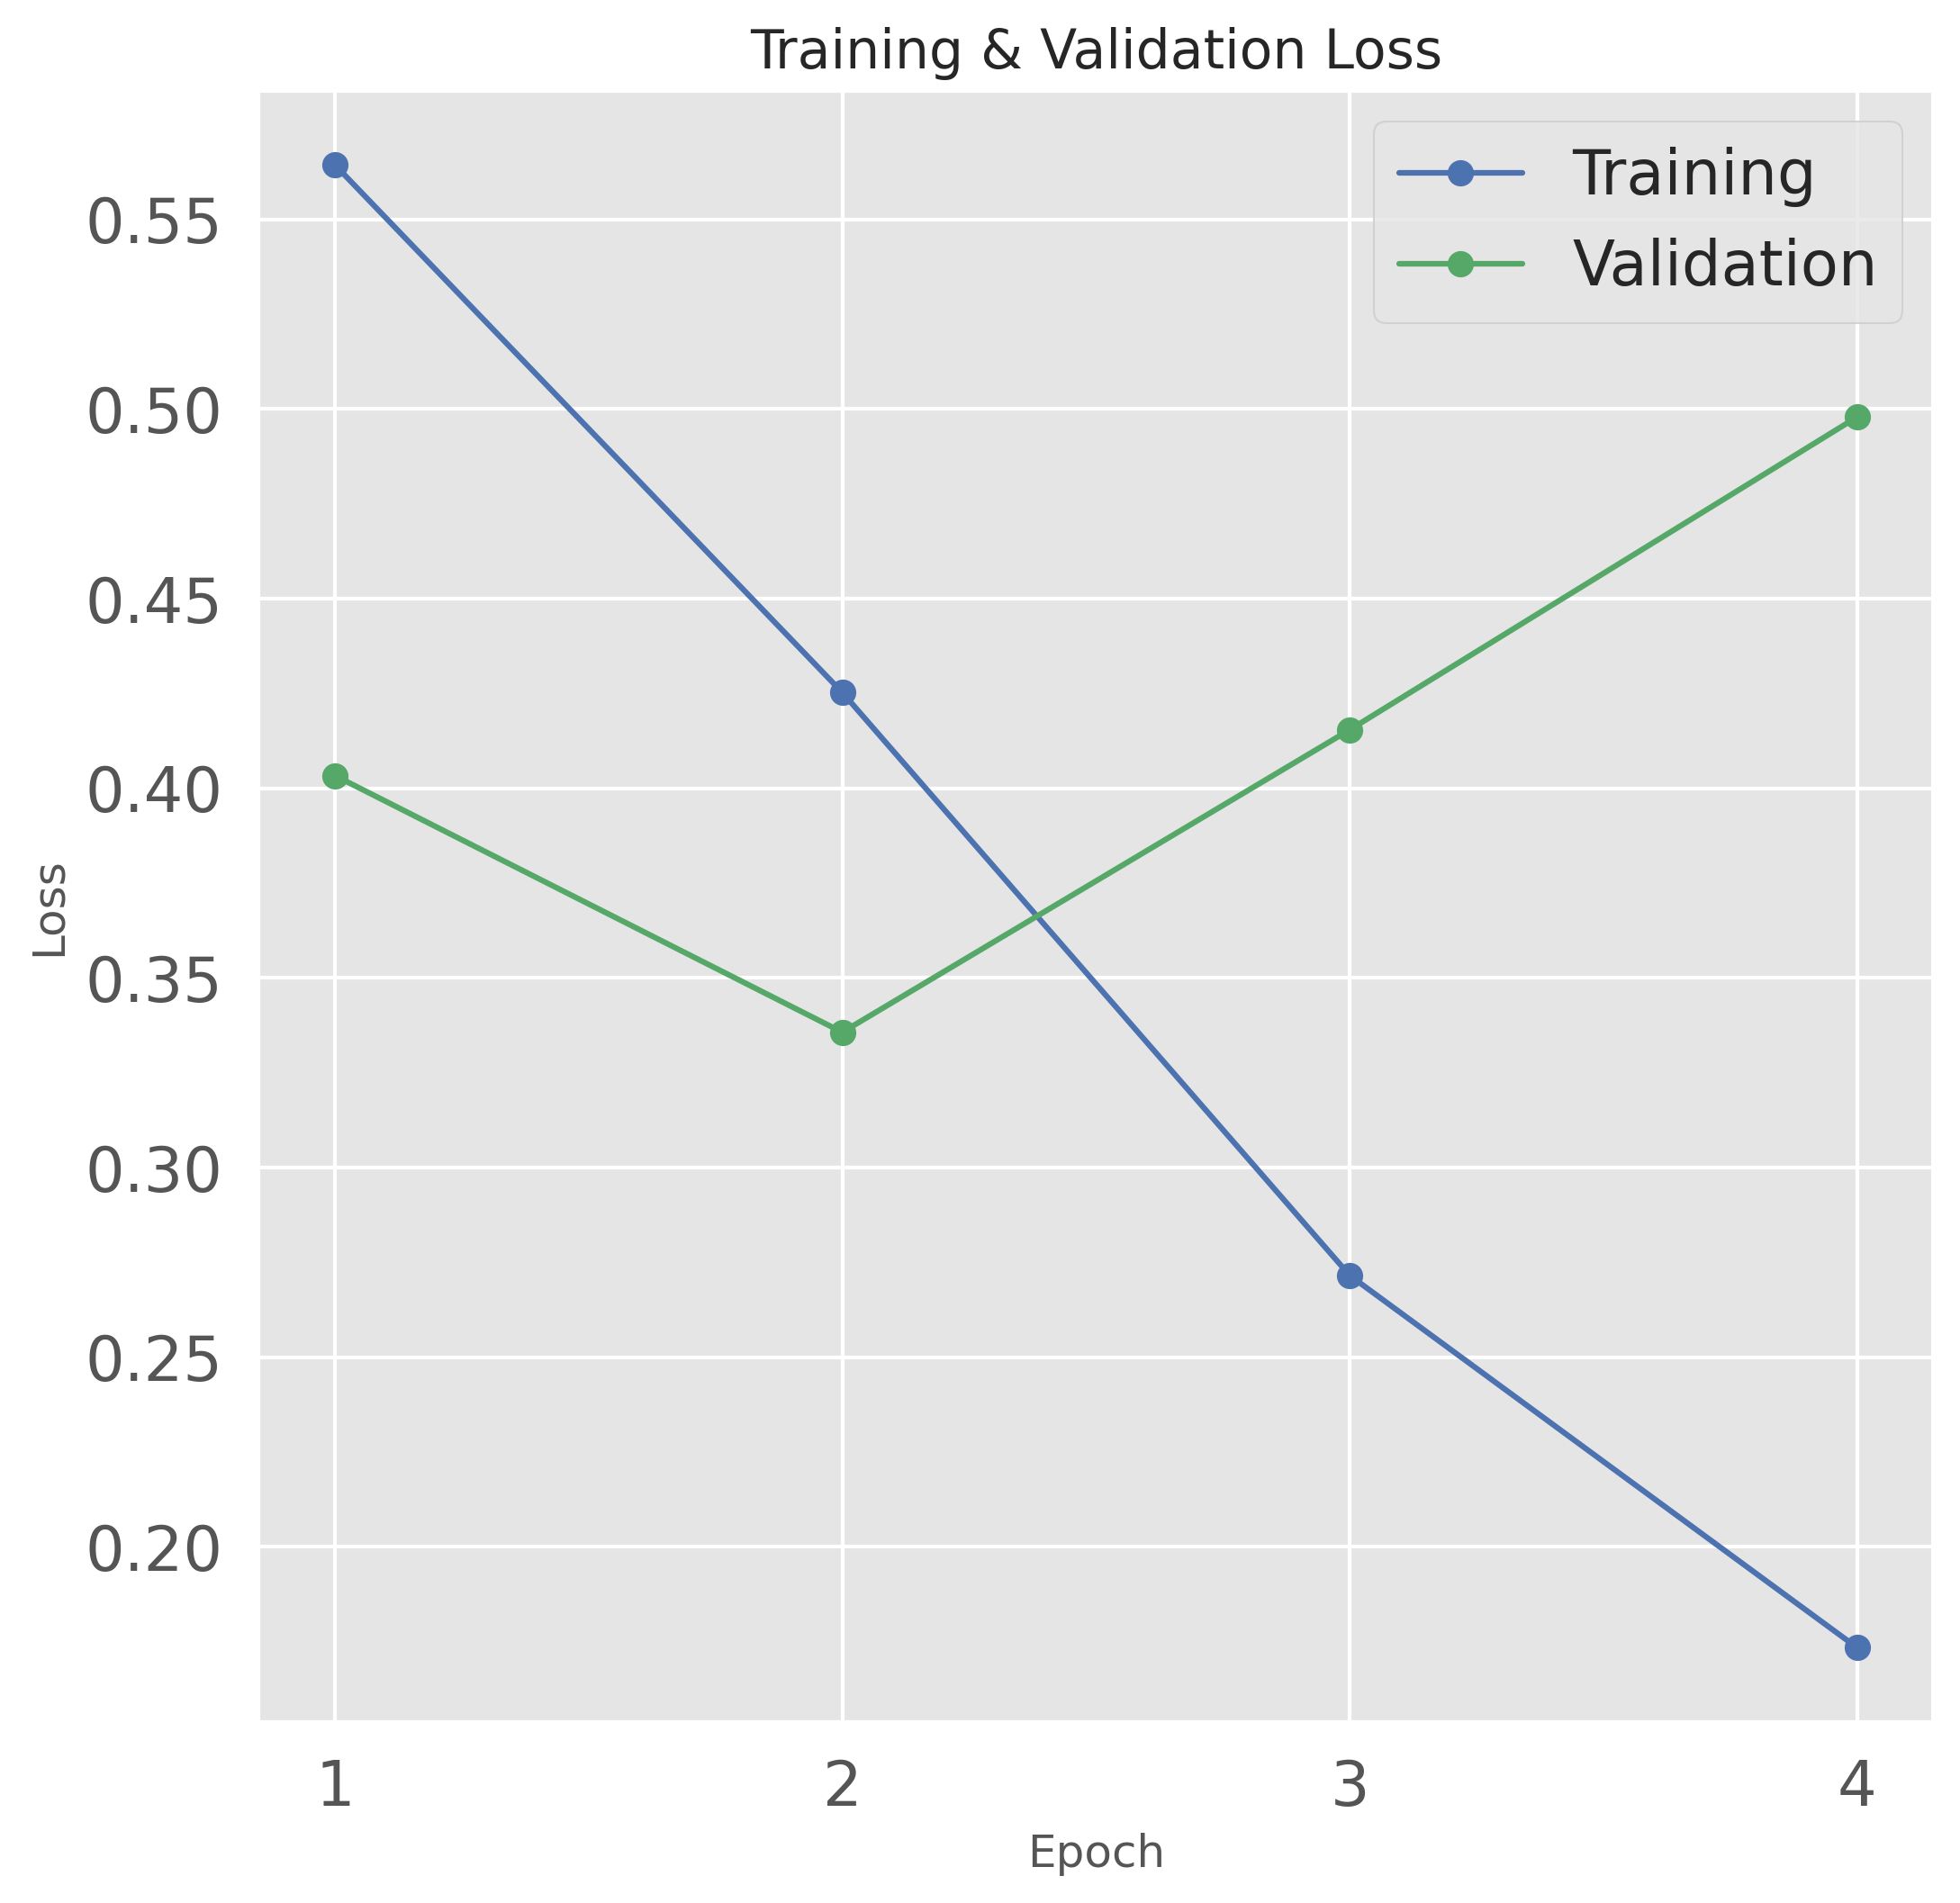

              precision    recall  f1-score   support

           0       0.91      0.57      0.70        90
           1       0.47      0.88      0.61        40

    accuracy                           0.66       130
   macro avg       0.69      0.72      0.66       130
weighted avg       0.78      0.66      0.67       130

AUC: 0.7869
Accuracy: 66.15%


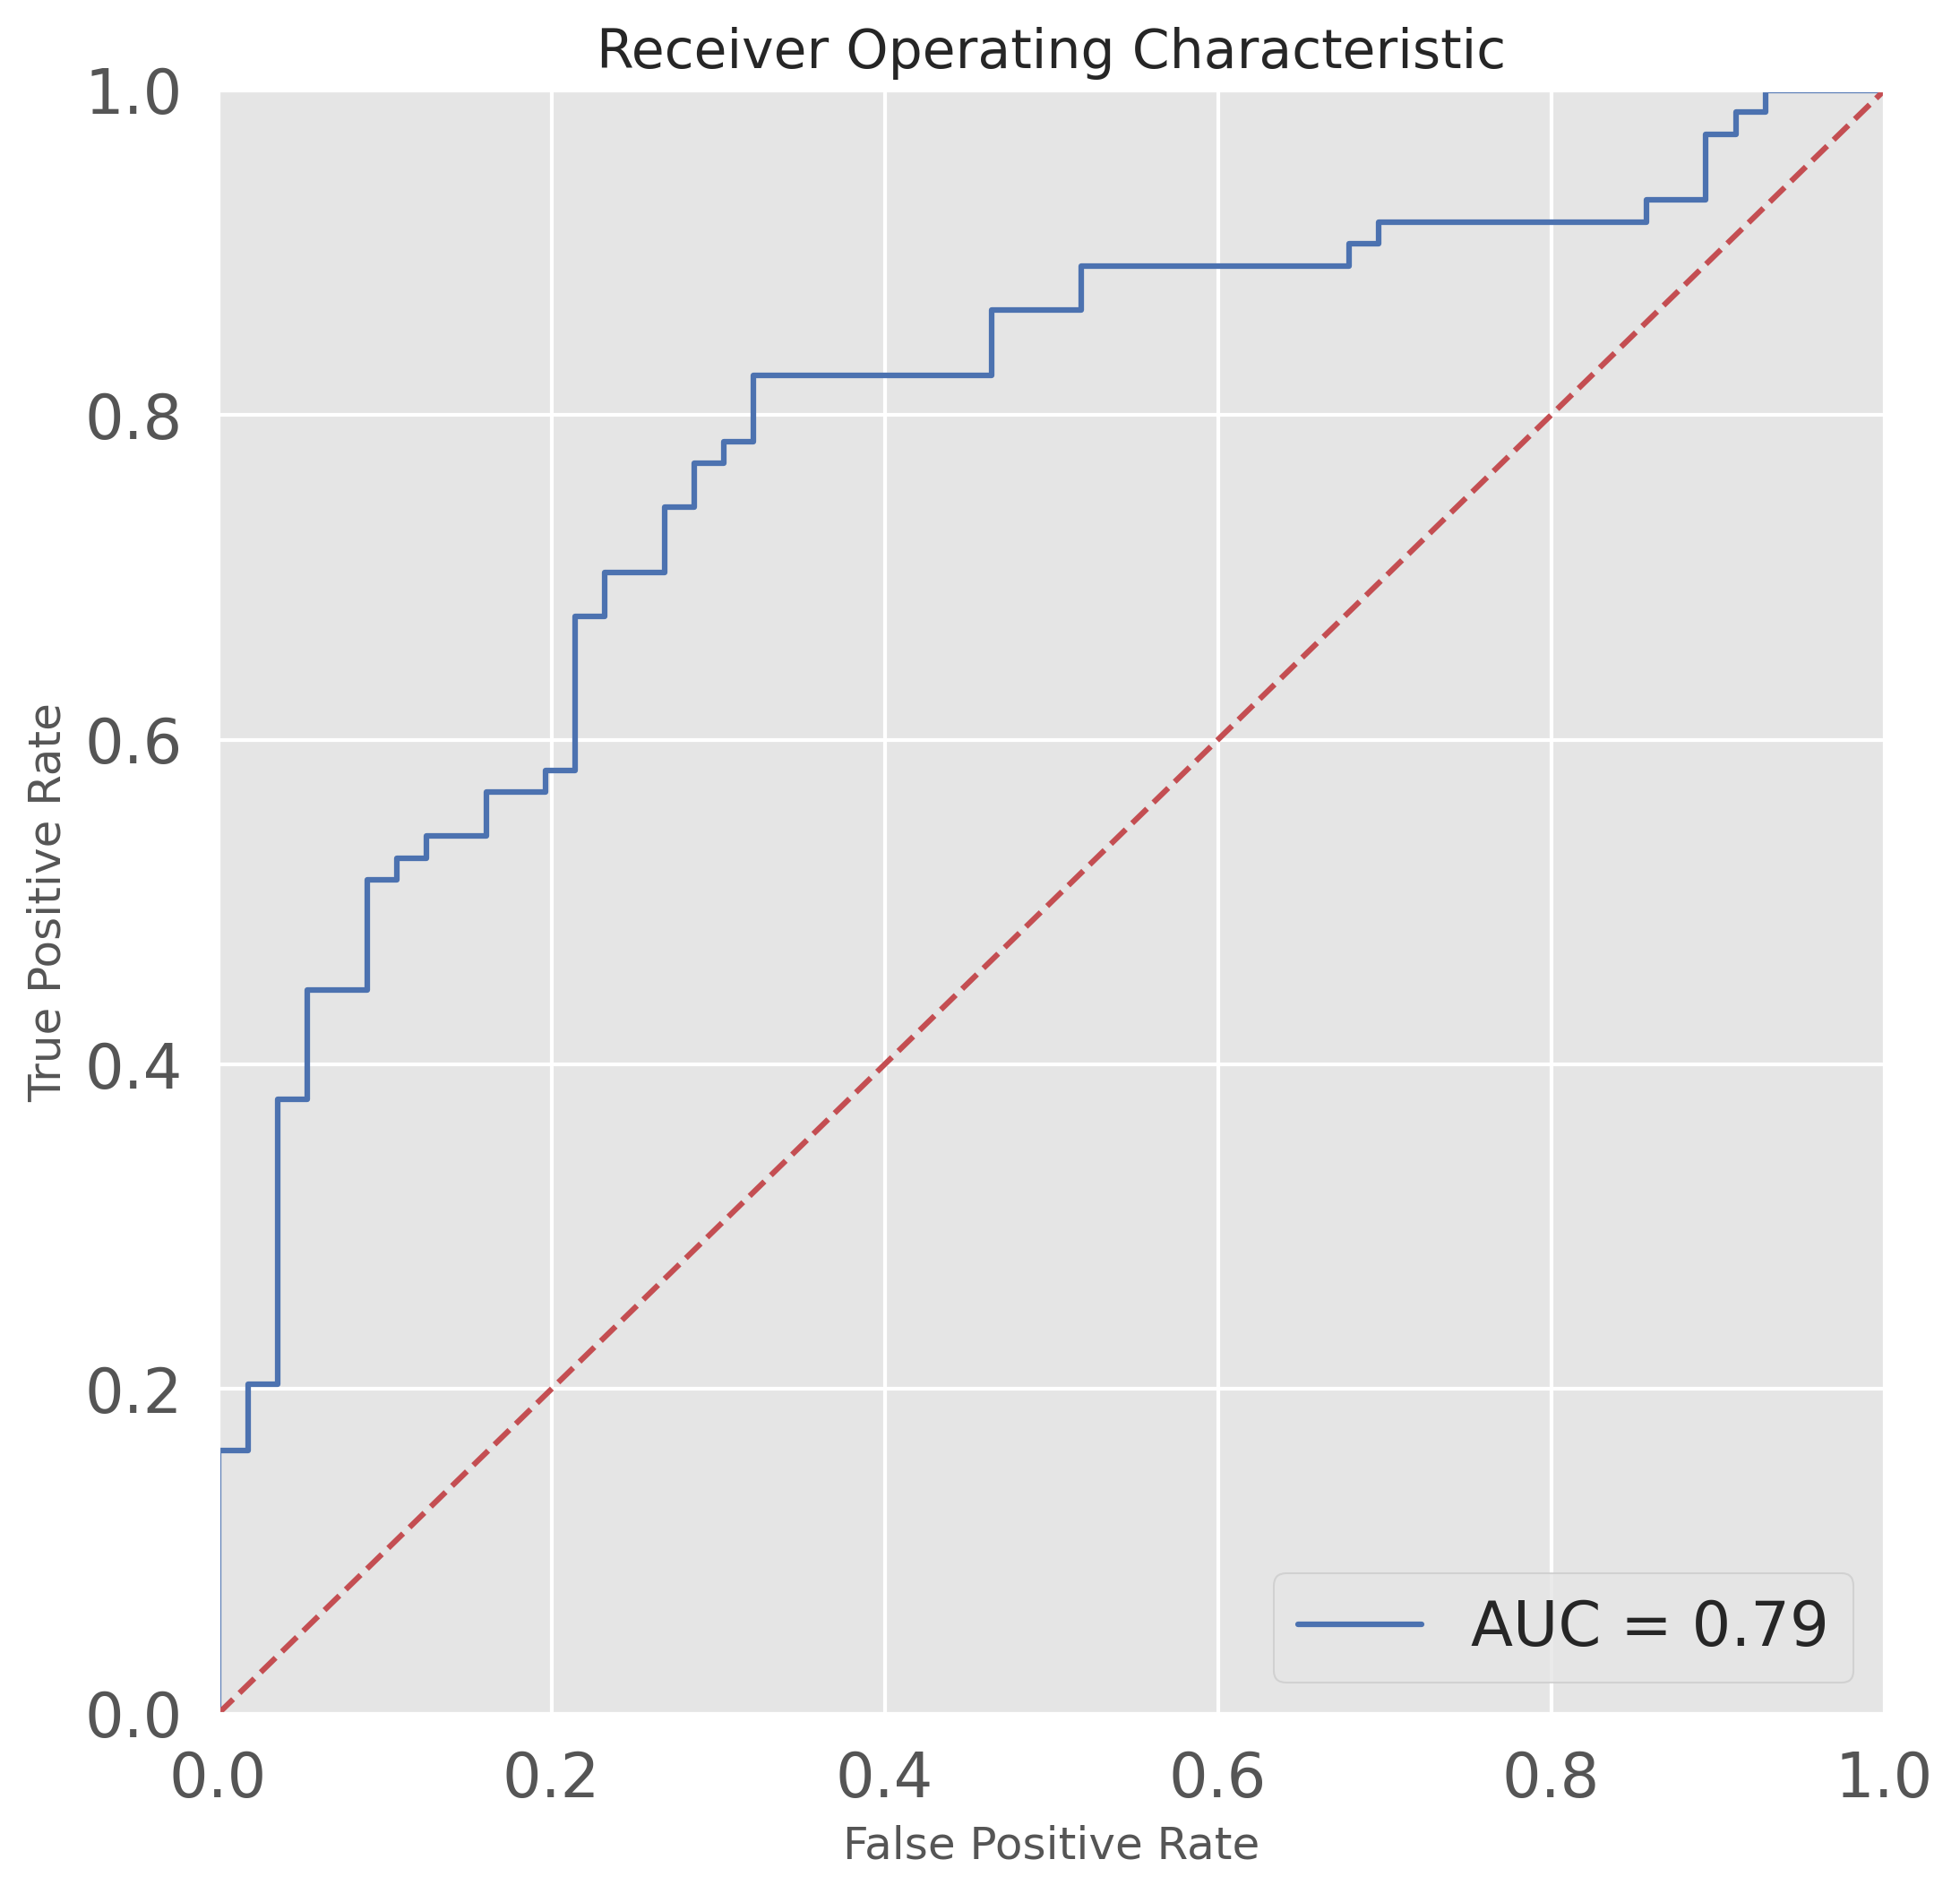

In [38]:
#bert-base-cased, bert-large-cased, roberta-base, roberta-large, 

bert_base_train_stats, bert_base_probs, bert_base_predicted_labels, bert_base_true_labels = bert_trainer_validator(
                                                                            bert_train, bert_test,
                                                                           train_model='bert-base-cased',
                                                                           m_len=300, batch_size=32, 
                                                                           lr_par=5e-5, eps_par=1e-8, 
                                                                           epochs=4, seed_val=42,
                                                                            proce='gpu'  )

#bert-base-cased
full_results(bert_base_train_stats, bert_base_probs, bert_base_predicted_labels, bert_base_true_labels)

Tensor's length: 1105 of Long_Train
Tensor's length: 130 of TEST_long


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b


======== Epoch 1 / 2 ========
Training...

  Average training loss: 0.56
  Training epcoh took: 0:00:29

Running Validation...
  Accuracy: 0.76
  Validation Loss: 0.54
  Validation took: 0:00:01

======== Epoch 2 / 2 ========
Training...

  Average training loss: 0.44
  Training epcoh took: 0:00:29

Running Validation...
  Accuracy: 0.81
  Validation Loss: 0.50
  Validation took: 0:00:01

Training complete!
Total training took 0:01:00 (h:mm:ss)
 PREDICTION DONE.
       Training Loss  Valid. Loss  Valid. Accur. Training Time Validation Time
epoch                                                                         
1           0.560675     0.537979       0.761458       0:00:29         0:00:01
2           0.441764     0.503780       0.810417       0:00:29         0:00:01


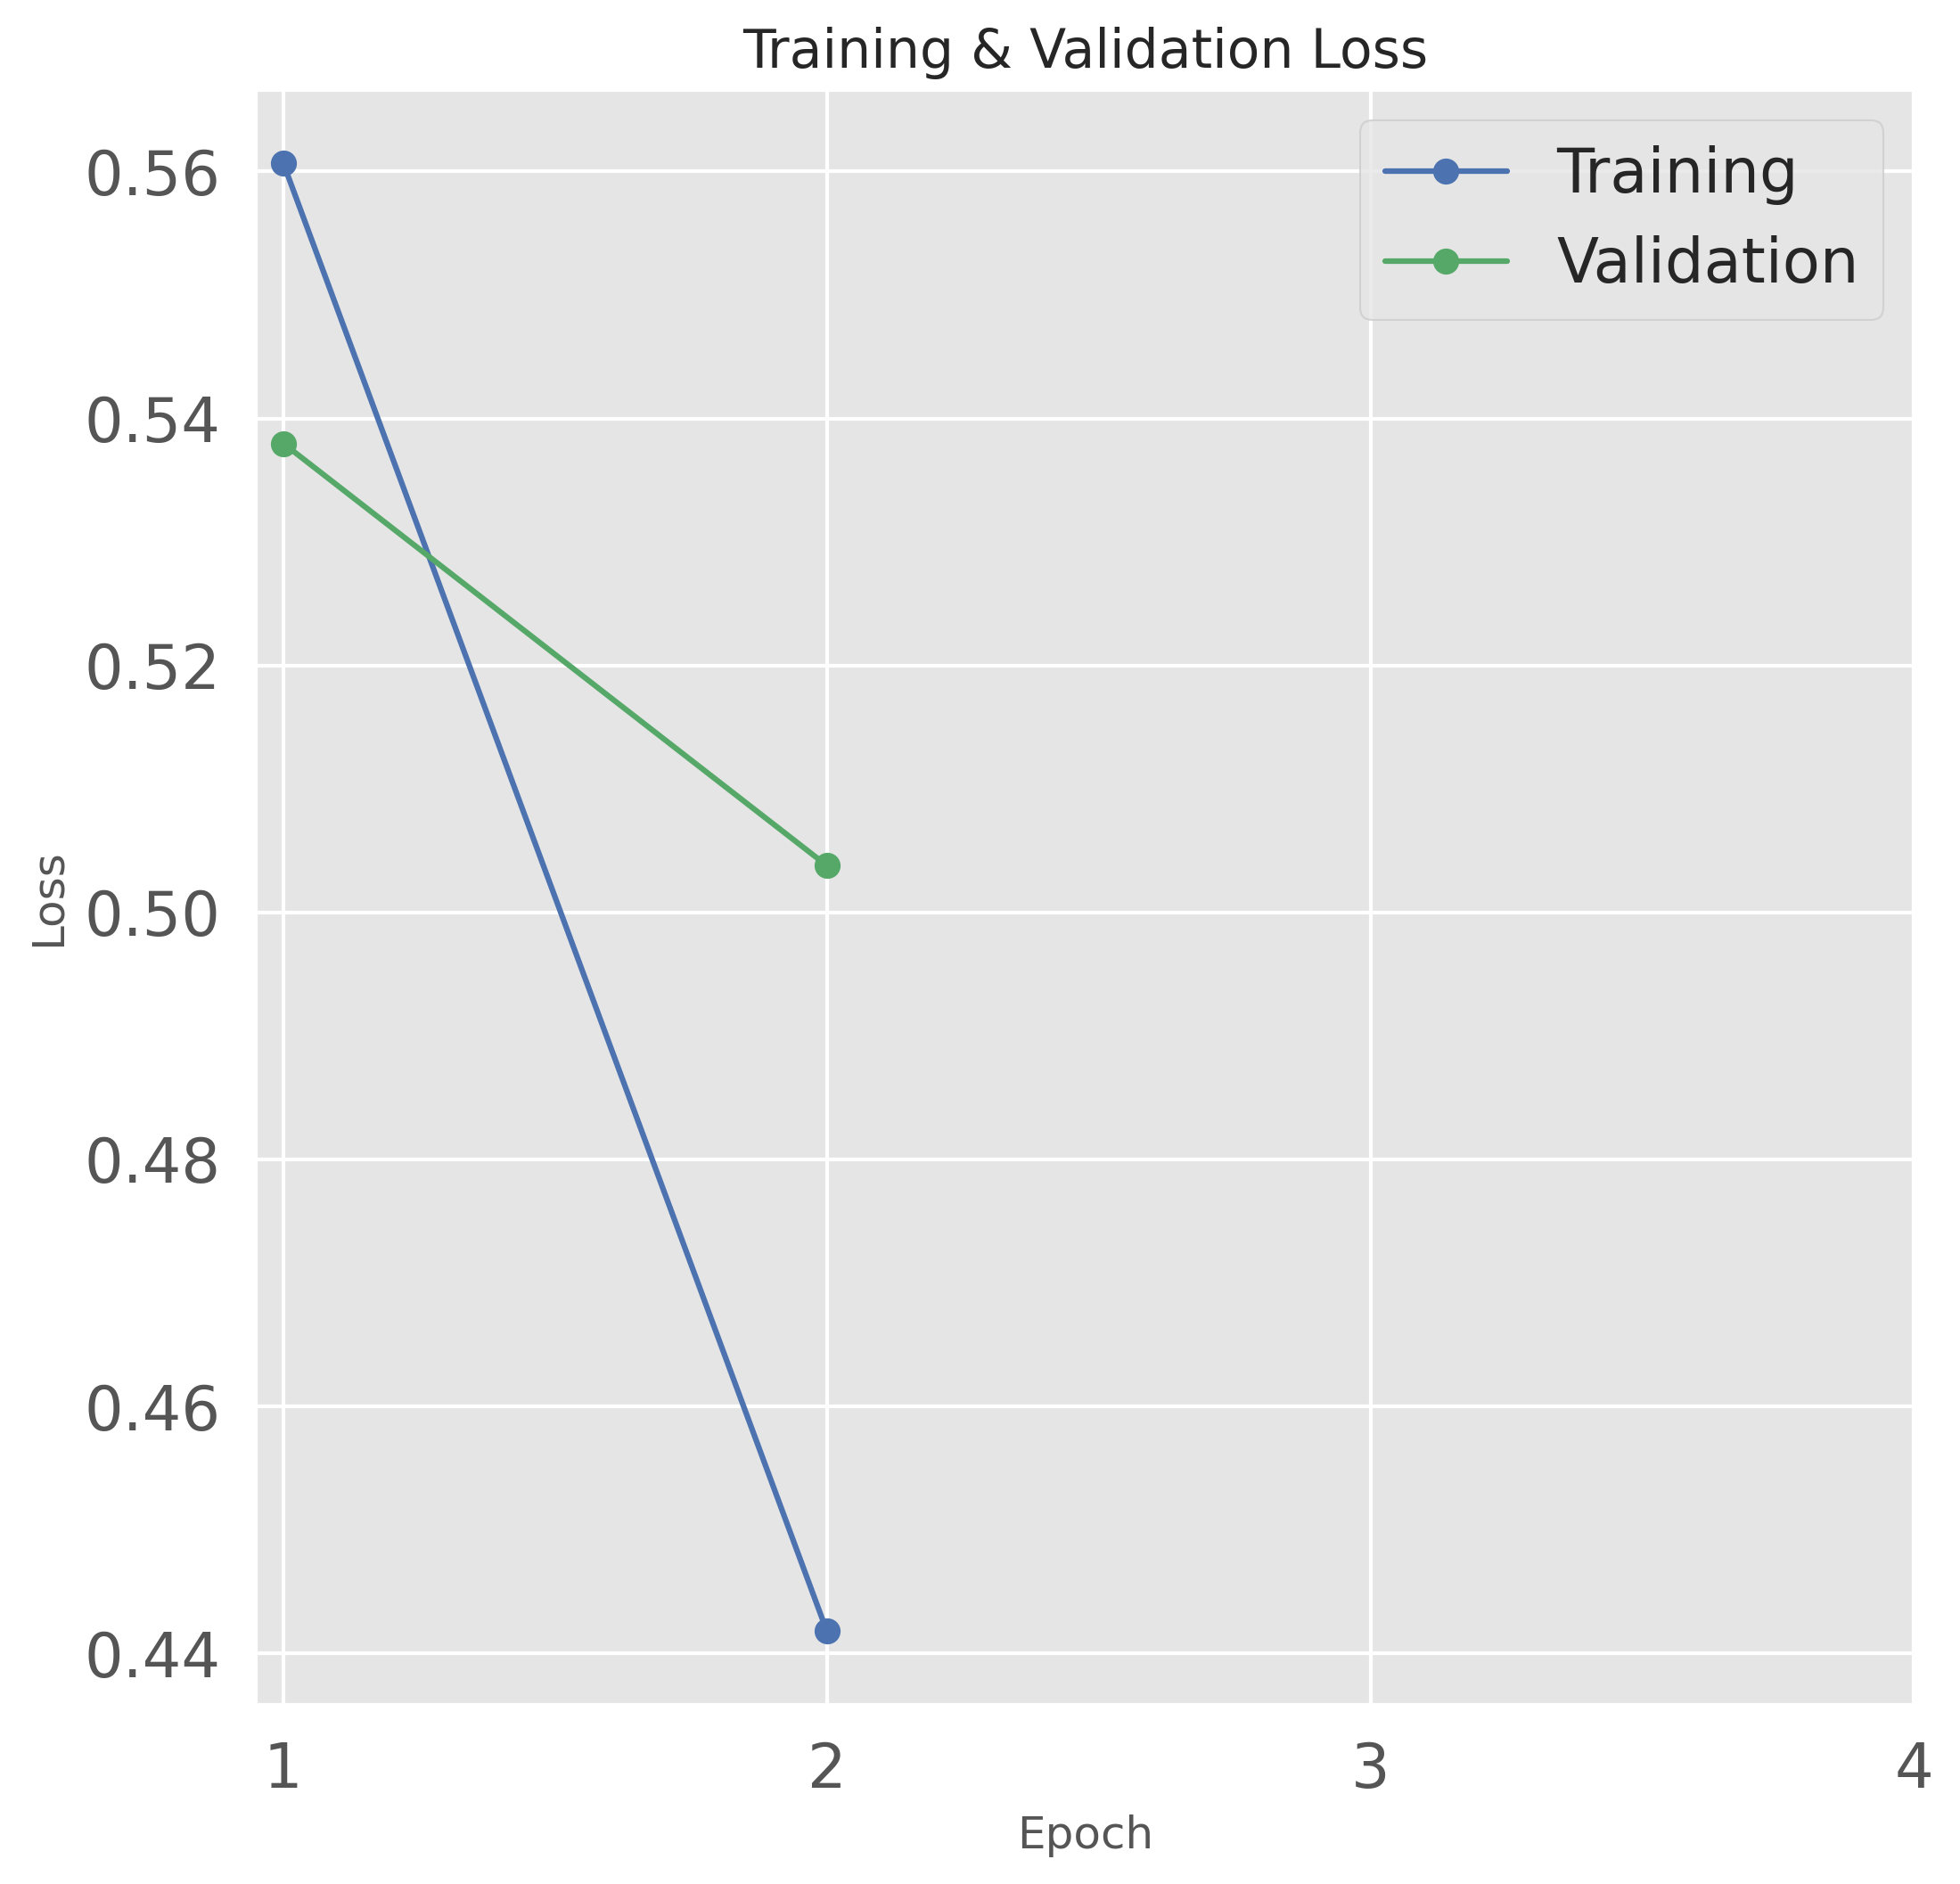

              precision    recall  f1-score   support

           0       0.96      0.59      0.73        91
           1       0.50      0.95      0.65        39

    accuracy                           0.70       130
   macro avg       0.73      0.77      0.69       130
weighted avg       0.82      0.70      0.71       130

AUC: 0.8154
Accuracy: 70.00%


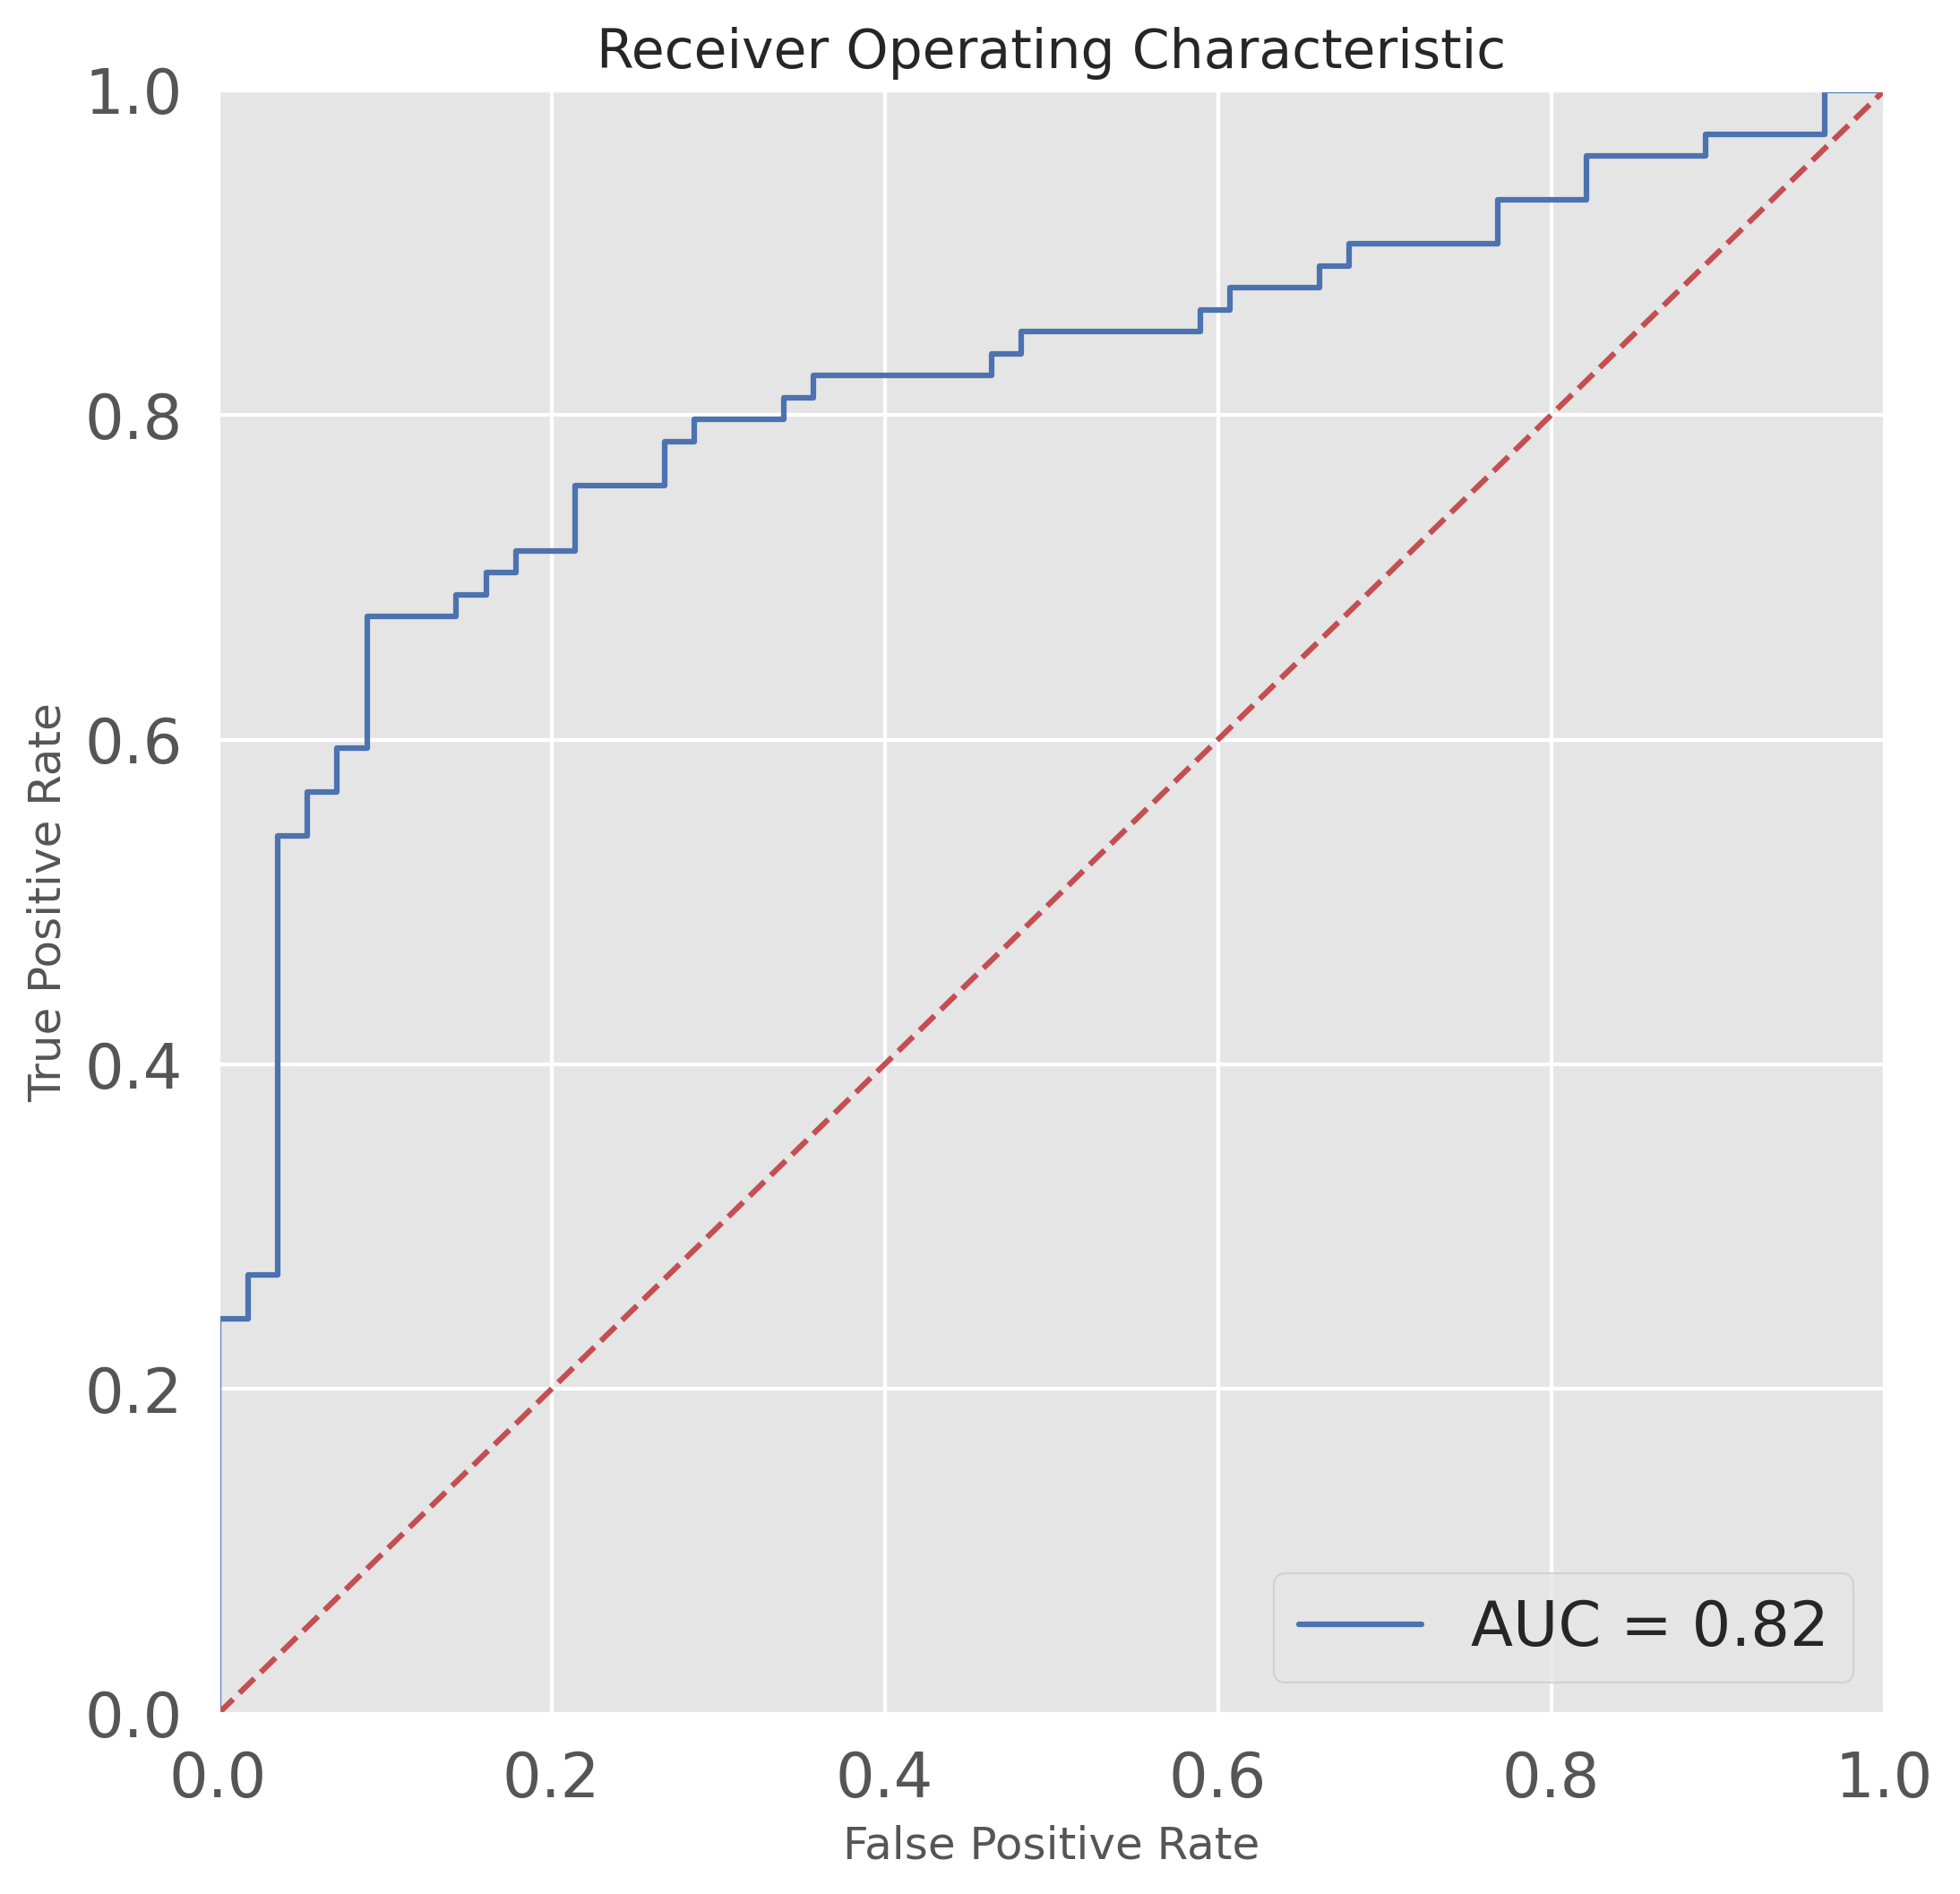

In [39]:
#RERUN EPOCH 2
#bert-base-cased, bert-large-cased, roberta-base, roberta-large, 

bert_base_train_stats, bert_base_probs, bert_base_predicted_labels, bert_base_true_labels = bert_trainer_validator(
                                                                            bert_train, bert_test,
                                                                           train_model='bert-base-cased',
                                                                           m_len=300, batch_size=32, 
                                                                           lr_par=5e-5, eps_par=1e-8, 
                                                                           epochs=2, seed_val=42,
                                                                            proce='gpu'  )

#bert-base-cased
full_results(bert_base_train_stats, bert_base_probs, bert_base_predicted_labels, bert_base_true_labels)

Tensor's length: 1105 of Long_Train
Tensor's length: 130 of TEST_long


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out


======== Epoch 1 / 4 ========
Training...

  Average training loss: 0.56
  Training epcoh took: 0:00:29

Running Validation...
  Accuracy: 0.81
  Validation Loss: 0.44
  Validation took: 0:00:01

======== Epoch 2 / 4 ========
Training...

  Average training loss: 0.42
  Training epcoh took: 0:00:29

Running Validation...
  Accuracy: 0.88
  Validation Loss: 0.27
  Validation took: 0:00:01

======== Epoch 3 / 4 ========
Training...

  Average training loss: 0.33
  Training epcoh took: 0:00:29

Running Validation...
  Accuracy: 0.86
  Validation Loss: 0.32
  Validation took: 0:00:01

======== Epoch 4 / 4 ========
Training...

  Average training loss: 0.25
  Training epcoh took: 0:00:29

Running Validation...
  Accuracy: 0.89
  Validation Loss: 0.32
  Validation took: 0:00:01

Training complete!
Total training took 0:02:01 (h:mm:ss)
 PREDICTION DONE.
       Training Loss  Valid. Loss  Valid. Accur. Training Time Validation Time
epoch                                                        

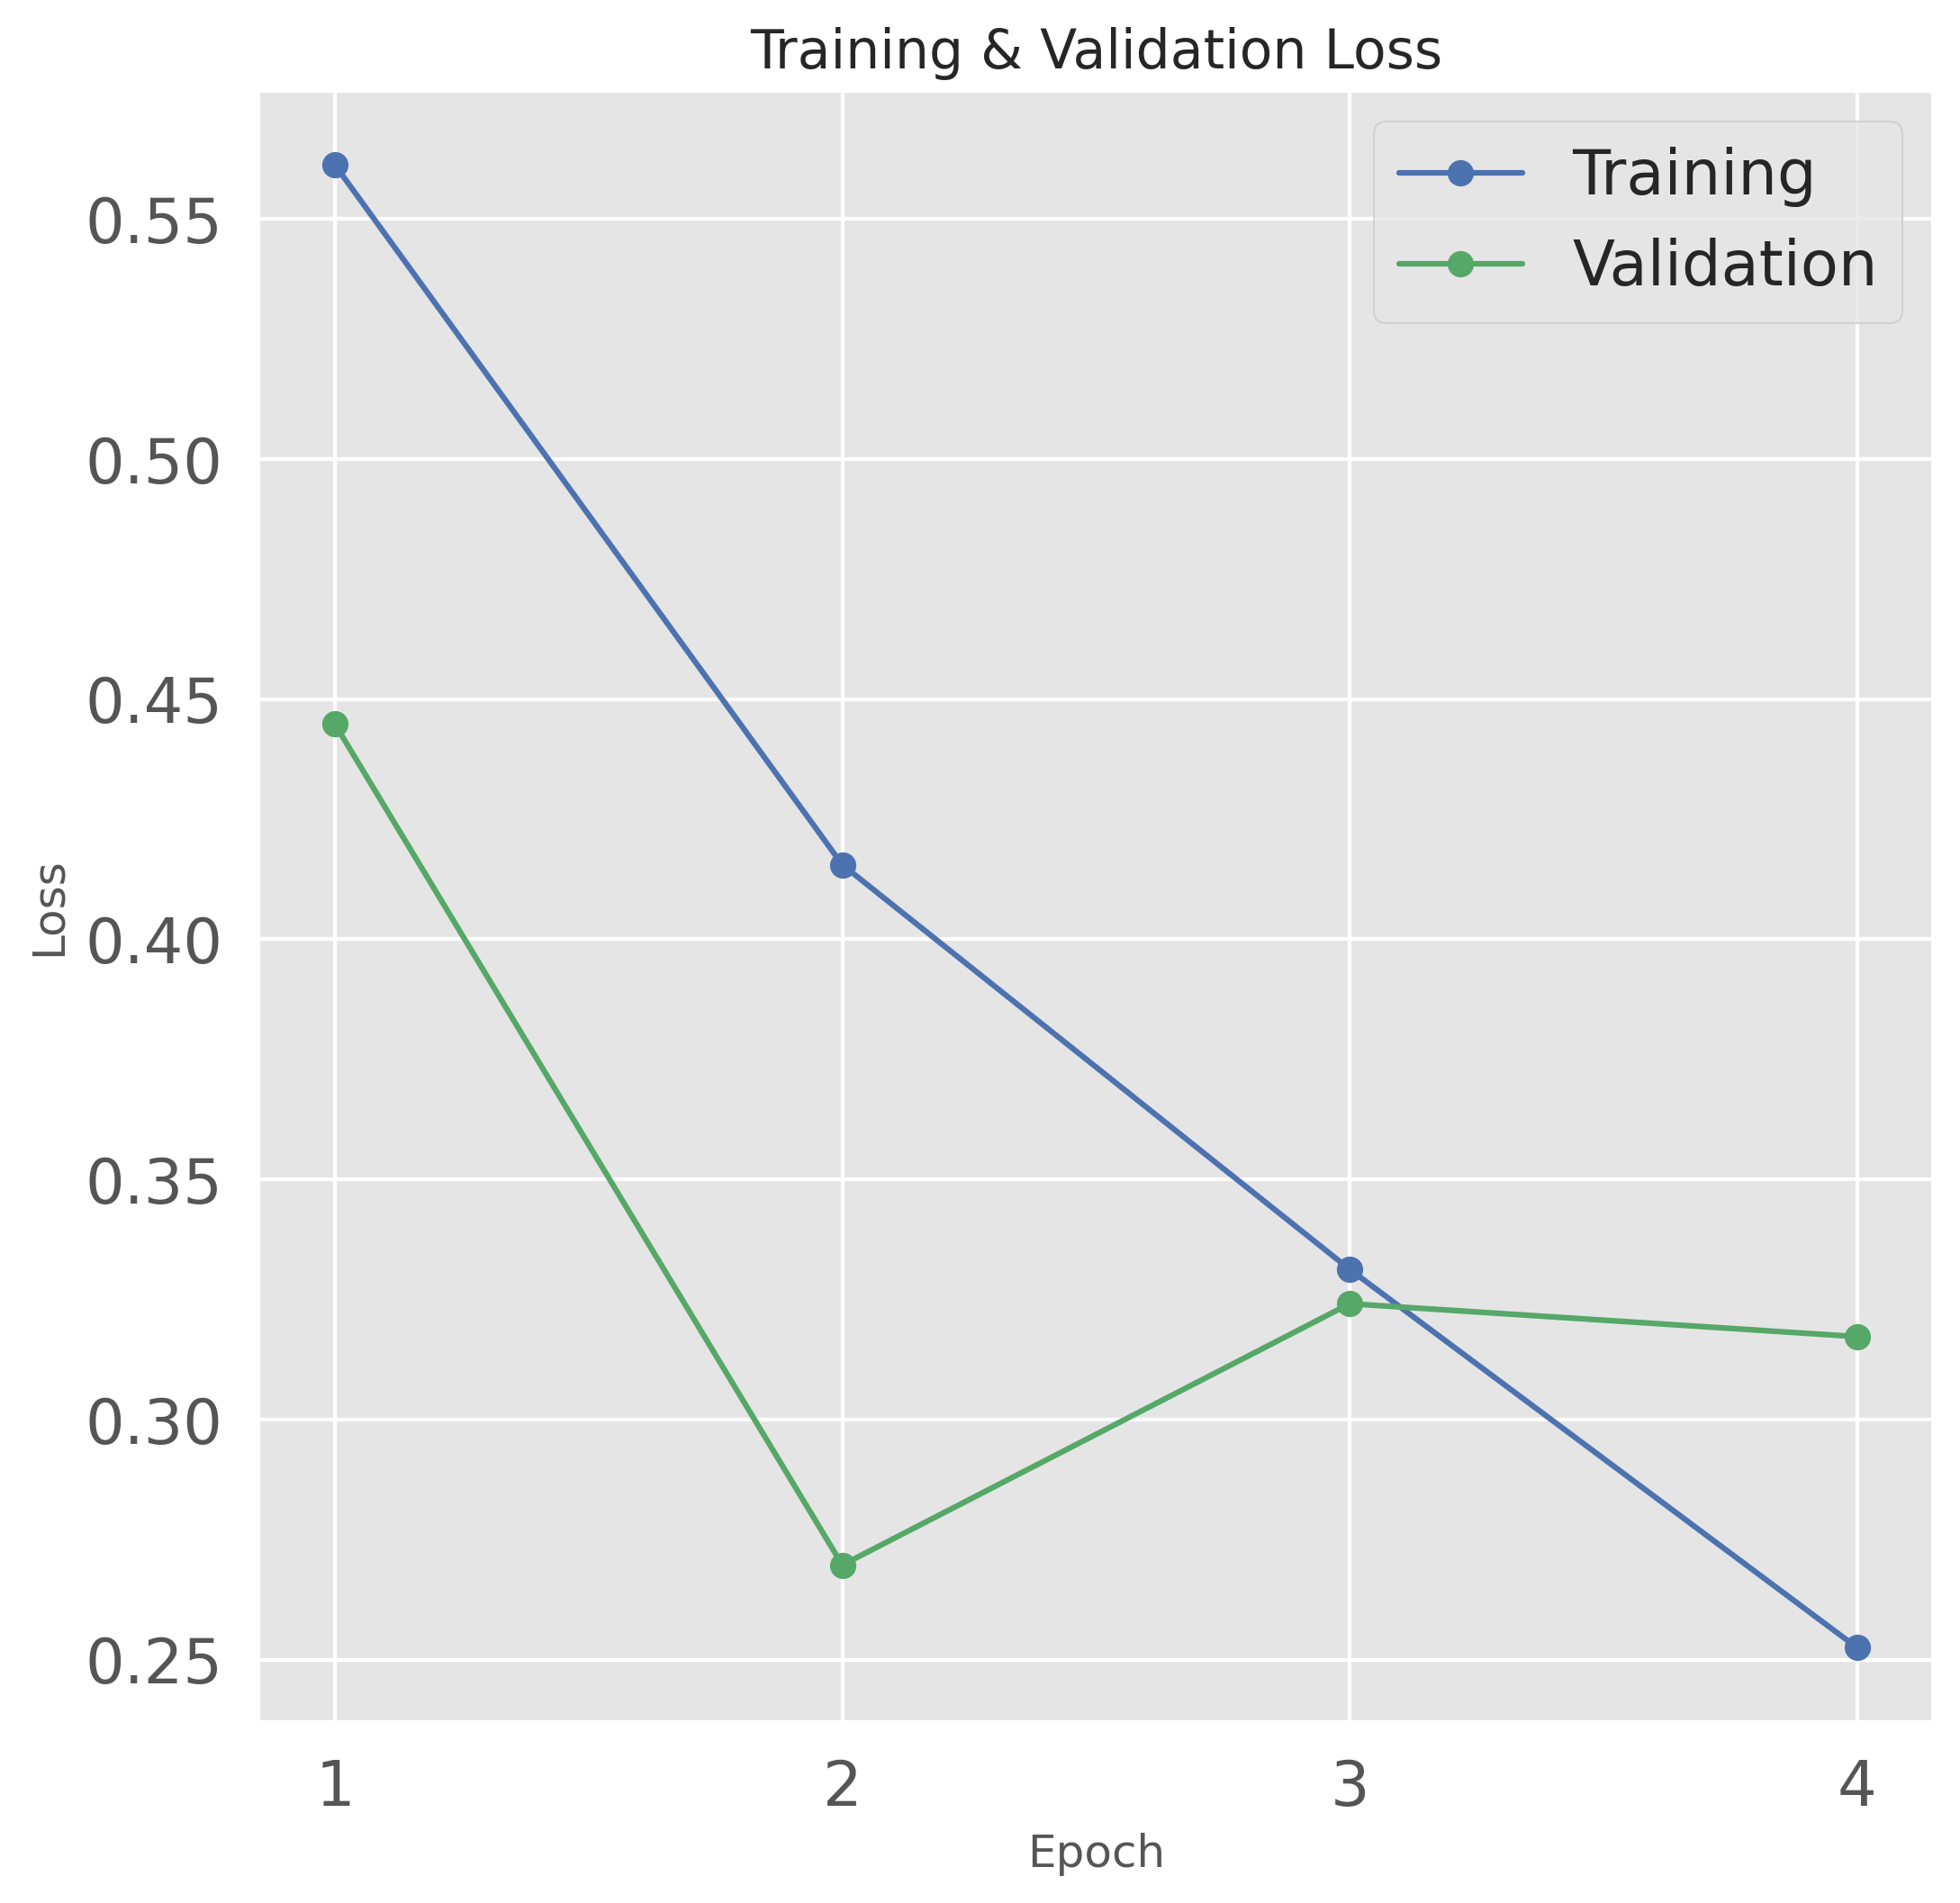

              precision    recall  f1-score   support

           0       0.86      0.62      0.72        77
           1       0.61      0.85      0.71        53

    accuracy                           0.72       130
   macro avg       0.73      0.74      0.72       130
weighted avg       0.76      0.72      0.72       130

AUC: 0.7785
Accuracy: 71.54%


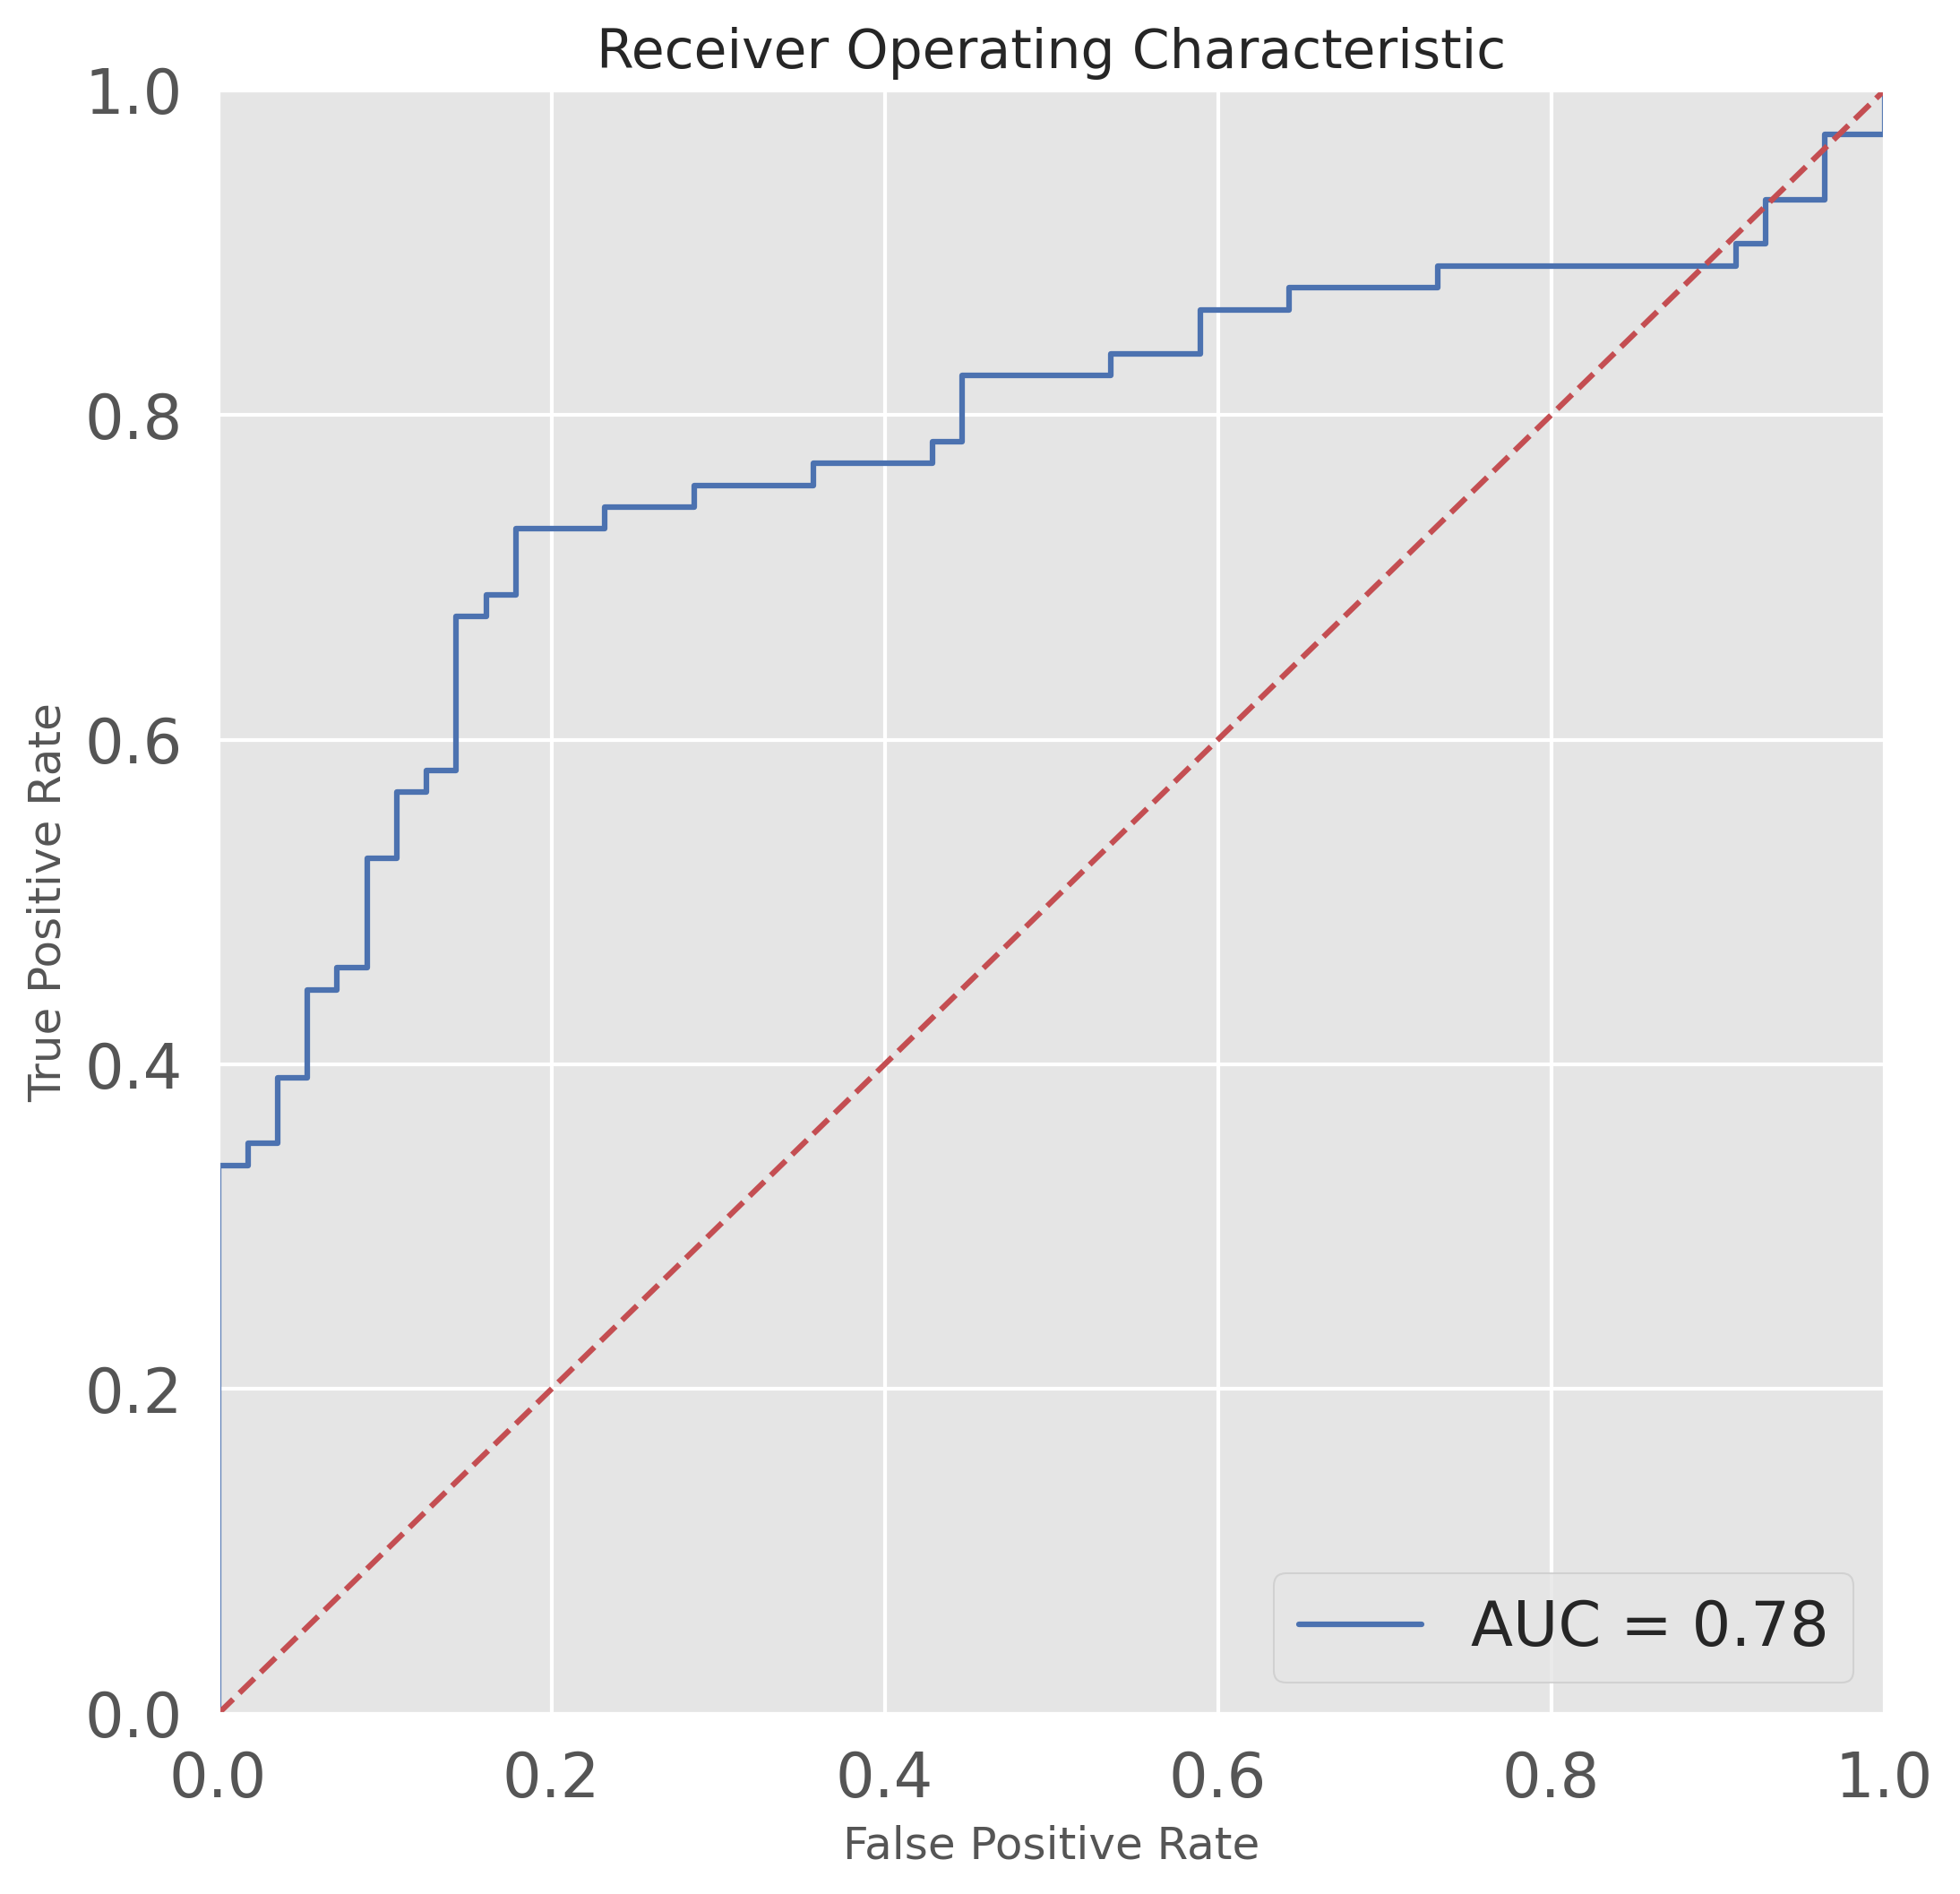

In [40]:
#bert-base-cased, bert-large-cased, roberta-base, roberta-large, 


roberta_base_train_stats, roberta_base_probs, roberta_base_predicted_labels, roberta_base_true_labels = bert_trainer_validator(bert_train, bert_test,
                                                                           train_model='roberta-base',
                                                                           m_len=300, batch_size=32, 
                                                                           lr_par=5e-5, eps_par=1e-8, 
                                                                           epochs=4, seed_val=42,
                                                                            proce='gpu')

#roberta-base
full_results(roberta_base_train_stats, roberta_base_probs, roberta_base_predicted_labels, roberta_base_true_labels )

Tensor's length: 1105 of Long_Train
Tensor's length: 130 of TEST_long


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out


======== Epoch 1 / 2 ========
Training...

  Average training loss: 0.53
  Training epcoh took: 0:00:29

Running Validation...
  Accuracy: 0.78
  Validation Loss: 0.47
  Validation took: 0:00:01

======== Epoch 2 / 2 ========
Training...

  Average training loss: 0.37
  Training epcoh took: 0:00:29

Running Validation...
  Accuracy: 0.78
  Validation Loss: 0.45
  Validation took: 0:00:01

Training complete!
Total training took 0:01:01 (h:mm:ss)
 PREDICTION DONE.
       Training Loss  Valid. Loss  Valid. Accur. Training Time Validation Time
epoch                                                                         
1           0.529713     0.472768       0.777083       0:00:29         0:00:01
2           0.371248     0.448041       0.784896       0:00:29         0:00:01


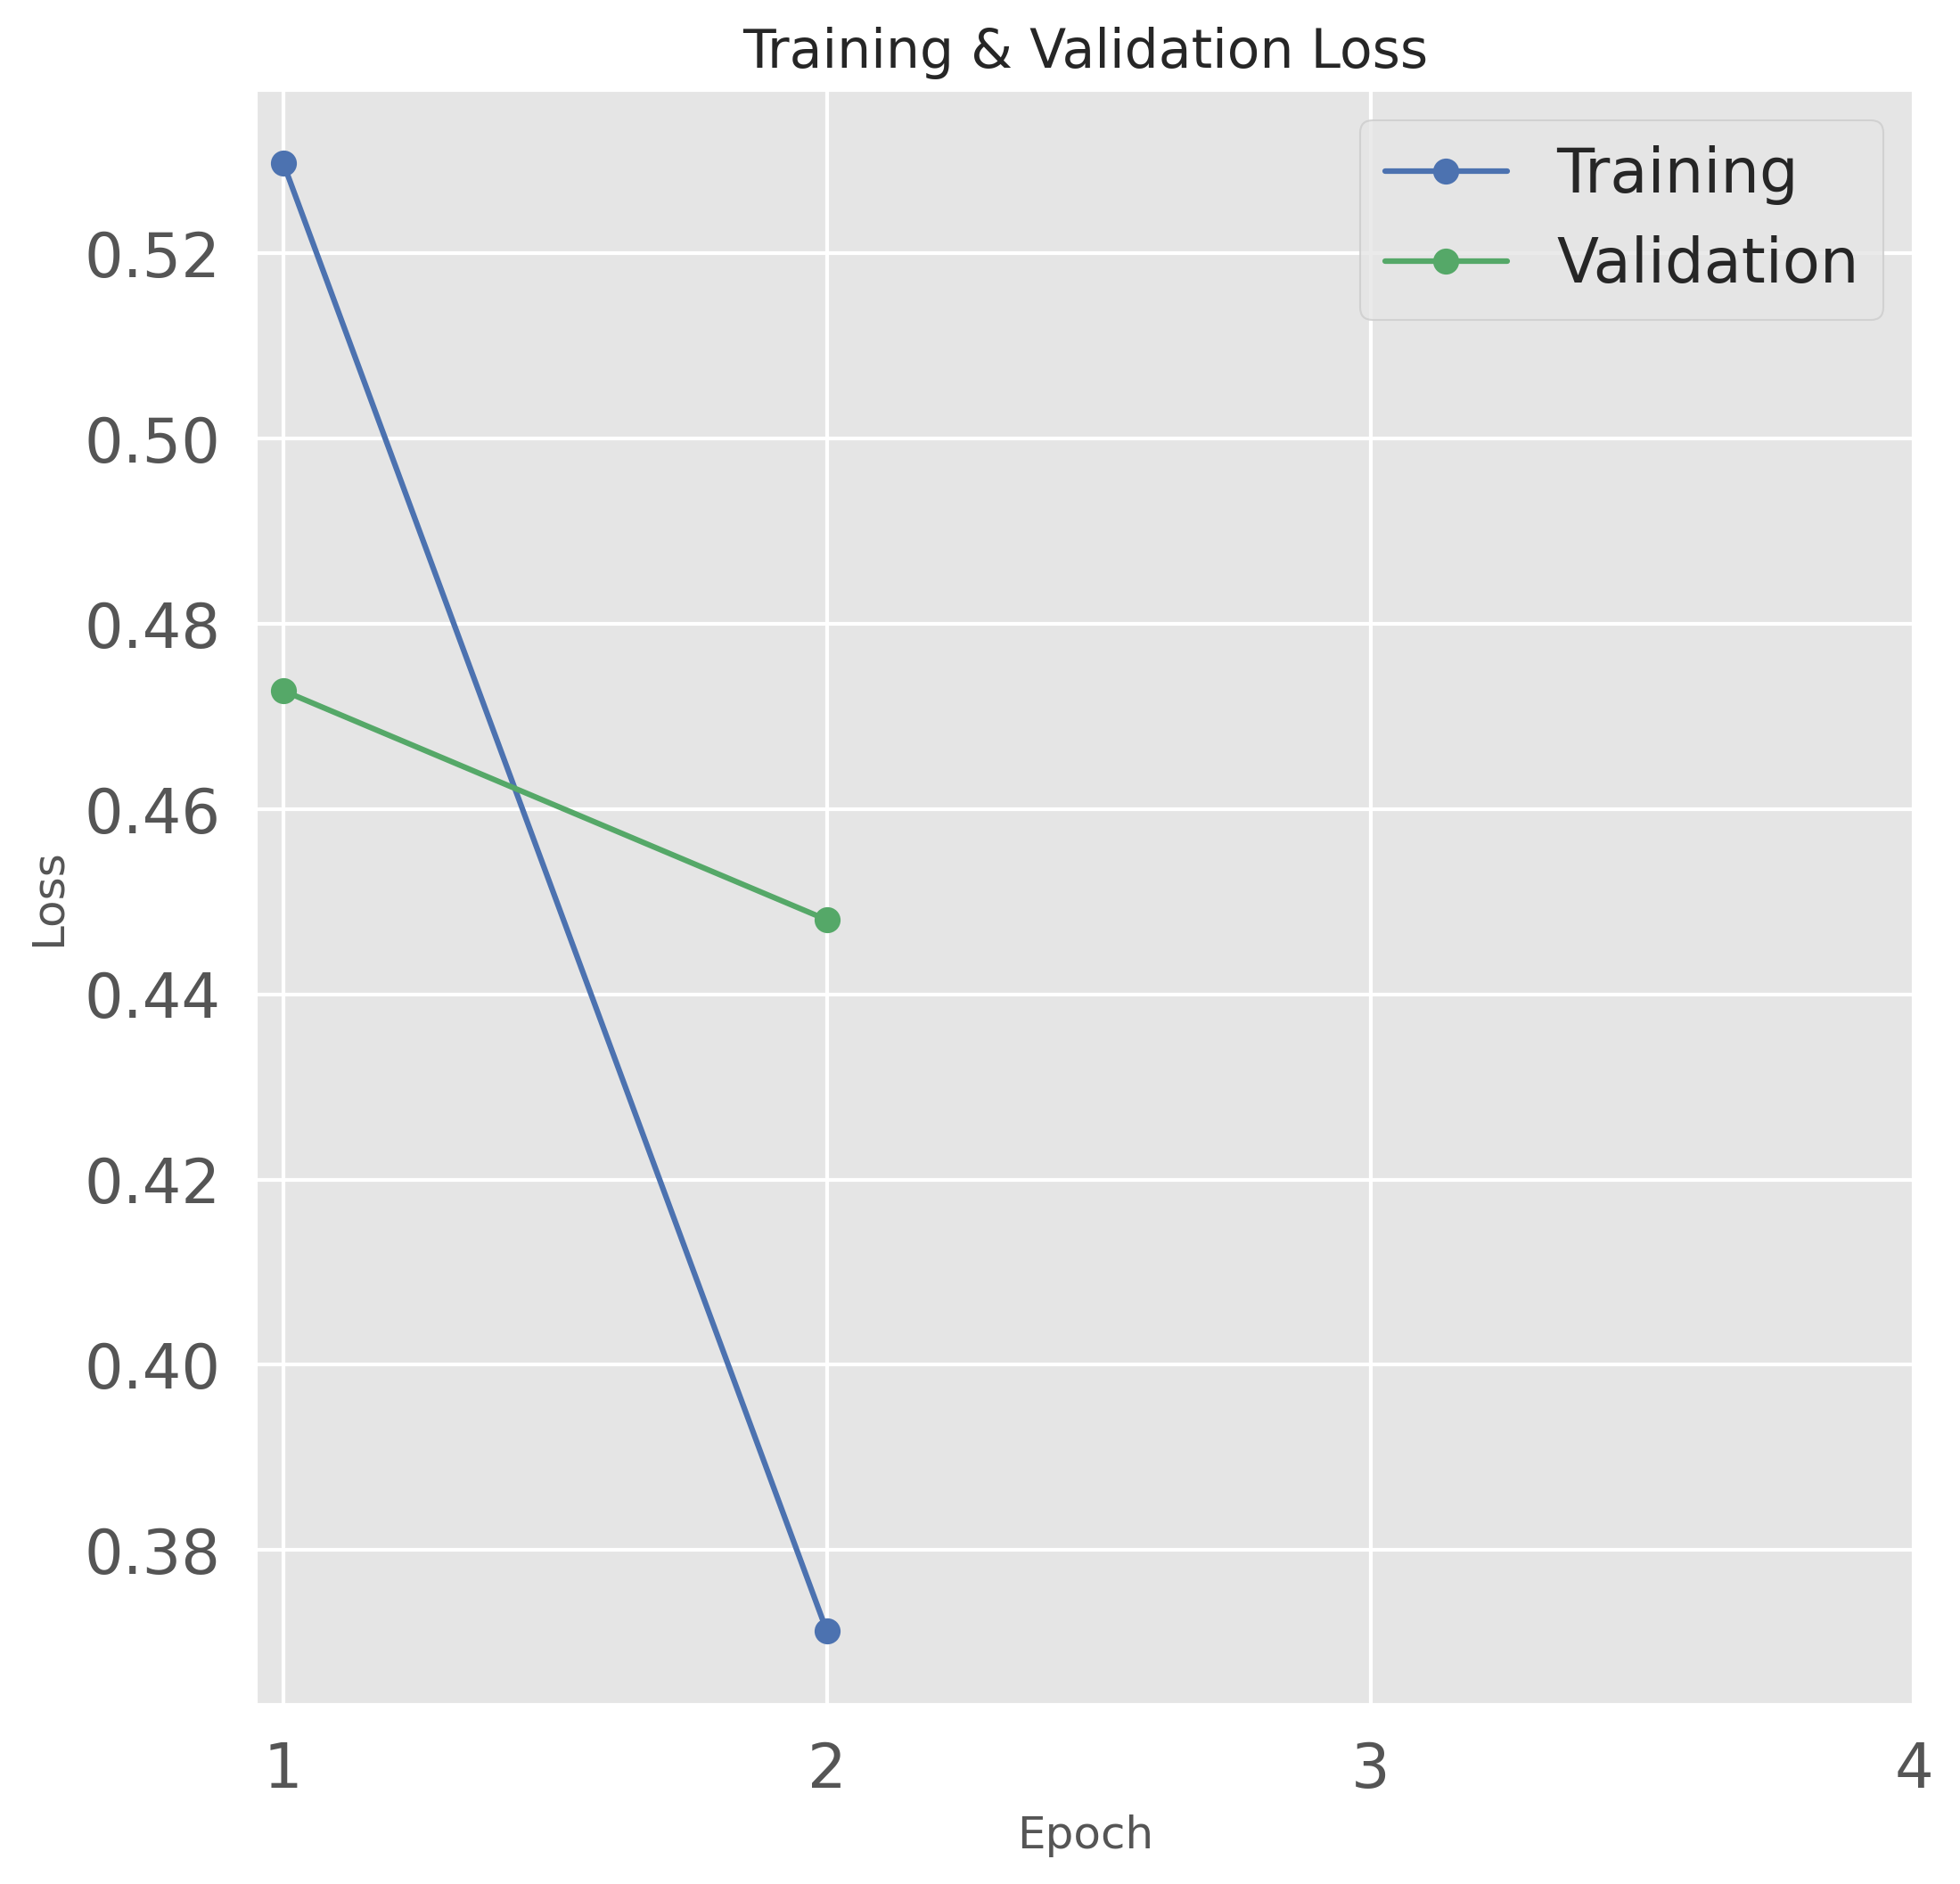

              precision    recall  f1-score   support

           0       0.95      0.65      0.77        81
           1       0.62      0.94      0.75        49

    accuracy                           0.76       130
   macro avg       0.78      0.80      0.76       130
weighted avg       0.82      0.76      0.76       130

AUC: 0.7920
Accuracy: 76.15%


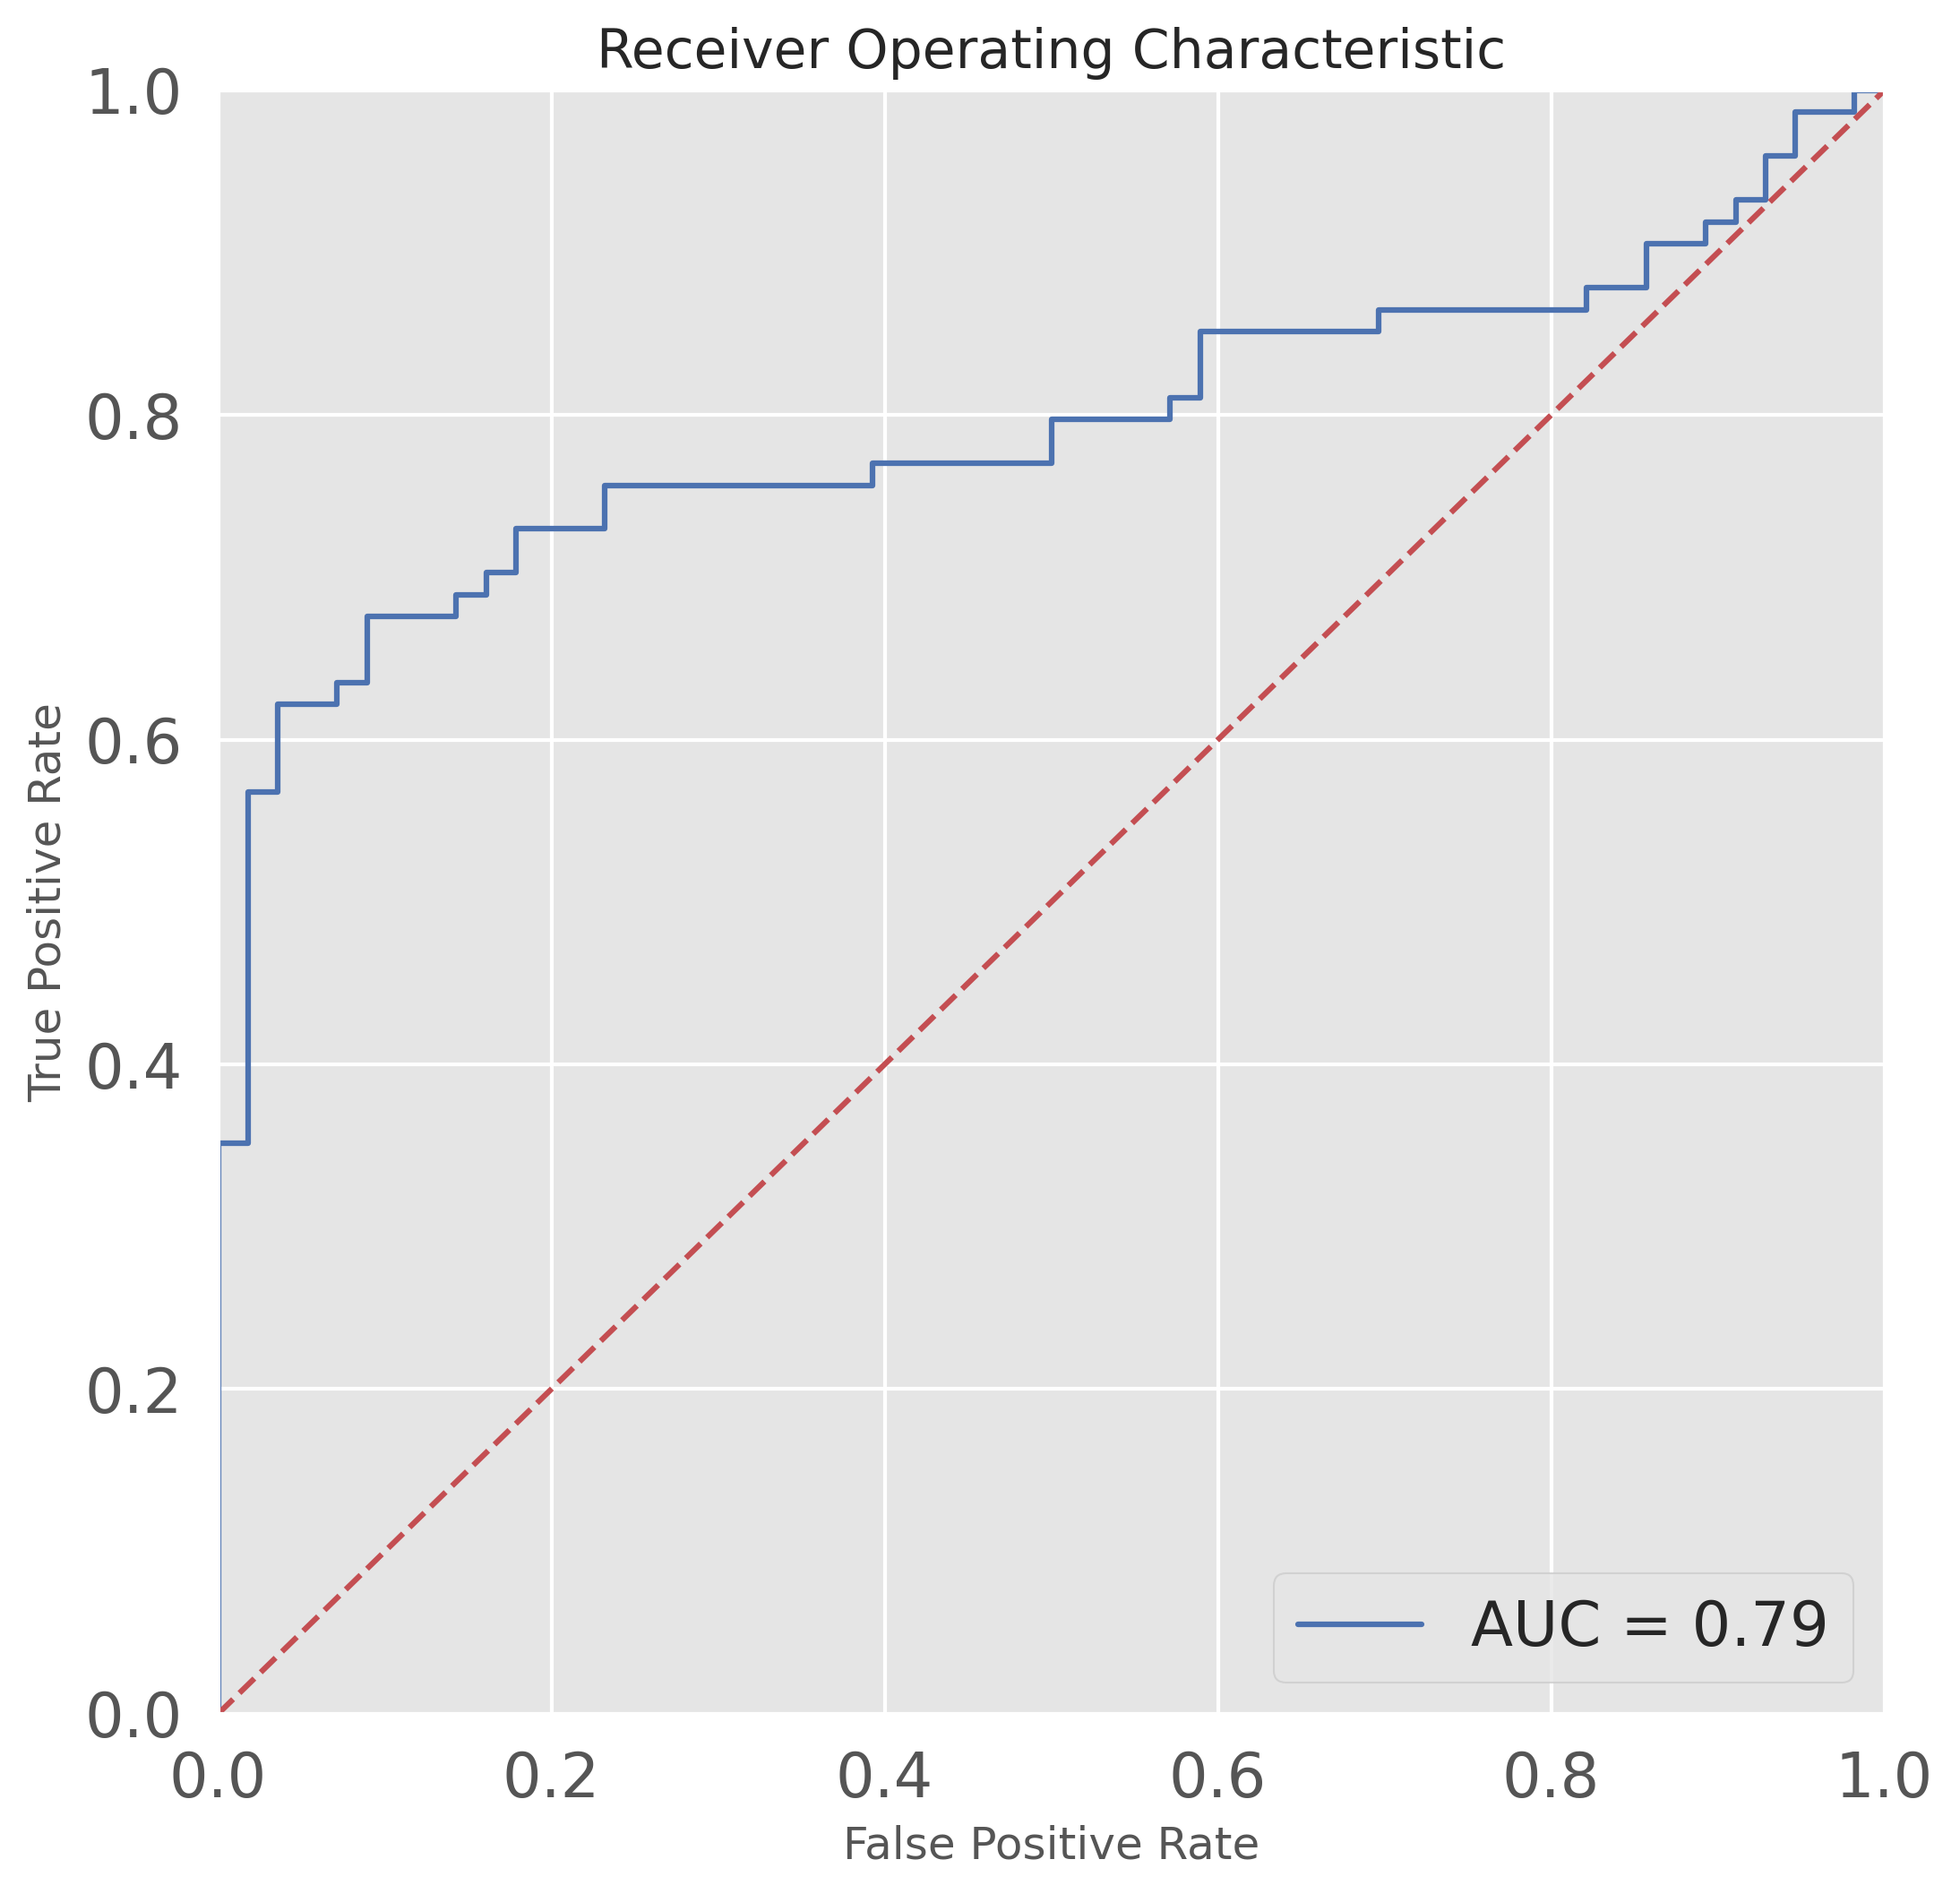

In [45]:
#bert-base-cased, bert-large-cased, roberta-base, roberta-large, 


roberta_base_train_stats, roberta_base_probs, roberta_base_predicted_labels, roberta_base_true_labels = bert_trainer_validator(bert_train, bert_test,
                                                                           train_model='roberta-base',
                                                                           m_len=300, batch_size=32, 
                                                                           lr_par=5e-5, eps_par=1e-8, 
                                                                           epochs=2, seed_val=42,
                                                                            proce='gpu')

#roberta-base
full_results(roberta_base_train_stats, roberta_base_probs, roberta_base_predicted_labels, roberta_base_true_labels )

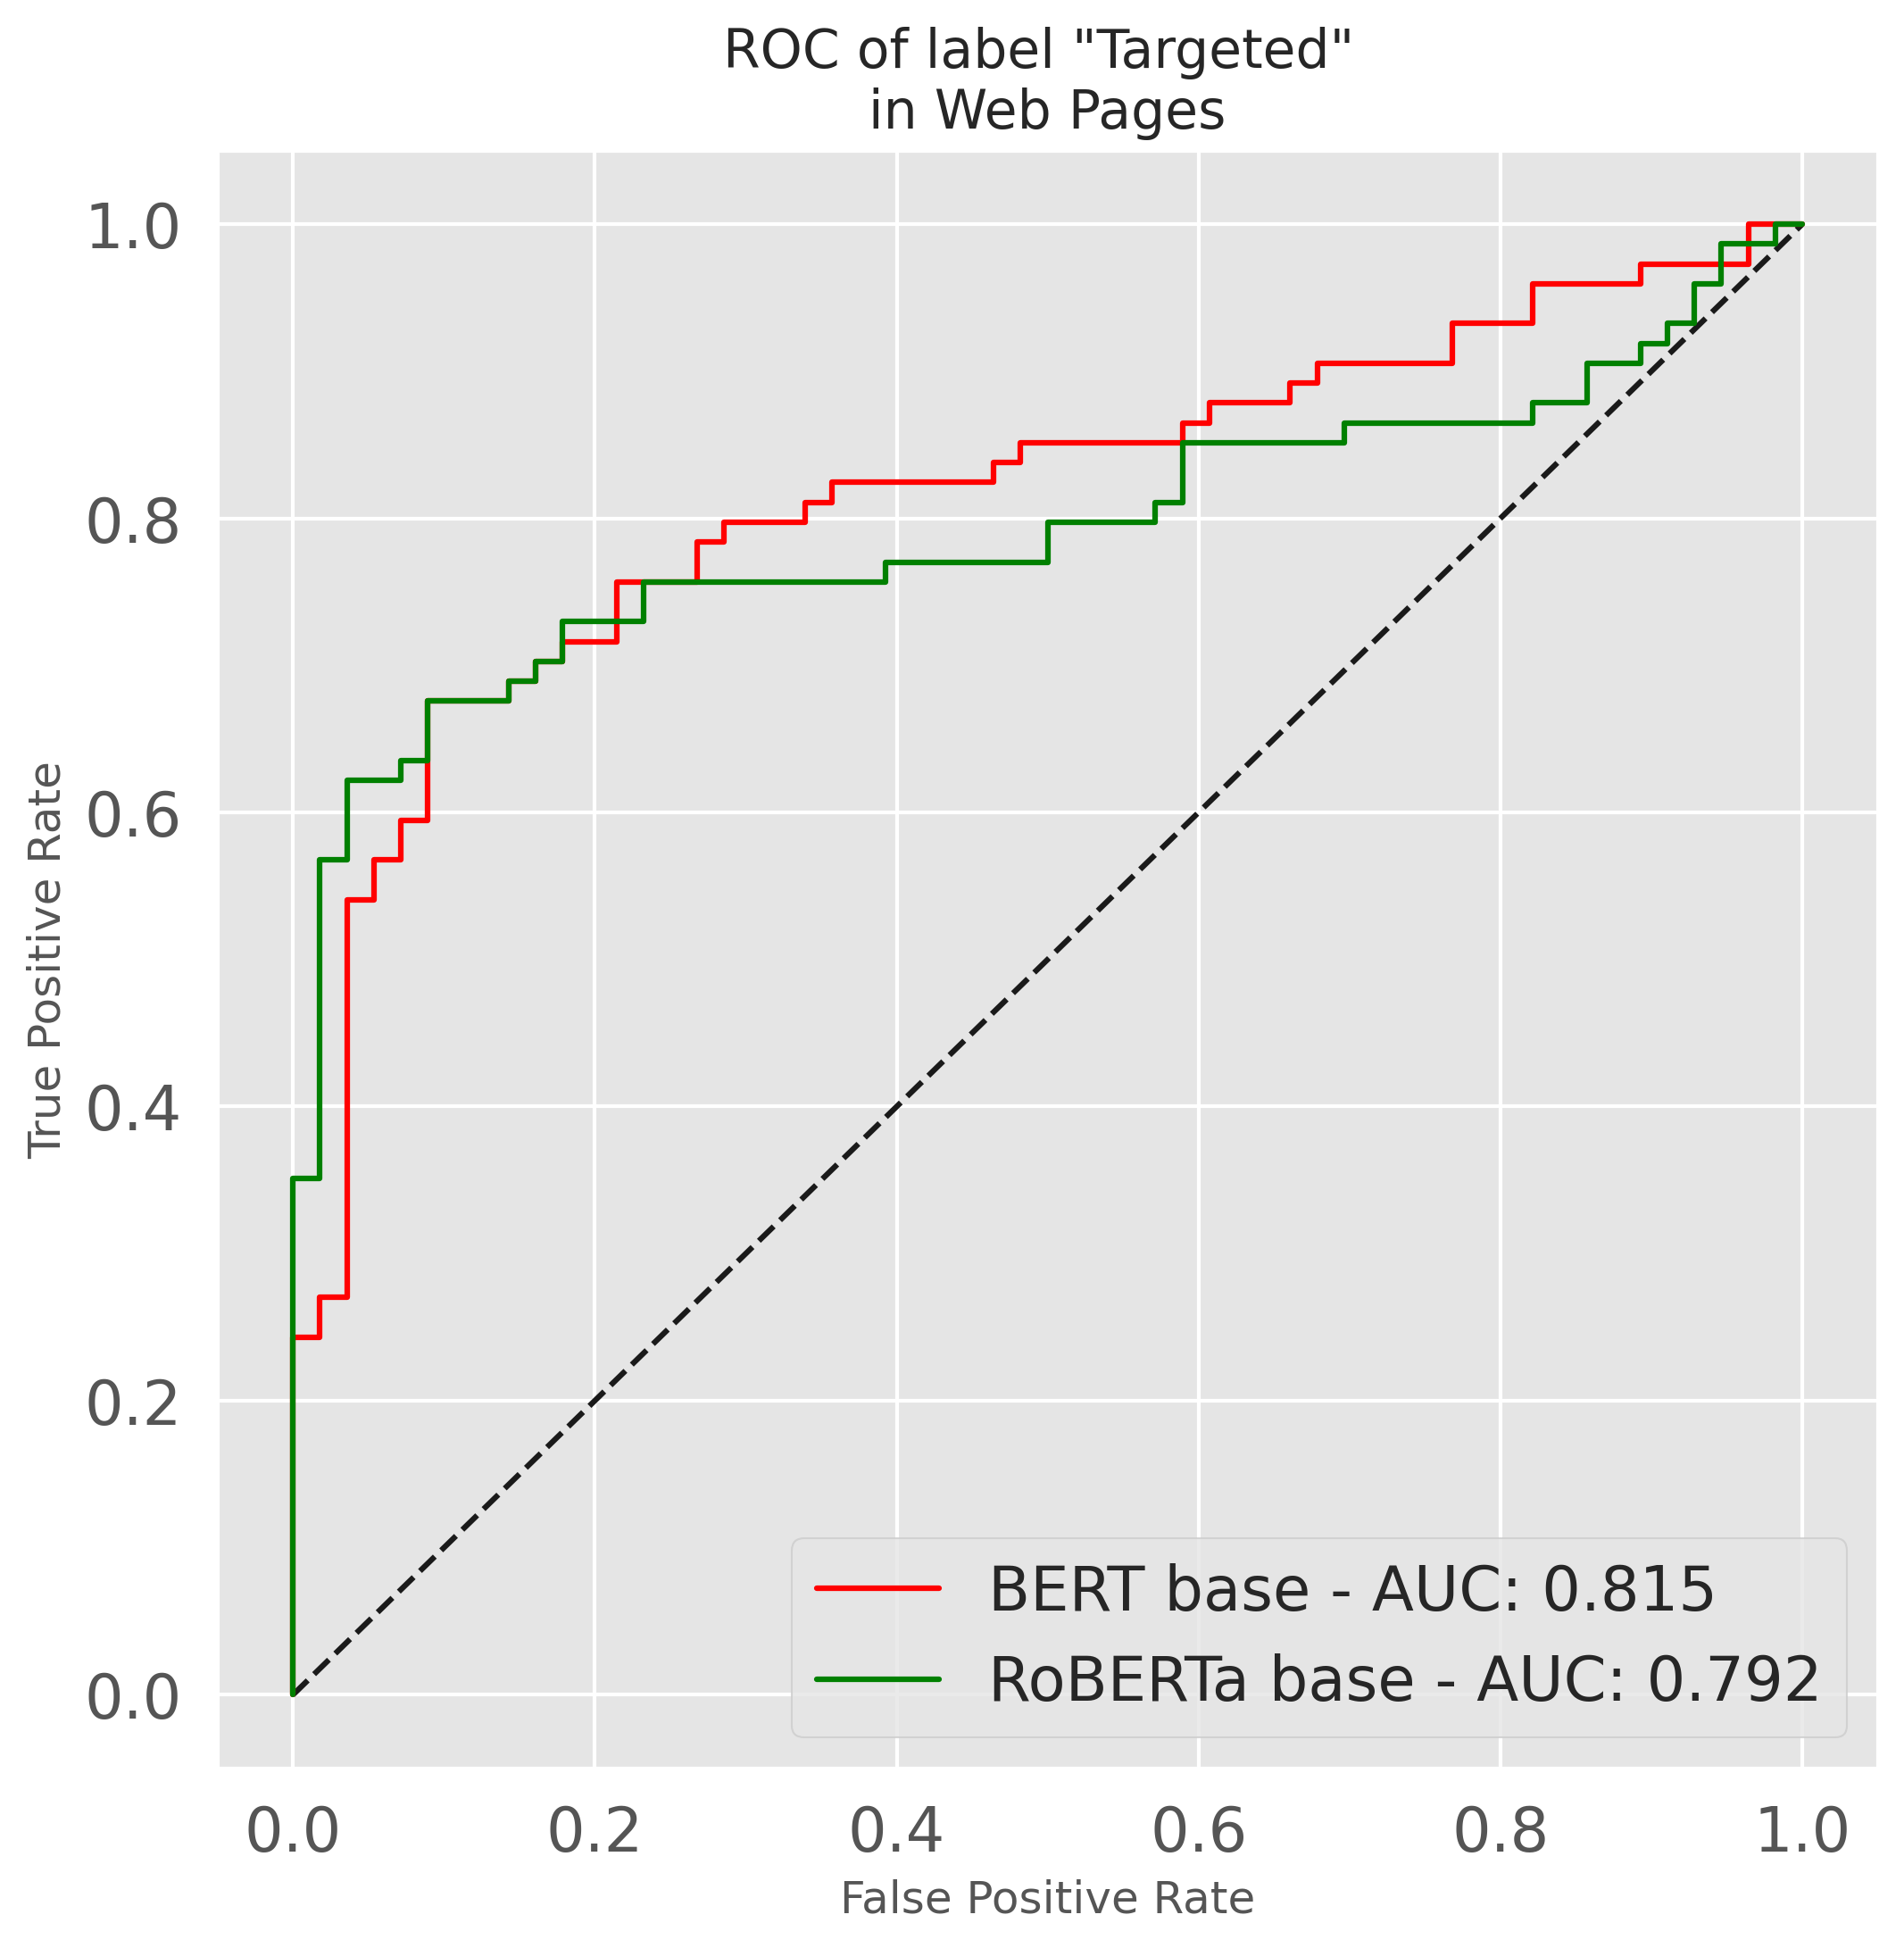

In [46]:
from sklearn import metrics

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 8, 8
plt.rcParams['figure.dpi'] = 300

Y_test =bert_base_true_labels

y_pred_prob1 = bert_base_probs[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(Y_test, y_pred_prob1)
auc1 = round(metrics.roc_auc_score(Y_test, y_pred_prob1), 3)

# y_pred_prob2 = bert_large_probs[:,1]
# fpr2 , tpr2, thresholds2 = roc_curve(Y_test, y_pred_prob2)
# auc2 = round(metrics.roc_auc_score(Y_test, y_pred_prob2), 3)


y_pred_prob3 = roberta_base_probs[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(Y_test, y_pred_prob3)
auc3 = round(metrics.roc_auc_score(Y_test, y_pred_prob3), 3)

# y_pred_prob4 = roberta_large_probs[:,1]
# fpr4 , tpr4, thresholds4 = roc_curve(Y_test, y_pred_prob4)
# auc4 = round(metrics.roc_auc_score(Y_test, y_pred_prob4), 3)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, color='red', label= str("BERT base - AUC: " + str(auc1)))
# plt.plot(fpr2, tpr2, color='blue', label= str("BERT large - AUC: " + str(auc2)))
plt.plot(fpr3, tpr3, color='green' , label= str("RoBERTa base - AUC: " + str(auc3)))
# plt.plot(fpr4, tpr4, color='orange', label= str("RoBERTa large - AUC: " + str(auc4)))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC of label "Targeted" \nin Web Pages')
plt.show()

